In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
import matplotlib.dates as mdates
plt.rc('font', family='NanumBarunGothic') 

#에러 제거
import warnings
warnings.filterwarnings('ignore')

In [2]:
product = pd.read_csv('product_n.csv')
trans_n = pd.read_csv('transaction_n.csv')
trans_t = pd.read_csv('transaction_t.csv')
customer = pd.read_csv('customer_n.csv')
click_tt = pd.read_csv('click_tt.csv')

In [3]:
# 일회성 고객 분류 'customer_id' 컬럼의 중복값 여부를 확인하고 'customer_type' 컬럼에 분류 결과 추가
trans_t['customer_type'] = '0'
trans_t.loc[trans_t['customer_id'].duplicated(keep=False), 'customer_type'] = '1'

trans_t.head()

created_at  customer_id  \
0  2018-07-29 15:22:01.458193+00:00         5868   
1  2018-07-30 12:40:22.365620+00:00         4774   
2  2018-09-15 11:51:17.365620+00:00         4774   
3  2018-11-01 11:23:48.365620+00:00         4774   
4  2018-12-18 11:20:30.365620+00:00         4774   

                             booking_id                            session_id  \
0  186e2bee-0637-4710-8981-50c2d737bc42  3abaa6ce-e320-4e51-9469-d9f3fa328e86   
1  caadb57b-e808-4f94-9e96-8a7d4c9898db  2ee5ead1-f13e-4759-92df-7ff48475e970   
2  6000fffb-9c1a-4f4a-9296-bc8f6b622b50  93325fb6-eb00-4268-bb0e-6471795a0ad0   
3  f5e530a7-4350-4cd1-a3bc-525b5037bcab  bcad5a61-1b67-448d-8ff4-781d67bc56e4   
4  0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2  df1042ab-13e6-4072-b9d2-64a81974c51a   

  payment_method payment_status  promo_amount   promo_code  shipment_fee  \
0     Debit Card        Success          1415  WEEKENDSERU         10000   
1    Credit Card        Success             0      nopromo         10000   
2            OVO        Success             0      nopromo         10000   
3    Credit Card        Success             0      nopromo             0   
4    Credit Card        Success             0      nopromo             0   

                shipment_date_limit  shipment_location_lat  \
0  2018-08-03 05:07:24.812676+00:00              -8.227893   
1  2018-08-03 01:29:03.415705+00:00               3.013470   
2  2018-09-18 08:41:49.422380+00:00              -2.579428   
3  2018-11-05 17:42:27.954235+00:00              -3.602334   
4  2018-12-23 17:24:07.361785+00:00              -3.602334   

   shipment_location_long  total_amount  product_id  quantity  item_price  \
0              111.969107        199832       54728         1      191247   
1              107.802514        155526       16193         1      145526   
2              115.743885        550696       53686         4      135174   
3              120.363824        271012       20228         1      271012   
4              120.363824        198753       55220         1      198753   

   shipment_date customer_type  
0              4             0  
1              3             1  
2              2             1  
3              4             1  
4              5             1

In [4]:
product.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt   
1  2012.0  Casual             Peter_England Men Party Blue Jeans   
2  2016.0  Casual                       Titan Women Silver Watch   
3  2011.0  Casual  Manchester_United Men Solid Black Track Pants   
4  2012.0  Casual                          Puma Men Grey T-shirt   

               brand                productdetail  
0             Turtle    Check Men Navy Blue Shirt  
1      Peter_England         Men Party Blue Jeans  
2              Titan           Women Silver Watch  
3  Manchester_United  Men Solid Black Track Pants  
4               Puma             Men Grey T-shirt

In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44446 non-null  object 
 6   season              44446 non-null  object 
 7   year                44446 non-null  float64
 8   usage               44446 non-null  object 
 9   productDisplayName  44446 non-null  object 
 10  brand               44446 non-null  object 
 11  productdetail       44446 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [6]:
product.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
brand                 0
productdetail         0
dtype: int64

In [7]:
print("id:", product['id'].nunique())
print("gender:", product['gender'].unique())
print("masterCategory:", product['masterCategory'].unique())
print("subCategory:", product['subCategory'].unique())
print("articleType:", product['articleType'].nunique())
print("baseColour:", product['baseColour'].nunique())
print("season:", product['season'].unique())
print("year:", product['year'].unique())
print("usage:", product['usage'].unique())
print("productDisplayName:", product['productDisplayName'].nunique())

id: 44446
gender: ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
masterCategory: ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
subCategory: ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
articleType: 143
baseColour: 46
season: ['Fall' 'Summer' 'Winter' 'Spring']
year: [2011. 2012. 2016. 2017. 2015. 2014. 2010. 2013. 2018. 2019. 2007. 2009.
 2008.]
usage: ['Casual' 'Ethnic' 'Formal' 'Sports' 'Smart Casual' 'Travel' 'Party'
 'Home']
productDisplayName: 31048


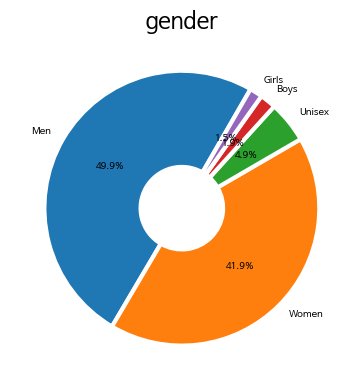

In [8]:
value_counts_normalized = (product['gender'].value_counts(normalize=True) * 100).round(1)

# gender의 인덱스를 라벨로 사용
x_label = value_counts_normalized.index.tolist()

plt.figure(figsize=(4, 4))
plt.pie(value_counts_normalized,
        labels=x_label,
        autopct='%.1f%%',
        startangle=60,
        counterclock=True,
        textprops={'size': 7},
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
        )
plt.title('gender', fontsize=16)
plt.tight_layout()
plt.show()

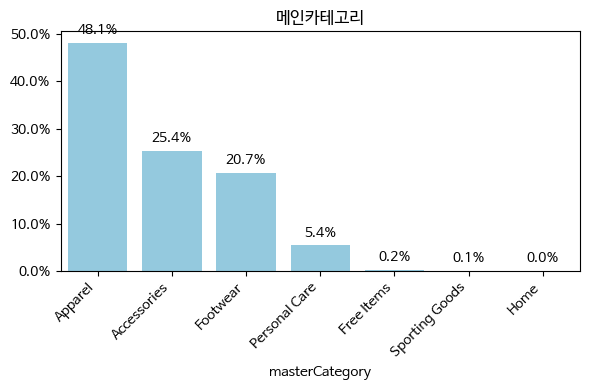

In [9]:
plt.figure(figsize=(6, 4))
total = len(product)  # 전체 데이터 개수

# 메인카테고리별 개수 계산
category_counts = product['masterCategory'].value_counts()

# 메인카테고리별 비율 계산 및 백분율 형식으로 변경
category_percentages = (category_counts / total) * 100

# 막대 그래프 생성
ax = sns.barplot(x=category_percentages.index, y=category_percentages.values, color='skyblue')

# y축 레이블 형식 설정 (% 표시)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}%".format(x)))

plt.title("메인카테고리")

# 막대 위에 백분율 값을 나타내기 위한 부분
for i, v in enumerate(category_percentages.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

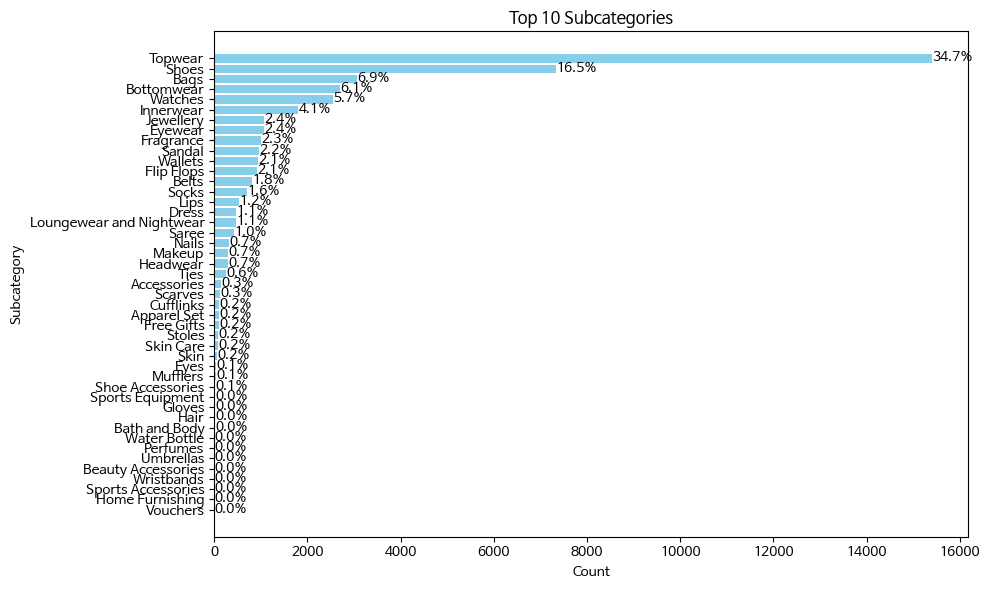

In [10]:
# 데이터프레임에서 'subCategory' 컬럼의 값 빈도수 계산 및 상위 10개 선택
top_categories = product['subCategory'].value_counts()

# 데이터를 뒤집어서 가장 많은 카테고리가 위로 오도록 조정
top_categories = top_categories.iloc[::-1]

plt.figure(figsize=(10, 6))

# 가로 막대 그래프 그리기
ax = plt.barh(top_categories.index, top_categories.values, align='center', color='skyblue')

plt.xlabel('Count')
plt.ylabel('Subcategory')
plt.title('Top 10 Subcategories')

# 백분율 값 나타내기
for rect in ax:
    width = rect.get_width()
    plt.text(width + 5, rect.get_y() + rect.get_height()/2, f'{width/sum(top_categories.values)*100:.1f}%', va='center')

plt.tight_layout()
plt.show()

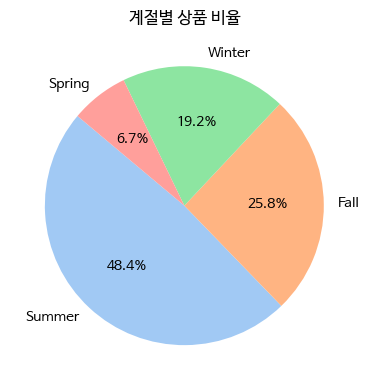

In [11]:
# 파이 차트 생성
plt.figure(figsize=(4, 4))
season_counts = product['season'].value_counts()
plt.pie(season_counts, labels=season_counts.index, autopct='%.1f%%', colors=sns.color_palette('pastel'), startangle=140)

# 차트 설정
plt.title('계절별 상품 비율')

# 차트 출력
plt.tight_layout()
plt.show()

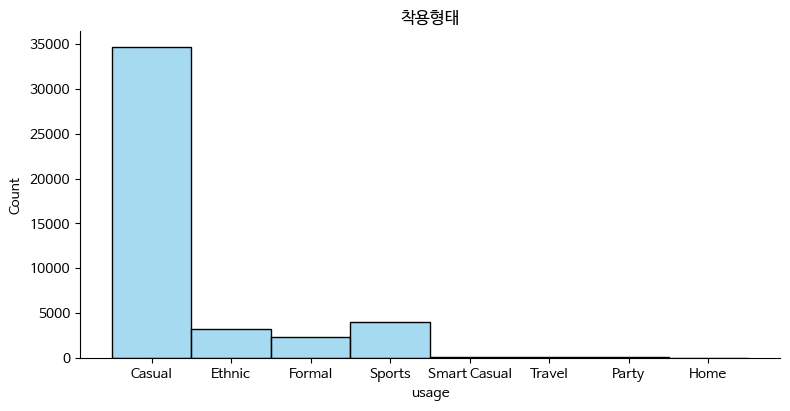

In [12]:
sns.displot(x='usage',data=product, height = 4, aspect = 2, color='skyblue')
plt.title("착용형태")
plt.show()

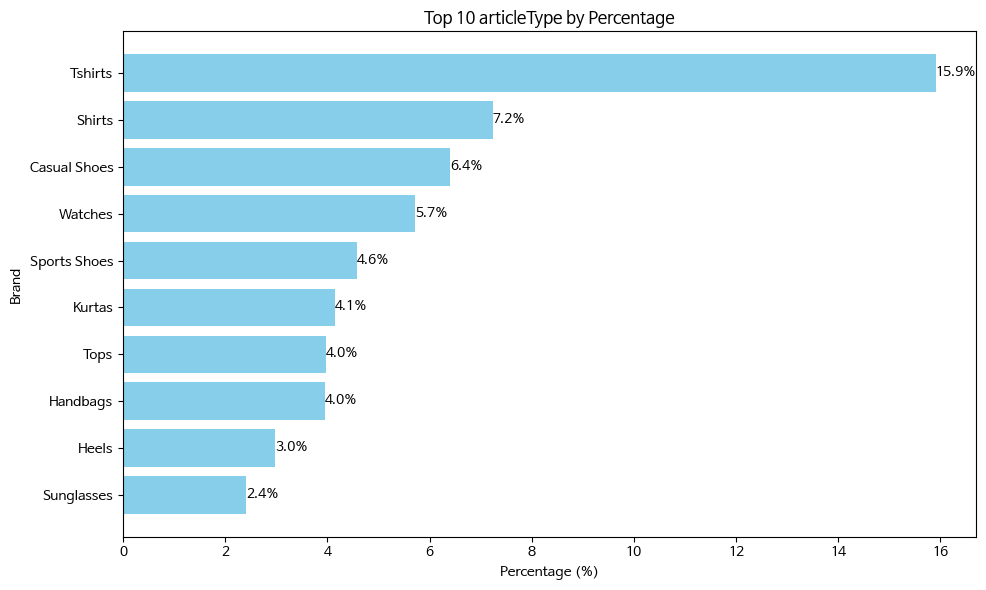

In [13]:
# 브랜드 빈도수 계산 및 상위 10개 선택
top_brands = product['articleType'].value_counts(normalize=True).head(10)

# 데이터를 뒤집어서 가장 많은 브랜드가 위로 오도록 조정
top_brands = top_brands.iloc[::-1]

# 백분율 형태로 변환
top_brands_percentage = top_brands * 100

# 가로 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.barh(top_brands_percentage.index, top_brands_percentage.values, color='skyblue')

# 백분율 표시
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%', va='center')

plt.xlabel('Percentage (%)')
plt.ylabel('Brand')
plt.title('Top 10 articleType by Percentage')
plt.tight_layout()
plt.show()

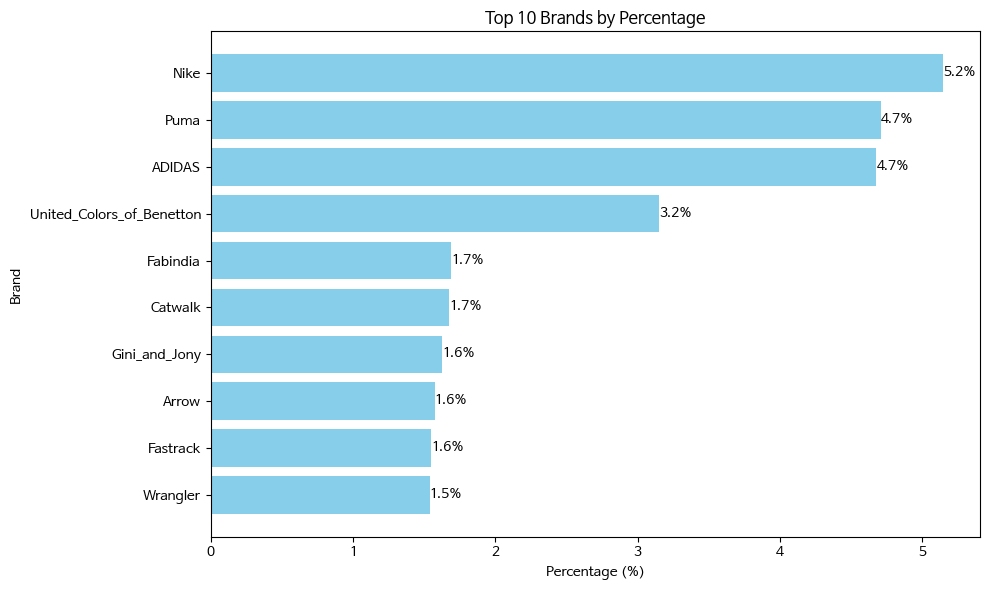

In [14]:
# 브랜드 빈도수 계산 및 상위 10개 선택
top_brands = product['brand'].value_counts(normalize=True).head(10)

# 데이터를 뒤집어서 가장 많은 브랜드가 위로 오도록 조정
top_brands = top_brands.iloc[::-1]

# 백분율 형태로 변환
top_brands_percentage = top_brands * 100

# 가로 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.barh(top_brands_percentage.index, top_brands_percentage.values, color='skyblue')

# 백분율 표시
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%', va='center')

plt.xlabel('Percentage (%)')
plt.ylabel('Brand')
plt.title('Top 10 Brands by Percentage')
plt.tight_layout()
plt.show()

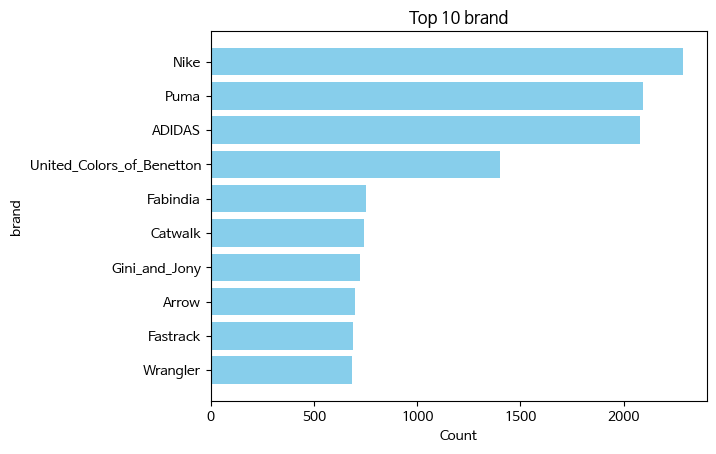

In [15]:
# 데이터프레임에서 'subCategory' 컬럼의 값 빈도수 계산 및 상위 10개 선택
top_categories = product['brand'].value_counts().head(10)

# 데이터를 뒤집어서 가장 많은 카테고리가 위로 오도록 조정
top_categories = top_categories.iloc[::-1]

# 가로 막대 그래프 그리기
plt.barh(top_categories.index, top_categories.values, align='center', color='skyblue')
plt.xlabel('Count')
plt.ylabel('brand')
plt.title('Top 10 brand')
plt.show()

In [16]:
trans_t.head()

created_at  customer_id  \
0  2018-07-29 15:22:01.458193+00:00         5868   
1  2018-07-30 12:40:22.365620+00:00         4774   
2  2018-09-15 11:51:17.365620+00:00         4774   
3  2018-11-01 11:23:48.365620+00:00         4774   
4  2018-12-18 11:20:30.365620+00:00         4774   

                             booking_id                            session_id  \
0  186e2bee-0637-4710-8981-50c2d737bc42  3abaa6ce-e320-4e51-9469-d9f3fa328e86   
1  caadb57b-e808-4f94-9e96-8a7d4c9898db  2ee5ead1-f13e-4759-92df-7ff48475e970   
2  6000fffb-9c1a-4f4a-9296-bc8f6b622b50  93325fb6-eb00-4268-bb0e-6471795a0ad0   
3  f5e530a7-4350-4cd1-a3bc-525b5037bcab  bcad5a61-1b67-448d-8ff4-781d67bc56e4   
4  0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2  df1042ab-13e6-4072-b9d2-64a81974c51a   

  payment_method payment_status  promo_amount   promo_code  shipment_fee  \
0     Debit Card        Success          1415  WEEKENDSERU         10000   
1    Credit Card        Success             0      nopromo         10000   
2            OVO        Success             0      nopromo         10000   
3    Credit Card        Success             0      nopromo             0   
4    Credit Card        Success             0      nopromo             0   

                shipment_date_limit  shipment_location_lat  \
0  2018-08-03 05:07:24.812676+00:00              -8.227893   
1  2018-08-03 01:29:03.415705+00:00               3.013470   
2  2018-09-18 08:41:49.422380+00:00              -2.579428   
3  2018-11-05 17:42:27.954235+00:00              -3.602334   
4  2018-12-23 17:24:07.361785+00:00              -3.602334   

   shipment_location_long  total_amount  product_id  quantity  item_price  \
0              111.969107        199832       54728         1      191247   
1              107.802514        155526       16193         1      145526   
2              115.743885        550696       53686         4      135174   
3              120.363824        271012       20228         1      271012   
4              120.363824        198753       55220         1      198753   

   shipment_date customer_type  
0              4             0  
1              3             1  
2              2             1  
3              4             1  
4              5             1

# 제품과 전환 데이터 합치기

In [17]:
# 제품과 전환데이터 합치기 (mpt_t : trans데이터의 토탈마운트 사용, mpt_n : trans 제품가격 곱하기 수량 가격 사용)
mpt_t = trans_t.merge(product, left_on='product_id', right_on='id', how='left')
mpt_n = trans_n.merge(product, left_on='product_id', right_on='id', how='left')

In [18]:
mpt_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   payment_method          852584 non-null  object 
 5   payment_status          852584 non-null  object 
 6   promo_amount            852584 non-null  int64  
 7   promo_code              852584 non-null  object 
 8   shipment_fee            852584 non-null  int64  
 9   shipment_date_limit     852584 non-null  object 
 10  shipment_location_lat   852584 non-null  float64
 11  shipment_location_long  852584 non-null  float64
 12  total_amount            852584 non-null  int64  
 13  product_id              852584 non-null  int64  
 14  quantity            

In [19]:
mpt_t.head().T

0  \
created_at                  2018-07-29 15:22:01.458193+00:00   
customer_id                                             5868   
booking_id              186e2bee-0637-4710-8981-50c2d737bc42   
session_id              3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                                    Debit Card   
payment_status                                       Success   
promo_amount                                            1415   
promo_code                                       WEEKENDSERU   
shipment_fee                                           10000   
shipment_date_limit         2018-08-03 05:07:24.812676+00:00   
shipment_location_lat                              -8.227893   
shipment_location_long                            111.969107   
total_amount                                          199832   
product_id                                             54728   
quantity                                                   1   
item_price                                            191247   
shipment_date                                              4   
customer_type                                              0   
id                                                     54728   
gender                                                   Men   
masterCategory                                      Footwear   
subCategory                                            Shoes   
articleType                                     Casual Shoes   
baseColour                                             Black   
season                                                Summer   
year                                                  2012.0   
usage                                                 Casual   
productDisplayName                      Vans Men Black Shoes   
brand                                                   Vans   
productdetail                                Men Black Shoes   

                                                           1  \
created_at                  2018-07-30 12:40:22.365620+00:00   
customer_id                                             4774   
booking_id              caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id              2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                                   Credit Card   
payment_status                                       Success   
promo_amount                                               0   
promo_code                                           nopromo   
shipment_fee                                           10000   
shipment_date_limit         2018-08-03 01:29:03.415705+00:00   
shipment_location_lat                                3.01347   
shipment_location_long                            107.802514   
total_amount                                          155526   
product_id                                             16193   
quantity                                                   1   
item_price                                            145526   
shipment_date                                              3   
customer_type                                              1   
id                                                     16193   
gender                                                   Men   
masterCategory                                       Apparel   
subCategory                                          Topwear   
articleType                                         Sweaters   
baseColour                                             Green   
season                                                  Fall   
year                                                  2011.0   
usage                                                 Casual   
productDisplayName       Puma Men Knitted Vest Green Sweater   
brand                                                   Puma   
productdetail                 Men Knitted Vest Green Sweater   

                                                           2  \
created_at               

In [20]:
mpt_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              1254585 non-null  object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  product_id              1254585 non-null  int64  
 13  quantity                1254585 non-null  int64  
 14  it

In [21]:
mpt_n.head().T

0  \
created_at                  2018-07-29 15:22:01.458193+00:00   
customer_id                                             5868   
booking_id              186e2bee-0637-4710-8981-50c2d737bc42   
session_id              3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                                    Debit Card   
payment_status                                       Success   
promo_amount                                            1415   
promo_code                                       WEEKENDSERU   
shipment_fee                                           10000   
shipment_date_limit         2018-08-03 05:07:24.812676+00:00   
shipment_location_lat                              -8.227893   
shipment_location_long                            111.969107   
product_id                                             54728   
quantity                                                   1   
item_price                                            191247   
shipment_date                                              4   
total_cost                                            191247   
customer_type                                              0   
id                                                     54728   
gender                                                   Men   
masterCategory                                      Footwear   
subCategory                                            Shoes   
articleType                                     Casual Shoes   
baseColour                                             Black   
season                                                Summer   
year                                                  2012.0   
usage                                                 Casual   
productDisplayName                      Vans Men Black Shoes   
brand                                                   Vans   
productdetail                                Men Black Shoes   

                                                           1  \
created_at                  2018-07-30 12:40:22.365620+00:00   
customer_id                                             4774   
booking_id              caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id              2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                                   Credit Card   
payment_status                                       Success   
promo_amount                                               0   
promo_code                                           nopromo   
shipment_fee                                           10000   
shipment_date_limit         2018-08-03 01:29:03.415705+00:00   
shipment_location_lat                                3.01347   
shipment_location_long                            107.802514   
product_id                                             16193   
quantity                                                   1   
item_price                                            145526   
shipment_date                                              3   
total_cost                                            145526   
customer_type                                              1   
id                                                     16193   
gender                                                   Men   
masterCategory                                       Apparel   
subCategory                                          Topwear   
articleType                                         Sweaters   
baseColour                                             Green   
season                                                  Fall   
year                                                  2011.0   
usage                                                 Casual   
productDisplayName       Puma Men Knitted Vest Green Sweater   
brand                                                   Puma   
productdetail                 Men Knitted Vest Green Sweater   

                                                           2  \
created_at               

In [22]:
# product 분석을 위해 불필요한 컬럼 삭제
mpt_t.drop(columns=['shipment_location_lat', 'productdetail',
'shipment_location_long', 'shipment_date_limit', 'id', 'year', 'productDisplayName'], inplace=True)

In [23]:
# product 분석을 위해 불필요한 컬럼 삭제
mpt_n.drop(columns=['shipment_location_lat', 'productdetail',
'shipment_location_long', 'shipment_date_limit', 'id', 'year', 'productDisplayName'], inplace=True)

In [24]:
mpt_t.isnull().sum()

created_at        0
customer_id       0
booking_id        0
session_id        0
payment_method    0
payment_status    0
promo_amount      0
promo_code        0
shipment_fee      0
total_amount      0
product_id        0
quantity          0
item_price        0
shipment_date     0
customer_type     0
gender            0
masterCategory    0
subCategory       0
articleType       0
baseColour        0
season            0
usage             0
brand             0
dtype: int64

In [25]:
mpt_t.head()

created_at  customer_id  \
0  2018-07-29 15:22:01.458193+00:00         5868   
1  2018-07-30 12:40:22.365620+00:00         4774   
2  2018-09-15 11:51:17.365620+00:00         4774   
3  2018-11-01 11:23:48.365620+00:00         4774   
4  2018-12-18 11:20:30.365620+00:00         4774   

                             booking_id                            session_id  \
0  186e2bee-0637-4710-8981-50c2d737bc42  3abaa6ce-e320-4e51-9469-d9f3fa328e86   
1  caadb57b-e808-4f94-9e96-8a7d4c9898db  2ee5ead1-f13e-4759-92df-7ff48475e970   
2  6000fffb-9c1a-4f4a-9296-bc8f6b622b50  93325fb6-eb00-4268-bb0e-6471795a0ad0   
3  f5e530a7-4350-4cd1-a3bc-525b5037bcab  bcad5a61-1b67-448d-8ff4-781d67bc56e4   
4  0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2  df1042ab-13e6-4072-b9d2-64a81974c51a   

  payment_method payment_status  promo_amount   promo_code  shipment_fee  \
0     Debit Card        Success          1415  WEEKENDSERU         10000   
1    Credit Card        Success             0      nopromo         10000   
2            OVO        Success             0      nopromo         10000   
3    Credit Card        Success             0      nopromo             0   
4    Credit Card        Success             0      nopromo             0   

   total_amount  ...  shipment_date  customer_type  gender  masterCategory  \
0        199832  ...              4              0     Men        Footwear   
1        155526  ...              3              1     Men         Apparel   
2        550696  ...              2              1   Women     Accessories   
3        271012  ...              4              1   Women         Apparel   
4        198753  ...              5              1   Women   Personal Care   

  subCategory   articleType baseColour  season   usage     brand  
0       Shoes  Casual Shoes      Black  Summer  Casual      Vans  
1     Topwear      Sweaters      Green    Fall  Casual      Puma  
2        Bags      Handbags     Purple  Summer  Casual     Kiara  
3     Topwear      Sweaters        Red    Fall  Casual  Wrangler  
4        Lips     Lip Liner      Brown  Spring  Casual     Lakme  

[5 rows x 23 columns]

In [26]:
mpt_n.head()

created_at  customer_id  \
0  2018-07-29 15:22:01.458193+00:00         5868   
1  2018-07-30 12:40:22.365620+00:00         4774   
2  2018-09-15 11:51:17.365620+00:00         4774   
3  2018-11-01 11:23:48.365620+00:00         4774   
4  2018-12-18 11:20:30.365620+00:00         4774   

                             booking_id                            session_id  \
0  186e2bee-0637-4710-8981-50c2d737bc42  3abaa6ce-e320-4e51-9469-d9f3fa328e86   
1  caadb57b-e808-4f94-9e96-8a7d4c9898db  2ee5ead1-f13e-4759-92df-7ff48475e970   
2  6000fffb-9c1a-4f4a-9296-bc8f6b622b50  93325fb6-eb00-4268-bb0e-6471795a0ad0   
3  f5e530a7-4350-4cd1-a3bc-525b5037bcab  bcad5a61-1b67-448d-8ff4-781d67bc56e4   
4  0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2  df1042ab-13e6-4072-b9d2-64a81974c51a   

  payment_method payment_status  promo_amount   promo_code  shipment_fee  \
0     Debit Card        Success          1415  WEEKENDSERU         10000   
1    Credit Card        Success             0      nopromo         10000   
2            OVO        Success             0      nopromo         10000   
3    Credit Card        Success             0      nopromo             0   
4    Credit Card        Success             0      nopromo             0   

   product_id  ...  total_cost  customer_type  gender  masterCategory  \
0       54728  ...      191247              0     Men        Footwear   
1       16193  ...      145526              1     Men         Apparel   
2       53686  ...      540696              1   Women     Accessories   
3       20228  ...      271012              1   Women         Apparel   
4       55220  ...      198753              1   Women   Personal Care   

   subCategory   articleType baseColour  season   usage     brand  
0        Shoes  Casual Shoes      Black  Summer  Casual      Vans  
1      Topwear      Sweaters      Green    Fall  Casual      Puma  
2         Bags      Handbags     Purple  Summer  Casual     Kiara  
3      Topwear      Sweaters        Red    Fall  Casual  Wrangler  
4         Lips     Lip Liner      Brown  Spring  Casual     Lakme  

[5 rows x 23 columns]

In [27]:
# 통계 확인
pd.set_option('float_format', '{:.2f}'.format)
mpt_t.describe()

customer_id  promo_amount  shipment_fee  total_amount  product_id  \
count    852584.00     852584.00     852584.00     852584.00   852584.00   
mean      49839.20       2042.08       9189.68     549916.52    29699.29   
std       28999.32       3063.48       9377.86     815376.14    17060.23   
min           3.00          0.00          0.00      10898.00     1163.00   
25%       24563.00          0.00          0.00     203793.75    14761.00   
50%       49619.00          0.00      10000.00     302989.00    28618.00   
75%       74957.00       3993.00      10000.00     514702.25    44694.00   
max       99999.00      24519.00      50000.00   23504487.00    60000.00   

       quantity  item_price  shipment_date  
count 852584.00   852584.00      852584.00  
mean       1.48   250113.22           3.04  
std        1.60   111926.93           1.43  
min        1.00     5600.00           1.00  
25%        1.00   168379.75           2.00  
50%        1.00   233720.00           3.00  
75%        1.00   314001.00           4.00  
max       48.00  1200357.00           6.00

In [28]:
# 통계 확인
pd.set_option('float_format', '{:.2f}'.format)
mpt_n.describe()

customer_id  promo_amount  shipment_fee  product_id   quantity  \
count   1254585.00    1254585.00    1254585.00  1254585.00 1254585.00   
mean      49809.87       2046.88       9190.86    29701.14       1.48   
std       29000.57       3068.62       9372.00    17053.51       1.59   
min           3.00          0.00          0.00     1163.00       1.00   
25%       24478.00          0.00          0.00    14776.00       1.00   
50%       49577.00          0.00      10000.00    28614.00       1.00   
75%       74948.00       3998.00      10000.00    44695.00       1.00   
max       99999.00      24519.00      50000.00    60000.00      48.00   

       item_price  shipment_date  total_cost  customer_type  
count  1254585.00     1254585.00  1254585.00     1254585.00  
mean    249974.44           3.04   368851.93           0.99  
std     111873.32           1.43   468090.73           0.08  
min       5600.00           1.00     5600.00           0.00  
25%     168373.00           2.00   181139.00           1.00  
50%     233540.00           3.00   259043.00           1.00  
75%     313647.00           4.00   375971.00           1.00  
max    1200357.00           6.00 22852848.00           1.00

In [29]:
# 결제 성공 실패 카운트
payment_status_counts_t = mpt_t['payment_status'].value_counts()
print(payment_status_counts_t)

payment_status
Success    815964
Failed      36620
Name: count, dtype: int64


In [30]:
# 결제 성공 실패 카운트
payment_status_counts_n = mpt_n['payment_status'].value_counts()
print(payment_status_counts_n)

payment_status
Success    1201035
Failed       53550
Name: count, dtype: int64


In [31]:
payment_status_counts_n = mpt_n['customer_type'].value_counts()
print(payment_status_counts_n)

customer_type
1    1246111
0       8474
Name: count, dtype: int64


In [32]:
payment_status_counts_t = mpt_t['customer_type'].value_counts()
print(payment_status_counts_t)

customer_type
1    842343
0     10241
Name: count, dtype: int64


# 결제 성공 데이터 분석진행

## trans_t 토탈마운트 이용 분석

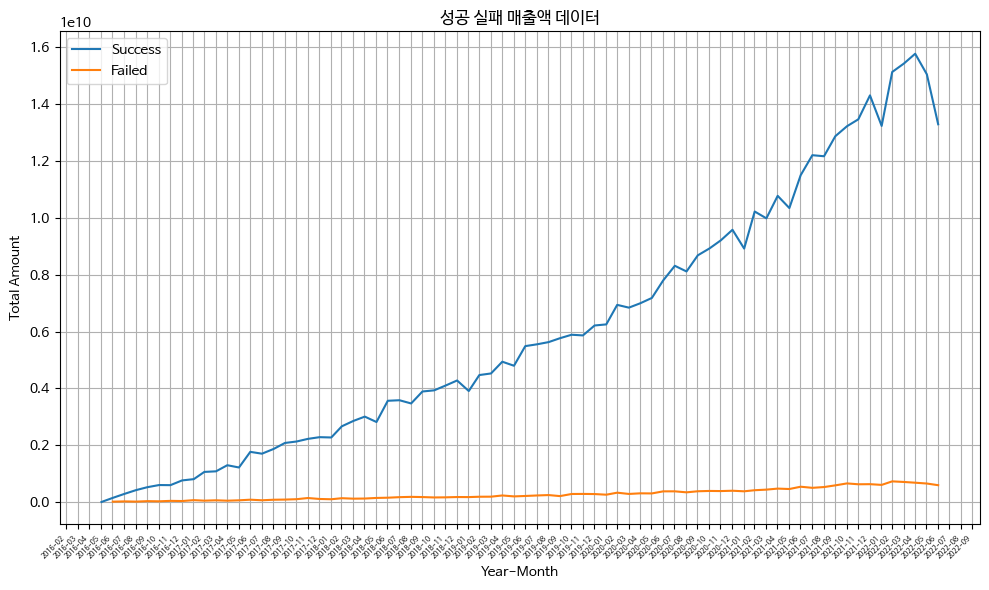

In [33]:
# 'created_at' 컬럼을 datetime 형식으로 변경
mpt_t['created_at'] = pd.to_datetime(mpt_t['created_at'])

# 'created_at' 컬럼을 년도와 월로 나누기
mpt_t['year'] = mpt_t['created_at'].dt.year
mpt_t['month'] = mpt_t['created_at'].dt.month

# 월별 판매 그래프 생성
monthly_sales_success = mpt_t[mpt_t['payment_status'] == 'Success'].groupby(['year', 'month'])['total_amount'].sum().reset_index()
monthly_sales_failed = mpt_t[mpt_t['payment_status'] == 'Failed'].groupby(['year', 'month'])['total_amount'].sum().reset_index()

# 그래프 생성
plt.figure(figsize=(10, 6))

# 연도별 월별 판매 데이터를 연속적으로 나타내는 처리
merged_year_month_success = monthly_sales_success['year'].astype(str) + '-' + monthly_sales_success['month'].astype(str)
merged_year_month_failed = monthly_sales_failed['year'].astype(str) + '-' + monthly_sales_failed['month'].astype(str)

monthly_sales_success['merged_year_month'] = pd.to_datetime(merged_year_month_success, format='%Y-%m')
monthly_sales_failed['merged_year_month'] = pd.to_datetime(merged_year_month_failed, format='%Y-%m')

monthly_sales_success = monthly_sales_success.sort_values('merged_year_month')
monthly_sales_failed = monthly_sales_failed.sort_values('merged_year_month')

# 'Success' 데이터 그래프
plt.plot(monthly_sales_success['merged_year_month'], monthly_sales_success['total_amount'], label='Success')

# 'Failed' 데이터 그래프
plt.plot(monthly_sales_failed['merged_year_month'], monthly_sales_failed['total_amount'], label='Failed') #marker='x'

plt.title('성공 실패 매출액 데이터')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=5)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

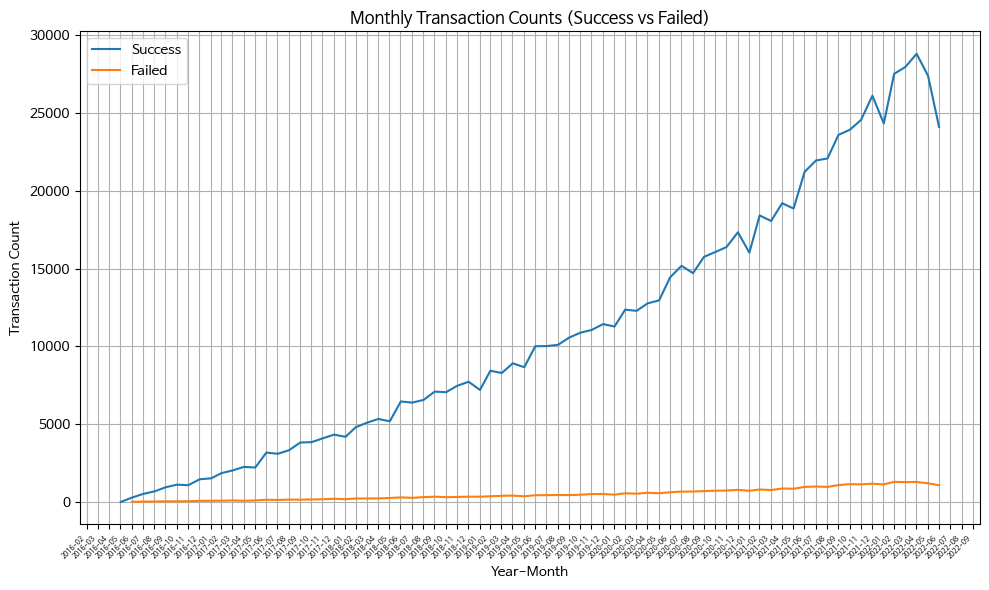

In [34]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_t[mpt_t['payment_status'] == 'Success'].groupby(['year', 'month']).size().reset_index(name='success_count')
monthly_transactions_failed = mpt_t[mpt_t['payment_status'] == 'Failed'].groupby(['year', 'month']).size().reset_index(name='failed_count')

# 그래프 생성
plt.figure(figsize=(10, 6))

# 연도별 월별 거래 데이터를 연속적으로 나타내는 처리
merged_year_month_success = monthly_transactions_success['year'].astype(str) + '-' + monthly_transactions_success['month'].astype(str)
merged_year_month_failed = monthly_transactions_failed['year'].astype(str) + '-' + monthly_transactions_failed['month'].astype(str)

monthly_transactions_success['merged_year_month'] = pd.to_datetime(merged_year_month_success, format='%Y-%m')
monthly_transactions_failed['merged_year_month'] = pd.to_datetime(merged_year_month_failed, format='%Y-%m')

monthly_transactions_success = monthly_transactions_success.sort_values('merged_year_month')
monthly_transactions_failed = monthly_transactions_failed.sort_values('merged_year_month')

# 'Success' 데이터 그래프
plt.plot(monthly_transactions_success['merged_year_month'], monthly_transactions_success['success_count'], label='Success')

# 'Failed' 데이터 그래프
plt.plot(monthly_transactions_failed['merged_year_month'], monthly_transactions_failed['failed_count'], label='Failed') #marker='x'

plt.title('Monthly Transaction Counts (Success vs Failed)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=5)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

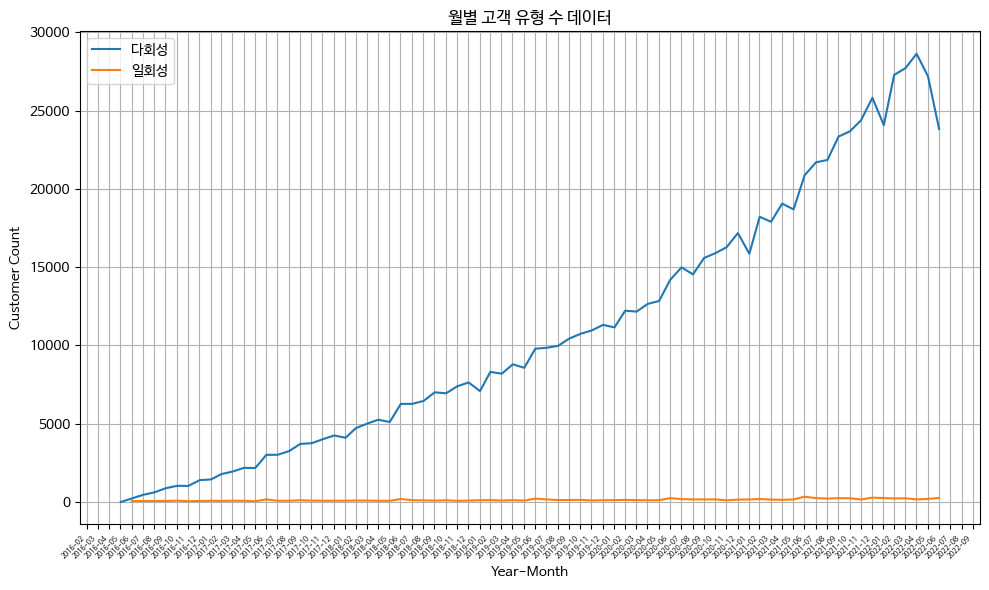

In [35]:
# 월별 고객 유형 수 그래프 생성
monthly_customer_type = mpt_t[mpt_t['payment_status'] == 'Success'].groupby(['year', 'month', 'customer_type']).size().reset_index(name='customer_count')

# 'customer_type' 값을 일회성(0)과 다회성(1)에서 '일회성'과 '다회성'으로 변경
monthly_customer_type['customer_type'] = monthly_customer_type['customer_type'].replace({0: '일회성', 1: '다회성'})

# 그래프 생성
plt.figure(figsize=(10, 6))

# 연도별 월별 데이터를 연속적으로 나타내는 처리
merged_year_month = monthly_customer_type['year'].astype(str) + '-' + monthly_customer_type['month'].astype(str)
monthly_customer_type['merged_year_month'] = pd.to_datetime(merged_year_month, format='%Y-%m')

monthly_customer_type = monthly_customer_type.sort_values('merged_year_month')

# 고객 유형별 데이터 그래프 생성
customer_types = monthly_customer_type['customer_type'].unique()
for customer_type in customer_types:
    customer_type_data = monthly_customer_type[monthly_customer_type['customer_type'] == customer_type]
    plt.plot(customer_type_data['merged_year_month'], customer_type_data['customer_count'], label=customer_type)

plt.title('월별 고객 유형 수 데이터')
plt.xlabel('Year-Month')
plt.ylabel('Customer Count')

plt.grid(True)  # 그리드 표시

# 범례 위치와 크기 조정
plt.legend(labels=['다회성', '일회성'])

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=5)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

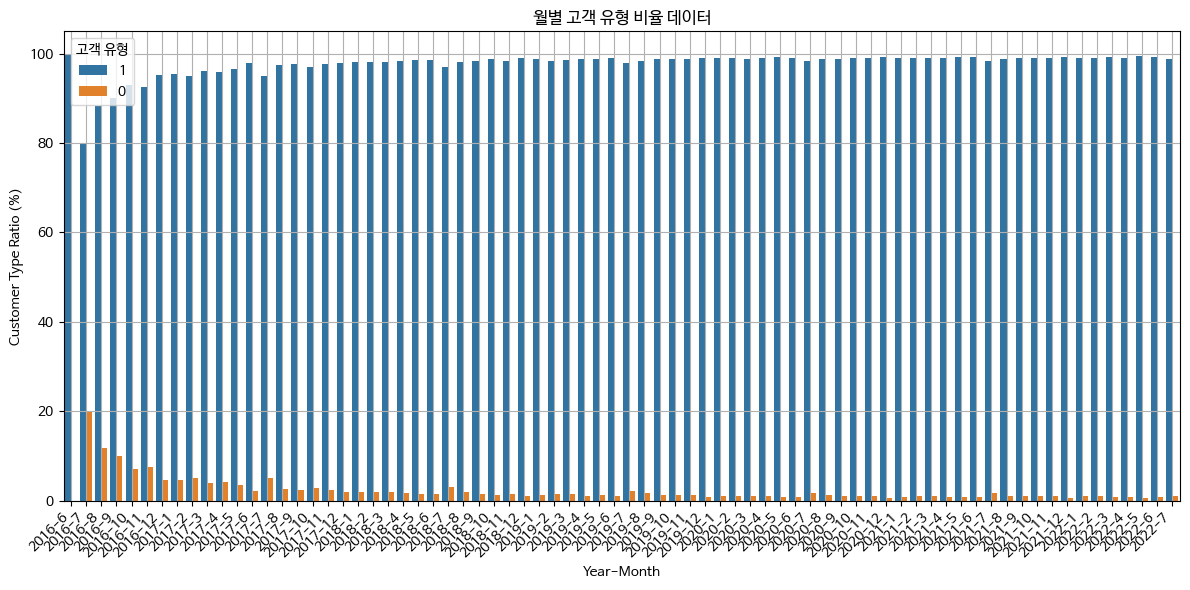

In [36]:
# 연도별 월별 고객 유형 수 그래프 생성
monthly_customer_type = mpt_t.groupby(['year', 'month', 'customer_type']).size().reset_index(name='customer_count')

# 'customer_type' 값을 일회성(0)과 다회성(1)에서 '일회성'과 '다회성'으로 변경
monthly_customer_type['customer_type'] = monthly_customer_type['customer_type'].replace({0: '일회성', 1: '다회성'})

# 연도와 월을 합쳐서 'Year-Month' 컬럼 생성
monthly_customer_type['Year-Month'] = monthly_customer_type['year'].astype(str) + '-' + monthly_customer_type['month'].astype(str)

# 연도별로 각 월의 전체 고객 수 계산
total_customers_per_month = monthly_customer_type.groupby(['year', 'month'])['customer_count'].sum().reset_index()

# 월별 고객 유형 비율 계산
monthly_customer_type = monthly_customer_type.merge(total_customers_per_month, on=['year', 'month'], suffixes=('', '_total'))
monthly_customer_type['customer_type_ratio'] = (monthly_customer_type['customer_count'] / monthly_customer_type['customer_count_total']) * 100

# 그래프 생성
plt.figure(figsize=(12, 6))

# 바플롯 생성
sns.barplot(data=monthly_customer_type, x='Year-Month', y='customer_type_ratio', hue='customer_type')

plt.title('월별 고객 유형 비율 데이터')
plt.xlabel('Year-Month')
plt.ylabel('Customer Type Ratio (%)')

plt.grid(True)  # 그리드 표시
plt.legend(title='고객 유형')

# x축 눈금 라벨이 겹치지 않도록 설정
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

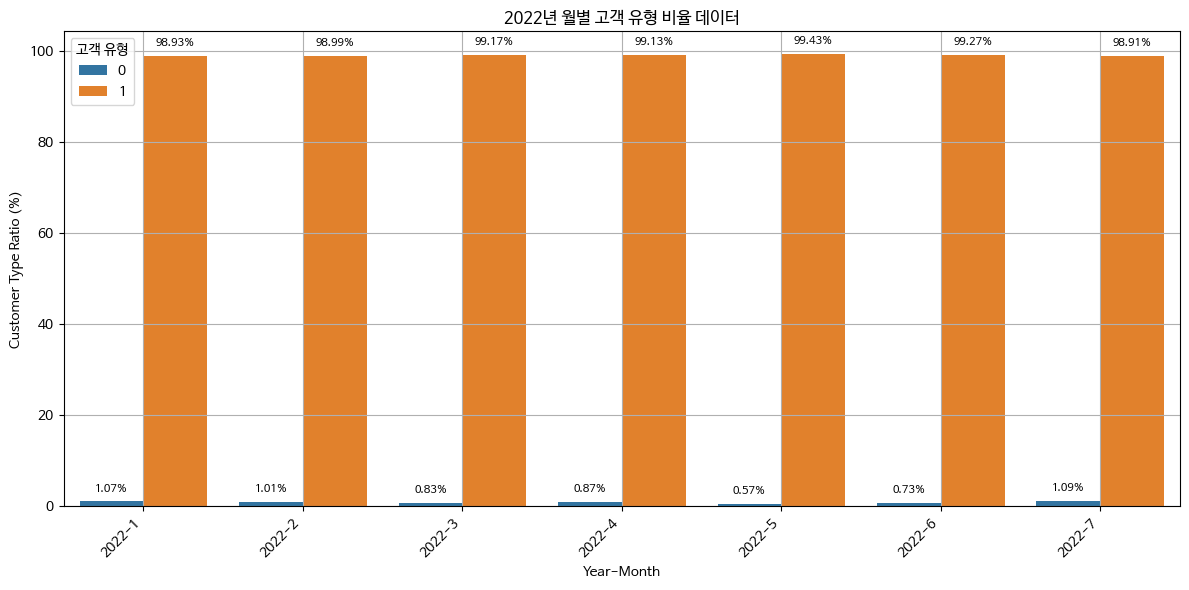

In [37]:
# 연도별 월별 고객 유형 수 그래프 생성
monthly_customer_type = mpt_t.groupby(['year', 'month', 'customer_type']).size().reset_index(name='customer_count')

# 'customer_type' 값을 일회성(0)과 다회성(1)에서 '일회성'과 '다회성'으로 변경
monthly_customer_type['customer_type'] = monthly_customer_type['customer_type'].replace({0: '일회성', 1: '다회성'})

# 연도와 월을 합쳐서 'Year-Month' 컬럼 생성
monthly_customer_type['Year-Month'] = monthly_customer_type['year'].astype(str) + '-' + monthly_customer_type['month'].astype(str)

# 2022년 데이터만 선택
monthly_customer_type_2022 = monthly_customer_type[monthly_customer_type['year'] == 2022]

# 연도별로 각 월의 전체 고객 수 계산
total_customers_per_month = monthly_customer_type_2022.groupby(['year', 'month'])['customer_count'].sum().reset_index()

# 월별 고객 유형 비율 계산
monthly_customer_type_2022 = monthly_customer_type_2022.merge(total_customers_per_month, on=['year', 'month'], suffixes=('', '_total'))
monthly_customer_type_2022['customer_type_ratio'] = (monthly_customer_type_2022['customer_count'] / monthly_customer_type_2022['customer_count_total']) * 100

# 그래프 생성
plt.figure(figsize=(12, 6))

# 바플롯 생성
ax = sns.barplot(data=monthly_customer_type_2022, x='Year-Month', y='customer_type_ratio', hue='customer_type')

plt.title('2022년 월별 고객 유형 비율 데이터')
plt.xlabel('Year-Month')
plt.ylabel('Customer Type Ratio (%)')

plt.grid(True)  # 그리드 표시
plt.legend(title='고객 유형')

# x축 눈금 라벨이 겹치지 않도록 설정
plt.xticks(rotation=45, ha='right')

# 바플롯 위에 비율 텍스트 표시
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()

plt.show()

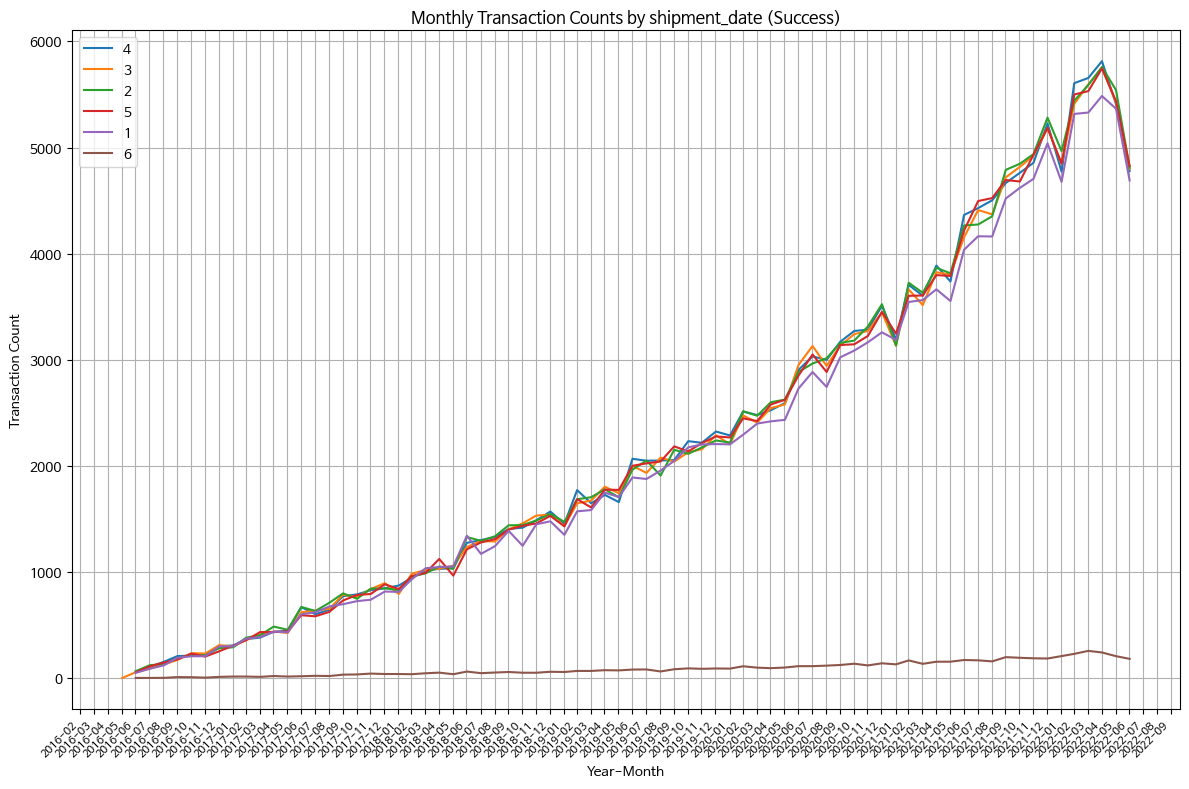

In [38]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_t[mpt_t['payment_status'] == 'Success'].groupby(['year', 'month', 'shipment_date']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_t['shipment_date'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['shipment_date'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by shipment_date (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

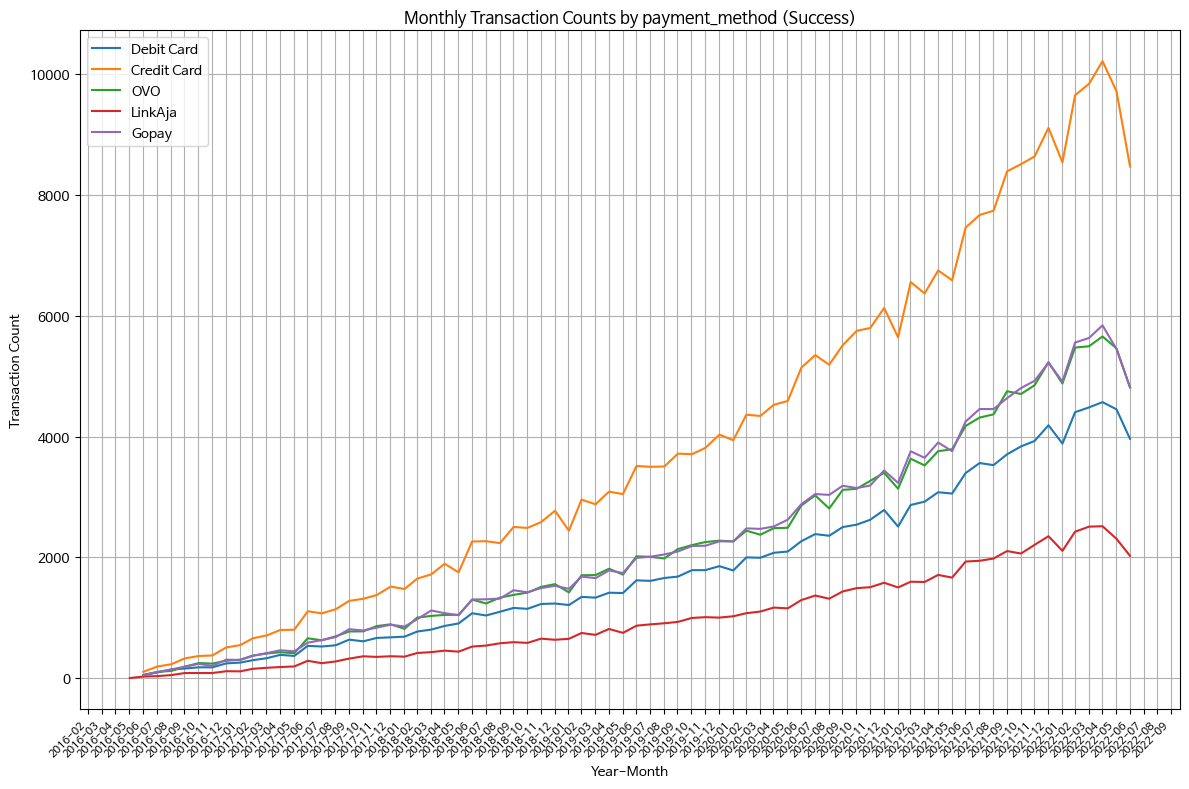

In [39]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_t[mpt_t['payment_status'] == 'Success'].groupby(['year', 'month', 'payment_method']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_t['payment_method'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['payment_method'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by payment_method (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

In [40]:
promo_code_counts = mpt_t['promo_code'].value_counts()

print("각 'promo_code'의 데이터 수:")
print(promo_code_counts)

각 'promo_code'의 데이터 수:
promo_code
nopromo          526048
AZ2022            89227
BUYMORE           66835
WEEKENDSERU       61941
XX2022            44744
LIBURDONG         20965
WEEKENDMANTAP     20448
SC2022            11271
STARTUP           11105
Name: count, dtype: int64


## trans_n 가격*수량 이용 분석

In [41]:
mpt_n.head().T

0  \
created_at          2018-07-29 15:22:01.458193+00:00   
customer_id                                     5868   
booking_id      186e2bee-0637-4710-8981-50c2d737bc42   
session_id      3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                    1415   
promo_code                               WEEKENDSERU   
shipment_fee                                   10000   
product_id                                     54728   
quantity                                           1   
item_price                                    191247   
shipment_date                                      4   
total_cost                                    191247   
customer_type                                      0   
gender                                           Men   
masterCategory                              Footwear   
subCategory                                    Shoes   
articleType                             Casual Shoes   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                           Vans   

                                                   1  \
created_at          2018-07-30 12:40:22.365620+00:00   
customer_id                                     4774   
booking_id      caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id      2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                           Credit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     16193   
quantity                                           1   
item_price                                    145526   
shipment_date                                      3   
total_cost                                    145526   
customer_type                                      1   
gender                                           Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                 Sweaters   
baseColour                                     Green   
season                                          Fall   
usage                                         Casual   
brand                                           Puma   

                                                   2  \
created_at          2018-09-15 11:51:17.365620+00:00   
customer_id                                     4774   
booking_id      6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
session_id      93325fb6-eb00-4268-bb0e-6471795a0ad0   
payment_method                                   OVO   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     53686   
quantity                                           4   
item_price                                    135174   
shipment_date                                      2   
total_cost                                    540696   
customer_type                                      1   
gender                                         Women   
masterCategory                           Accessories   
subCategory                                     Bags   
articleType                                 Handbags   
baseColour                                    Purple   
season                                        Summer   
usage                                         Casual   
brand                                          Kiara   

                

In [42]:
# 년도월일로만 데이터 변경
mpt_n['created_at'] = pd.to_datetime(mpt_n['created_at'])
mpt_n['created_at'] = mpt_n['created_at'].dt.strftime('%Y-%m-%d')

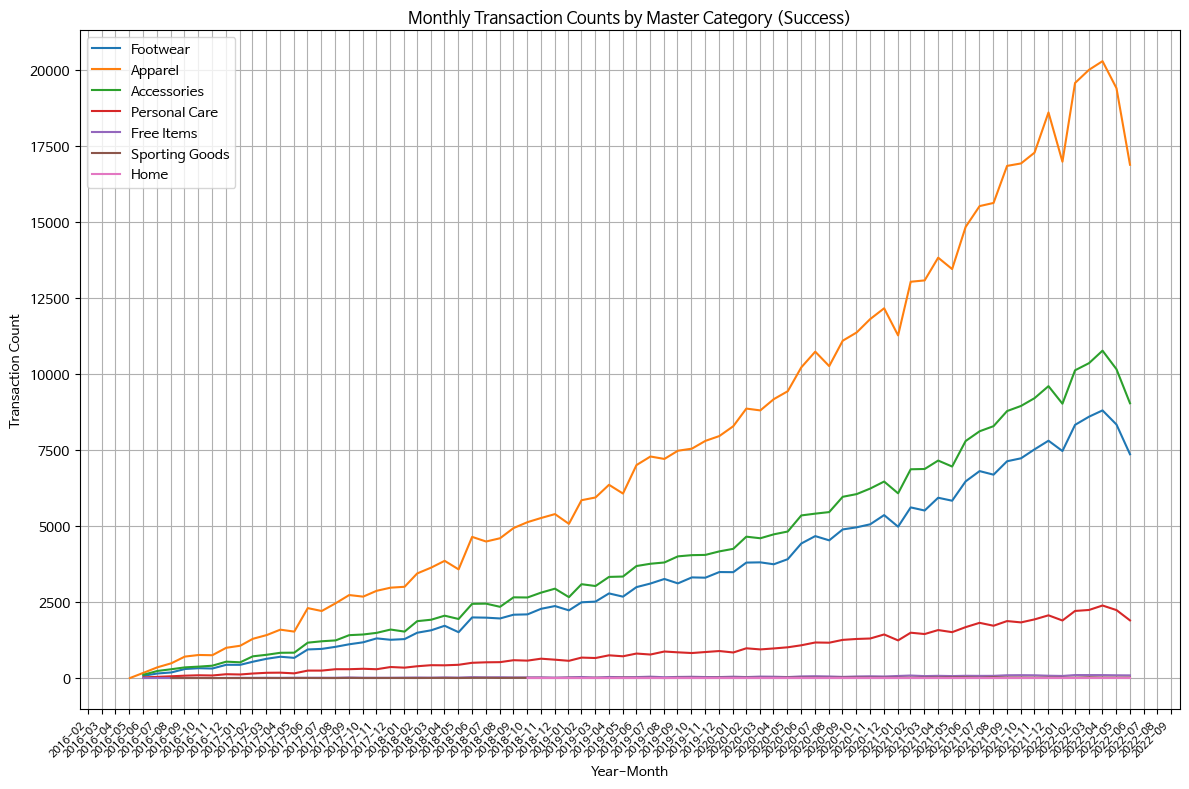

In [43]:
# 'created_at' 컬럼을 datetime 형식으로 변경
mpt_n['created_at'] = pd.to_datetime(mpt_n['created_at'])

# 'created_at' 컬럼을 년도와 월로 나누기
mpt_n['year'] = mpt_n['created_at'].dt.year
mpt_n['month'] = mpt_n['created_at'].dt.month

# 월별 거래 수 계산
monthly_transactions_success = mpt_n[mpt_n['payment_status'] == 'Success'].groupby(['year', 'month', 'masterCategory']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_n['masterCategory'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['masterCategory'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by Master Category (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

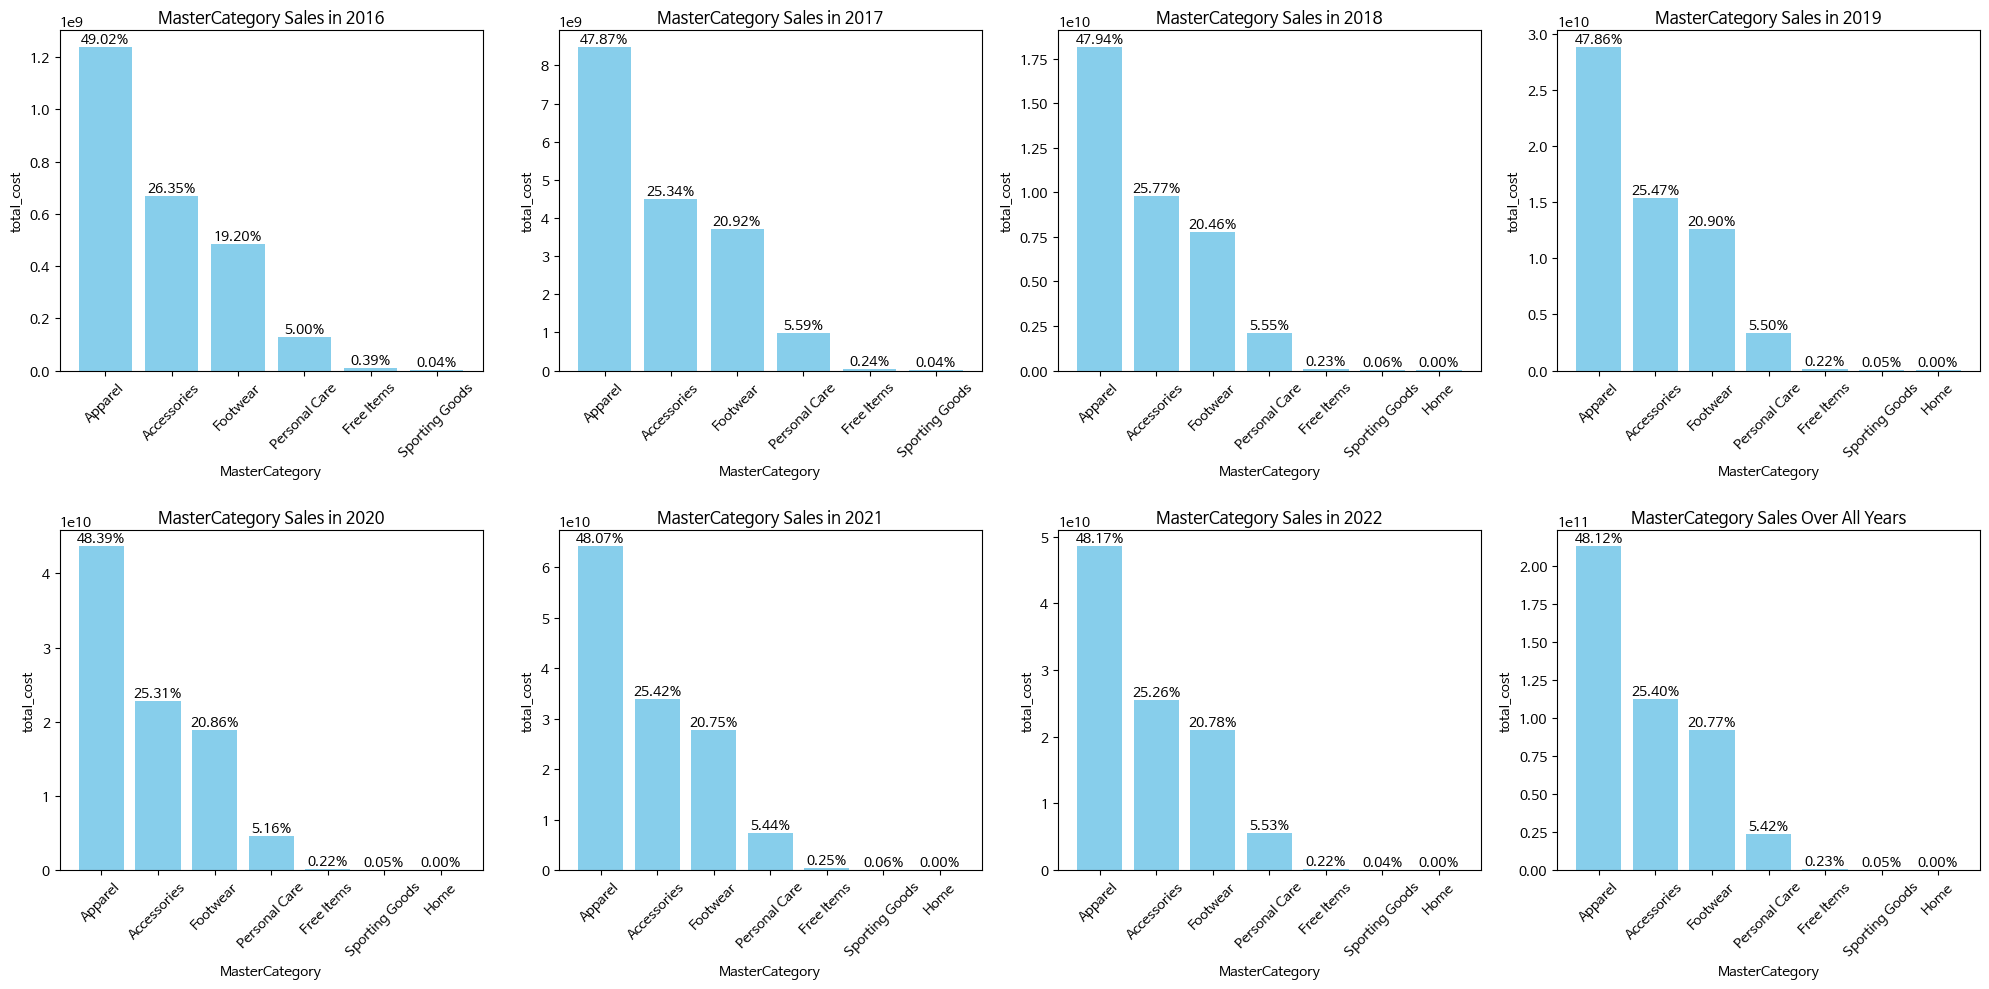

In [44]:
# 각 연도별로 그래프 생성
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subplot 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    # 해당 연도 데이터만 필터링
    mpt_year = mpt_n[mpt_n['created_at'].dt.year == year].copy()  # 데이터프레임 복사
    mpt_year['masterCategory'] = mpt_year['masterCategory'].astype(str)  # 문자열로 변환
    
    # 해당 연도 그래프 생성
    yearly_category_sales = mpt_year[mpt_year['payment_status'] == 'Success'].groupby(['masterCategory'])['total_cost'].sum().reset_index()
    yearly_category_sales = yearly_category_sales.sort_values(by='total_cost', ascending=False)
    
    bars = axes[i].bar(yearly_category_sales['masterCategory'], yearly_category_sales['total_cost'], color='skyblue')
    axes[i].set_title(f'MasterCategory Sales in {year}')
    axes[i].set_xlabel('MasterCategory')
    axes[i].set_ylabel('total_cost')
    axes[i].tick_params(axis='x', rotation=45)
    
    # 각 막대 위에 데이터에 퍼센트 표기
    total_sum = yearly_category_sales['total_cost'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_sum) * 100
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# 전체 년도에 대한 그래프 생성
mpt_all_years = mpt_n[mpt_n['payment_status'] == 'Success'].copy()
mpt_all_years['masterCategory'] = mpt_all_years['masterCategory'].astype(str)
yearly_category_sales_all = mpt_all_years.groupby(['masterCategory'])['total_cost'].sum().reset_index()
yearly_category_sales_all = yearly_category_sales_all.sort_values(by='total_cost', ascending=False)

ax = axes[-1]
bars = ax.bar(yearly_category_sales_all['masterCategory'], yearly_category_sales_all['total_cost'], color='skyblue')
ax.set_title('MasterCategory Sales Over All Years')
ax.set_xlabel('MasterCategory')
ax.set_ylabel('total_cost')
ax.tick_params(axis='x', rotation=45)

# 각 막대 위에 데이터에 퍼센트 표기
total_sum_all = yearly_category_sales_all['total_cost'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sum_all) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [45]:
monthly_transactions_success

year  month  masterCategory  success_count
0    2016      6         Apparel              1
1    2016      7     Accessories            108
2    2016      7         Apparel            172
3    2016      7        Footwear             75
4    2016      7      Free Items              1
..    ...    ...             ...            ...
442  2022      7        Footwear           7365
443  2022      7      Free Items             89
444  2022      7            Home              1
445  2022      7   Personal Care           1898
446  2022      7  Sporting Goods             17

[447 rows x 4 columns]

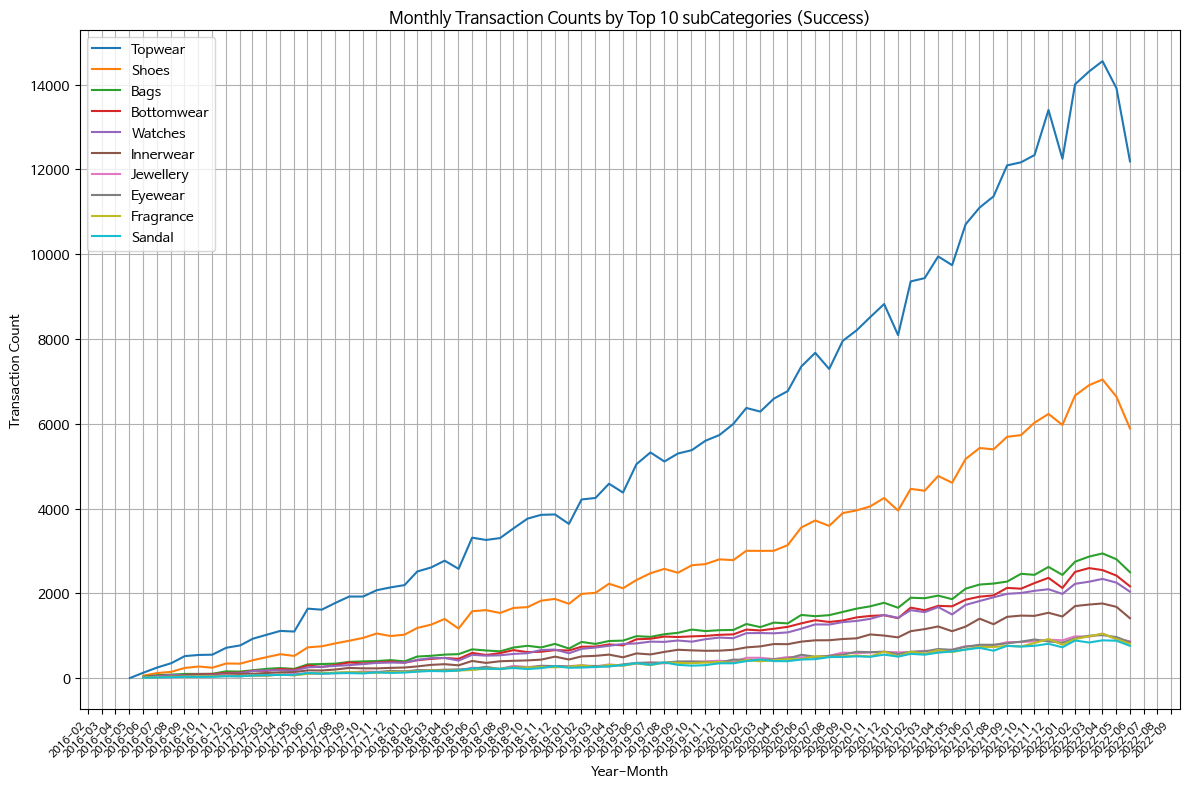

In [46]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_n[mpt_n['payment_status'] == 'Success'].groupby(['year', 'month', 'subCategory']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# subCategory별로 거래 수 상위 10개만 선택
top_categories = monthly_transactions_success.groupby('subCategory')['success_count'].sum().sort_values(ascending=False).head(10).index
top_category_data = monthly_transactions_success[monthly_transactions_success['subCategory'].isin(top_categories)]

# 각 subCategory 데이터별로 그래프 생성
for category in top_categories:
    category_data = top_category_data[top_category_data['subCategory'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by Top 10 subCategories (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

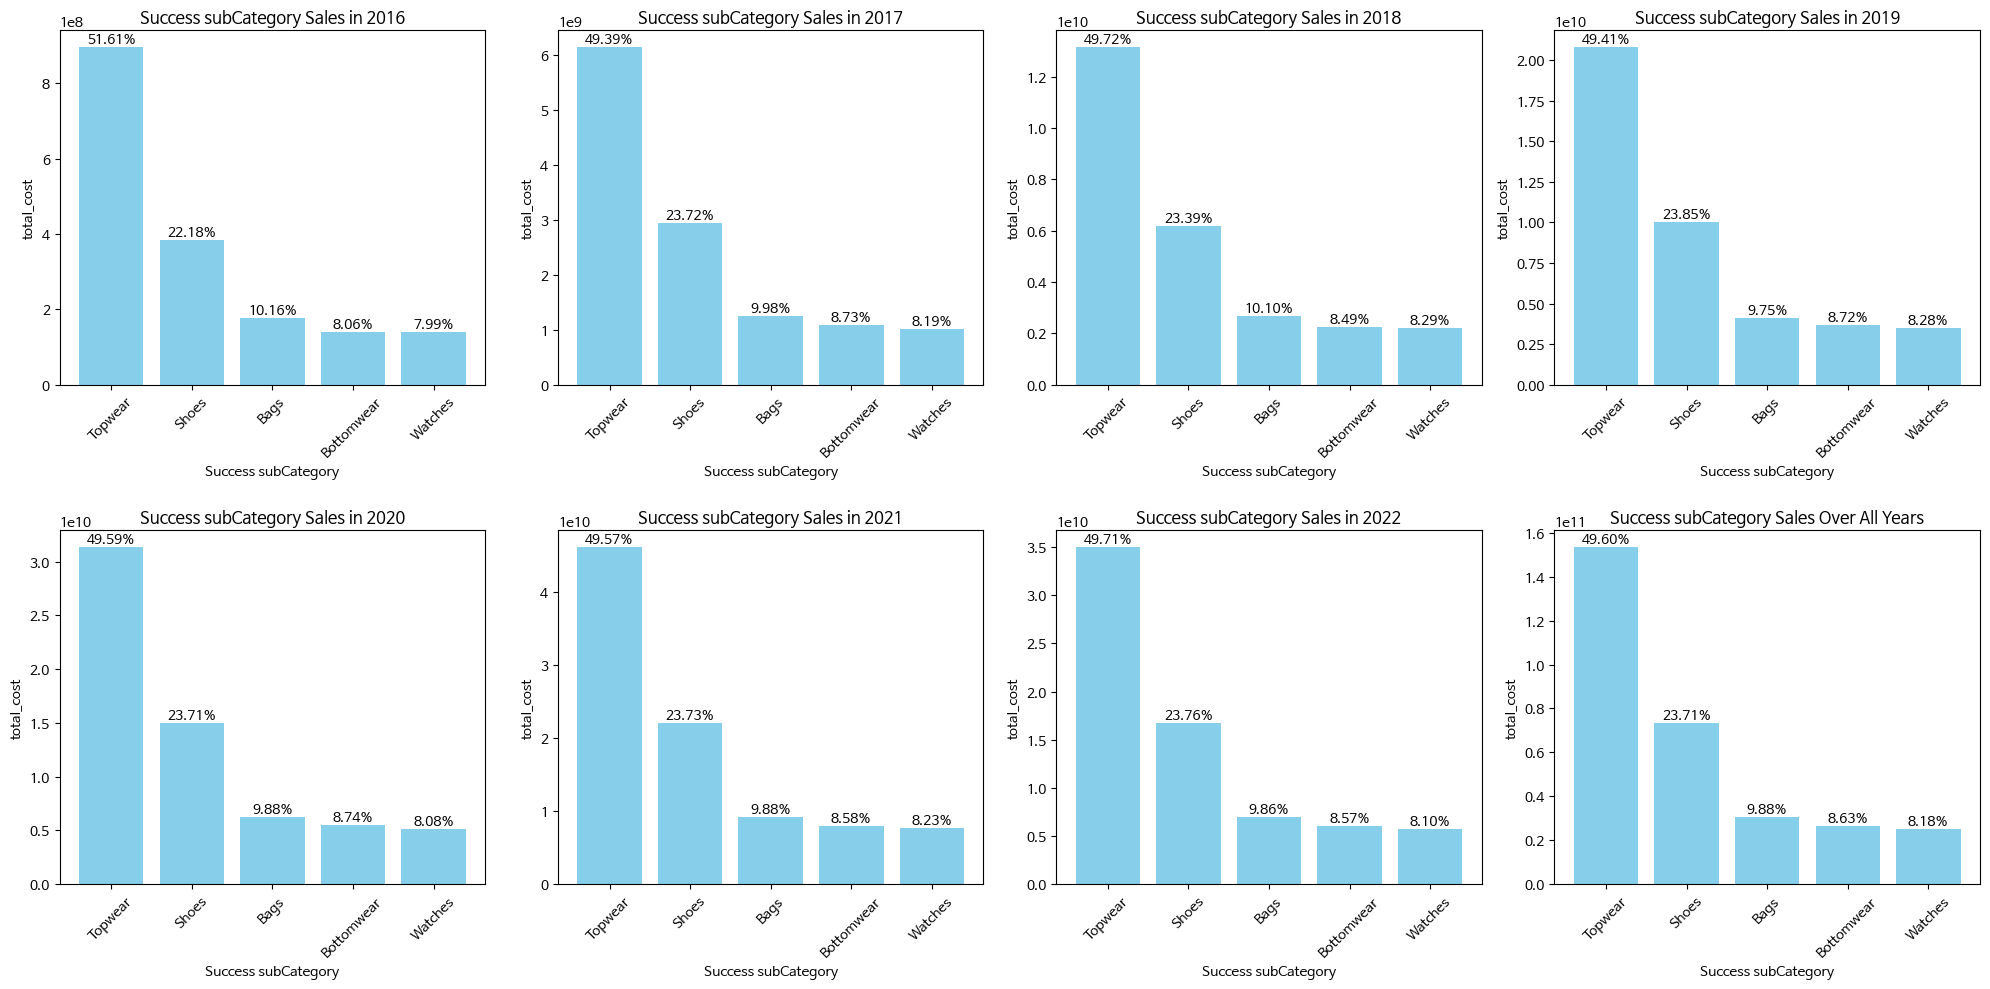

In [47]:
# 각 연도별로 그래프 생성
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subplot 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    # 해당 연도 데이터만 필터링
    mpt_year = mpt_n[mpt_n['created_at'].dt.year == year].copy()  # 데이터프레임 복사
    mpt_year['subCategory'] = mpt_year['subCategory'].astype(str)  # 문자열로 변환
    
    # 해당 연도 그래프 생성
    yearly_category_sales = mpt_year[mpt_year['payment_status'] == 'Success'].groupby(['subCategory'])['total_cost'].sum().reset_index()
    yearly_category_sales = yearly_category_sales.sort_values(by='total_cost', ascending=False)
    
    # 상위 5개 subCategory 선택
    top_5_subcategories = yearly_category_sales.head(5)
    
    bars = axes[i].bar(top_5_subcategories['subCategory'], top_5_subcategories['total_cost'], color='skyblue')
    axes[i].set_title(f'Success subCategory Sales in {year}')
    axes[i].set_xlabel('Success subCategory')
    axes[i].set_ylabel('total_cost')
    axes[i].tick_params(axis='x', rotation=45)
    
    # 각 막대 위에 데이터에 퍼센트 표기
    total_sum = top_5_subcategories['total_cost'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_sum) * 100
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# 전체 년도에 대한 그래프 생성
mpt_all_years = mpt_n[mpt_n['payment_status'] == 'Success'].copy()
mpt_all_years['subCategory'] = mpt_all_years['subCategory'].astype(str)
yearly_category_sales_all = mpt_all_years.groupby(['subCategory'])['total_cost'].sum().reset_index()
yearly_category_sales_all = yearly_category_sales_all.sort_values(by='total_cost', ascending=False)
top_5_subcategories_all = yearly_category_sales_all.head(5)

ax = axes[-1]
bars = ax.bar(top_5_subcategories_all['subCategory'], top_5_subcategories_all['total_cost'], color='skyblue')
ax.set_title('Success subCategory Sales Over All Years')
ax.set_xlabel('Success subCategory')
ax.set_ylabel('total_cost')
ax.tick_params(axis='x', rotation=45)

# 각 막대 위에 데이터에 퍼센트 표기
total_sum_all = top_5_subcategories_all['total_cost'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sum_all) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

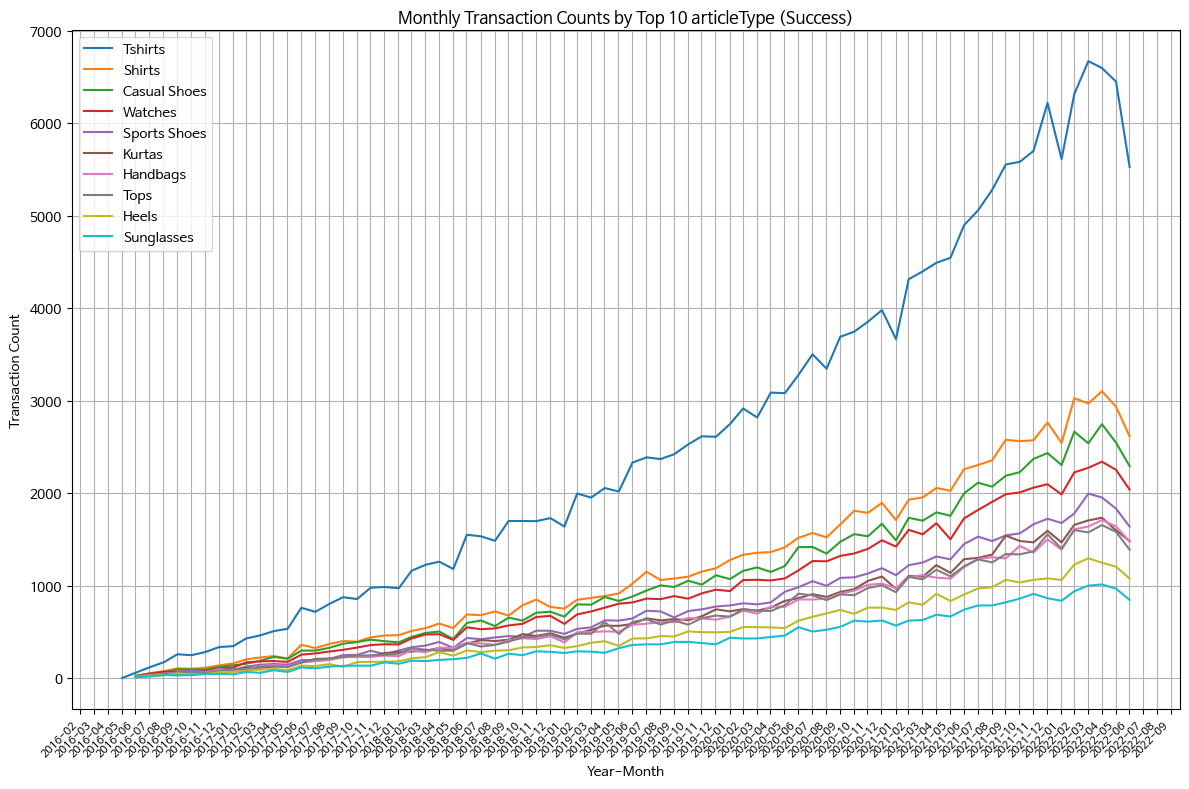

In [48]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_n[mpt_n['payment_status'] == 'Success'].groupby(['year', 'month', 'articleType']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# subCategory별로 거래 수 상위 10개만 선택
top_categories = monthly_transactions_success.groupby('articleType')['success_count'].sum().sort_values(ascending=False).head(10).index
top_category_data = monthly_transactions_success[monthly_transactions_success['articleType'].isin(top_categories)]

# 각 subCategory 데이터별로 그래프 생성
for category in top_categories:
    category_data = top_category_data[top_category_data['articleType'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by Top 10 articleType (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

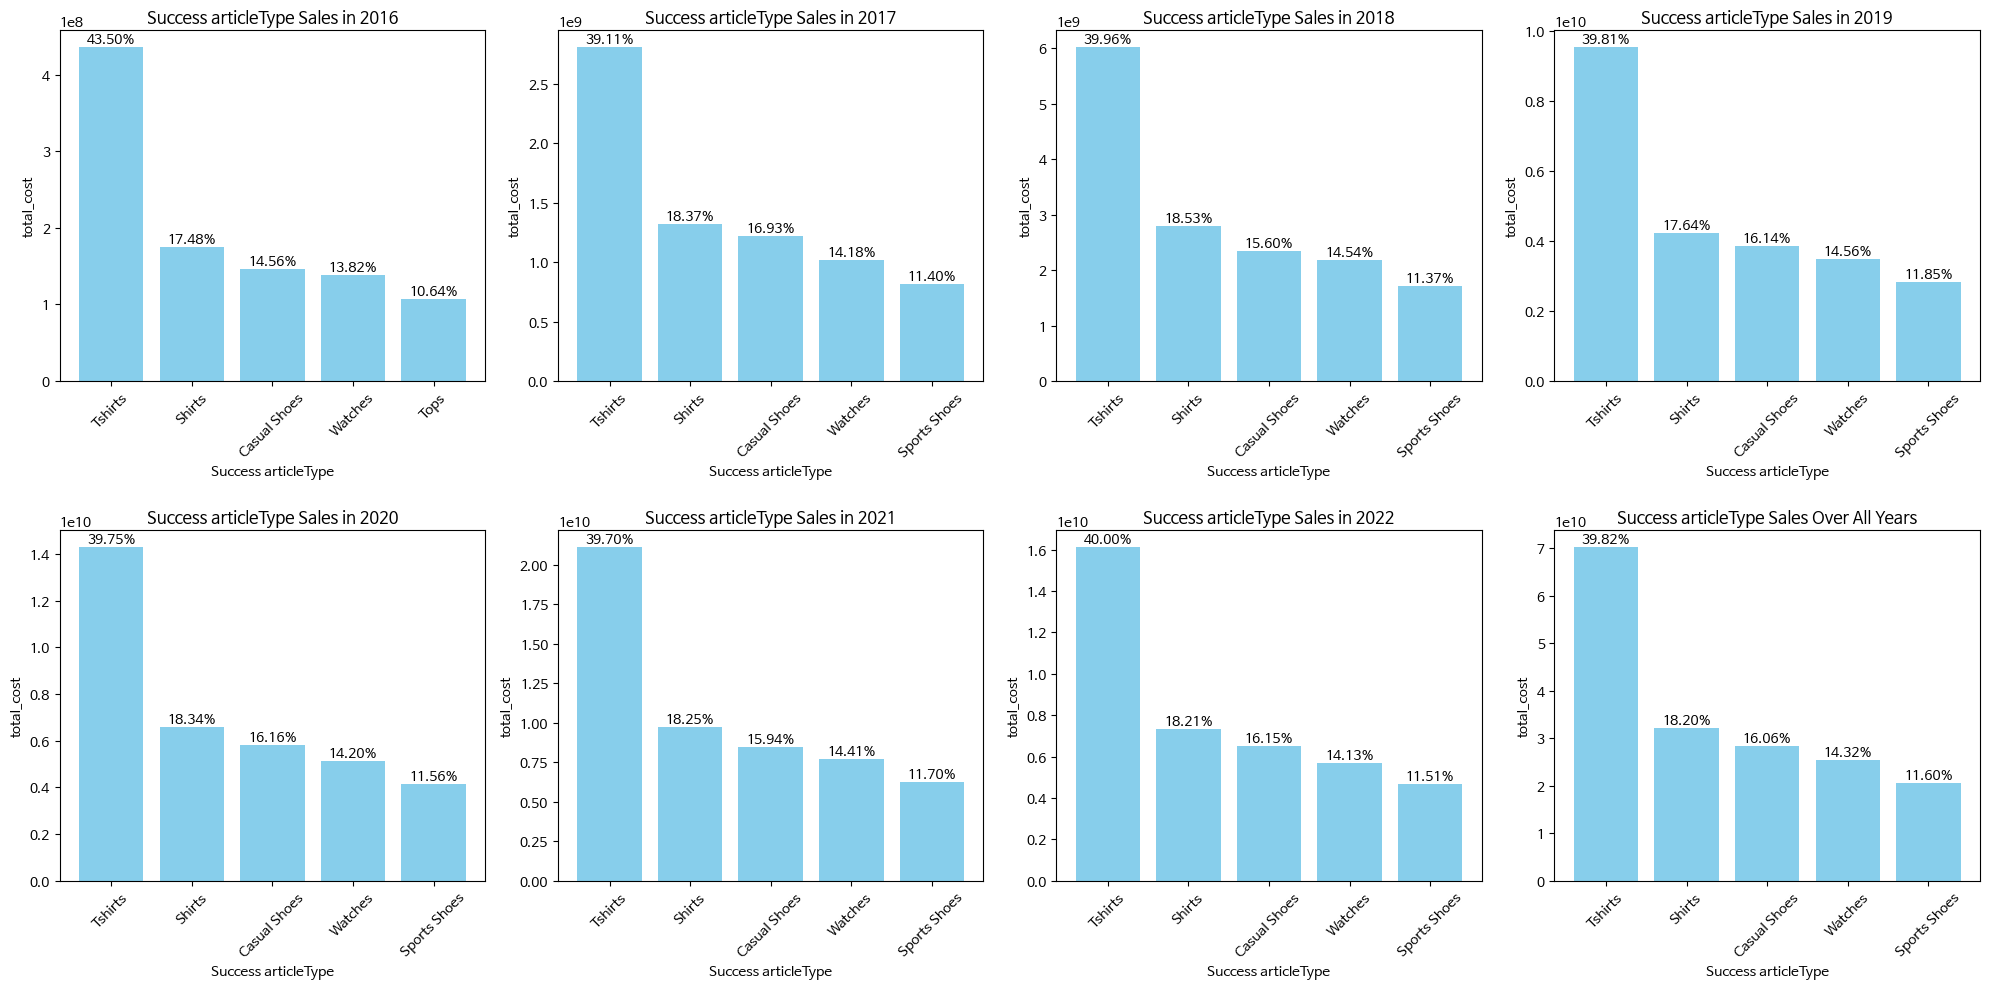

In [49]:
# 각 연도별로 그래프 생성
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subplot 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    # 해당 연도 데이터만 필터링
    mpt_year = mpt_n[mpt_n['created_at'].dt.year == year].copy()  # 데이터프레임 복사
    mpt_year['articleType'] = mpt_year['articleType'].astype(str)  # 문자열로 변환
    
    # 해당 연도 그래프 생성
    yearly_articleType_sales = mpt_year[mpt_year['payment_status'] == 'Success'].groupby(['articleType'])['total_cost'].sum().reset_index()
    yearly_articleType_sales = yearly_articleType_sales.sort_values(by='total_cost', ascending=False)
    
    # 상위 5개 articleType 선택
    top_5_articleType = yearly_articleType_sales.head(5)
    
    bars = axes[i].bar(top_5_articleType['articleType'], top_5_articleType['total_cost'], color='skyblue')
    axes[i].set_title(f'Success articleType Sales in {year}')
    axes[i].set_xlabel('Success articleType')
    axes[i].set_ylabel('total_cost')
    axes[i].tick_params(axis='x', rotation=45)
    
    # 각 막대 위에 데이터에 퍼센트 표기
    total_sum = top_5_articleType['total_cost'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_sum) * 100
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# 전체 년도에 대한 그래프 생성
mpt_all_years = mpt_n[mpt_n['payment_status'] == 'Success'].copy()
mpt_all_years['articleType'] = mpt_all_years['articleType'].astype(str)
yearly_articleType_sales_all = mpt_all_years.groupby(['articleType'])['total_cost'].sum().reset_index()
yearly_articleType_sales_all = yearly_articleType_sales_all.sort_values(by='total_cost', ascending=False)
top_5_articleType_all = yearly_articleType_sales_all.head(5)

ax = axes[-1]
bars = ax.bar(top_5_articleType_all['articleType'], top_5_articleType_all['total_cost'], color='skyblue')
ax.set_title('Success articleType Sales Over All Years')
ax.set_xlabel('Success articleType')
ax.set_ylabel('total_cost')
ax.tick_params(axis='x', rotation=45)

# 각 막대 위에 데이터에 퍼센트 표기
total_sum_all = top_5_articleType_all['total_cost'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sum_all) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

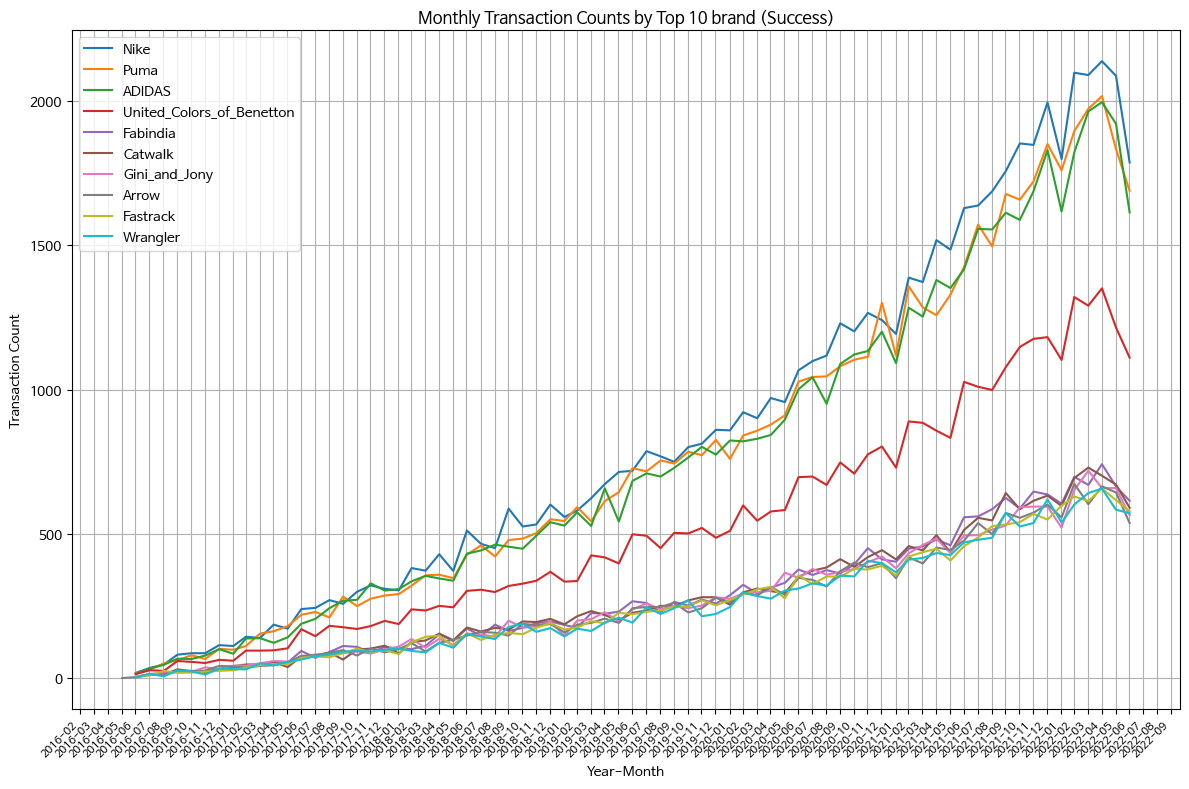

In [50]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_n[mpt_n['payment_status'] == 'Success'].groupby(['year', 'month', 'brand']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# subCategory별로 거래 수 상위 10개만 선택
top_categories = monthly_transactions_success.groupby('brand')['success_count'].sum().sort_values(ascending=False).head(10).index
top_category_data = monthly_transactions_success[monthly_transactions_success['brand'].isin(top_categories)]

# 각 subCategory 데이터별로 그래프 생성
for category in top_categories:
    category_data = top_category_data[top_category_data['brand'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by Top 10 brand (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

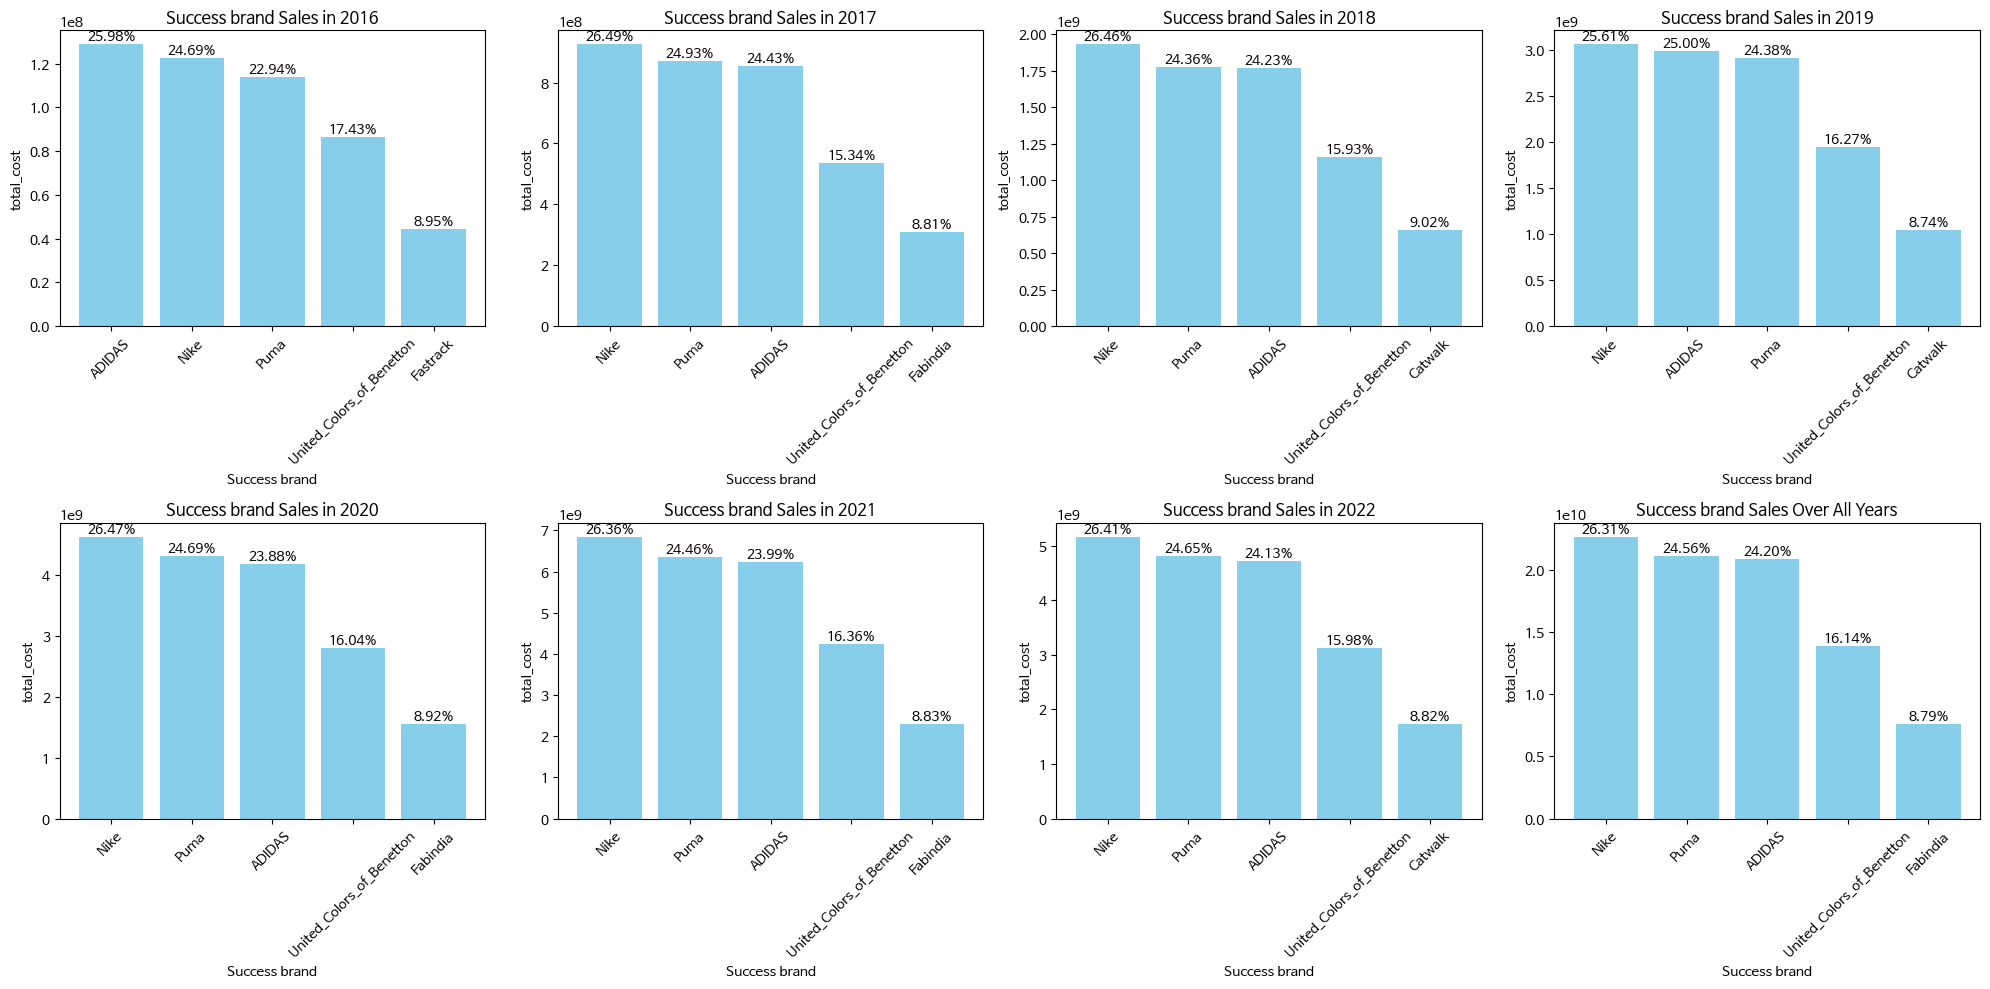

In [51]:
# 각 연도별로 그래프 생성
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subplot 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    # 해당 연도 데이터만 필터링
    mpt_year = mpt_n[mpt_n['created_at'].dt.year == year].copy()  # 데이터프레임 복사
    mpt_year['brand'] = mpt_year['brand'].astype(str)  # 문자열로 변환
    
    # 해당 연도 그래프 생성
    yearly_brand_sales = mpt_year[mpt_year['payment_status'] == 'Success'].groupby(['brand'])['total_cost'].sum().reset_index()
    yearly_brand_sales = yearly_brand_sales.sort_values(by='total_cost', ascending=False)
    
    # 상위 5개 brand 선택
    top_5_brand = yearly_brand_sales.head(5)
    
    bars = axes[i].bar(top_5_brand['brand'], top_5_brand['total_cost'], color='skyblue')
    axes[i].set_title(f'Success brand Sales in {year}')
    axes[i].set_xlabel('Success brand')
    axes[i].set_ylabel('total_cost')
    axes[i].tick_params(axis='x', rotation=45)
    
    # 각 막대 위에 데이터에 퍼센트 표기
    total_sum = top_5_brand['total_cost'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_sum) * 100
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# 전체 년도에 대한 그래프 생성
mpt_all_years = mpt_n[mpt_n['payment_status'] == 'Success'].copy()
mpt_all_years['brand'] = mpt_all_years['brand'].astype(str)
yearly_brand_sales_all = mpt_all_years.groupby(['brand'])['total_cost'].sum().reset_index()
yearly_brand_sales_all = yearly_brand_sales_all.sort_values(by='total_cost', ascending=False)
top_5_brand_all = yearly_brand_sales_all.head(5)

ax = axes[-1]
bars = ax.bar(top_5_brand_all['brand'], top_5_brand_all['total_cost'], color='skyblue')
ax.set_title('Success brand Sales Over All Years')
ax.set_xlabel('Success brand')
ax.set_ylabel('total_cost')
ax.tick_params(axis='x', rotation=45)

# 각 막대 위에 데이터에 퍼센트 표기
total_sum_all = top_5_brand_all['total_cost'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sum_all) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

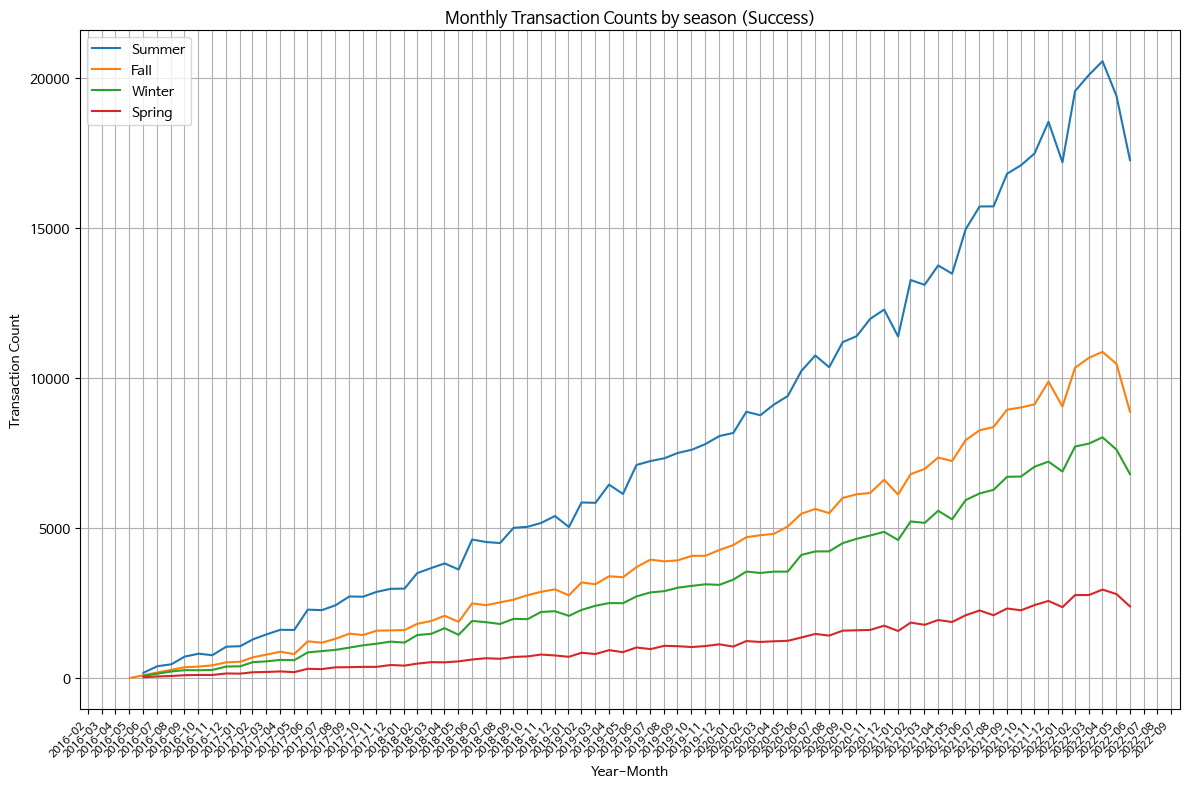

In [52]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_n[mpt_n['payment_status'] == 'Success'].groupby(['year', 'month', 'season']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# subCategory별로 거래 수 상위 10개만 선택
top_categories = monthly_transactions_success.groupby('season')['success_count'].sum().sort_values(ascending=False).head(10).index
top_category_data = monthly_transactions_success[monthly_transactions_success['season'].isin(top_categories)]

# 각 subCategory 데이터별로 그래프 생성
for category in top_categories:
    category_data = top_category_data[top_category_data['season'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by season (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

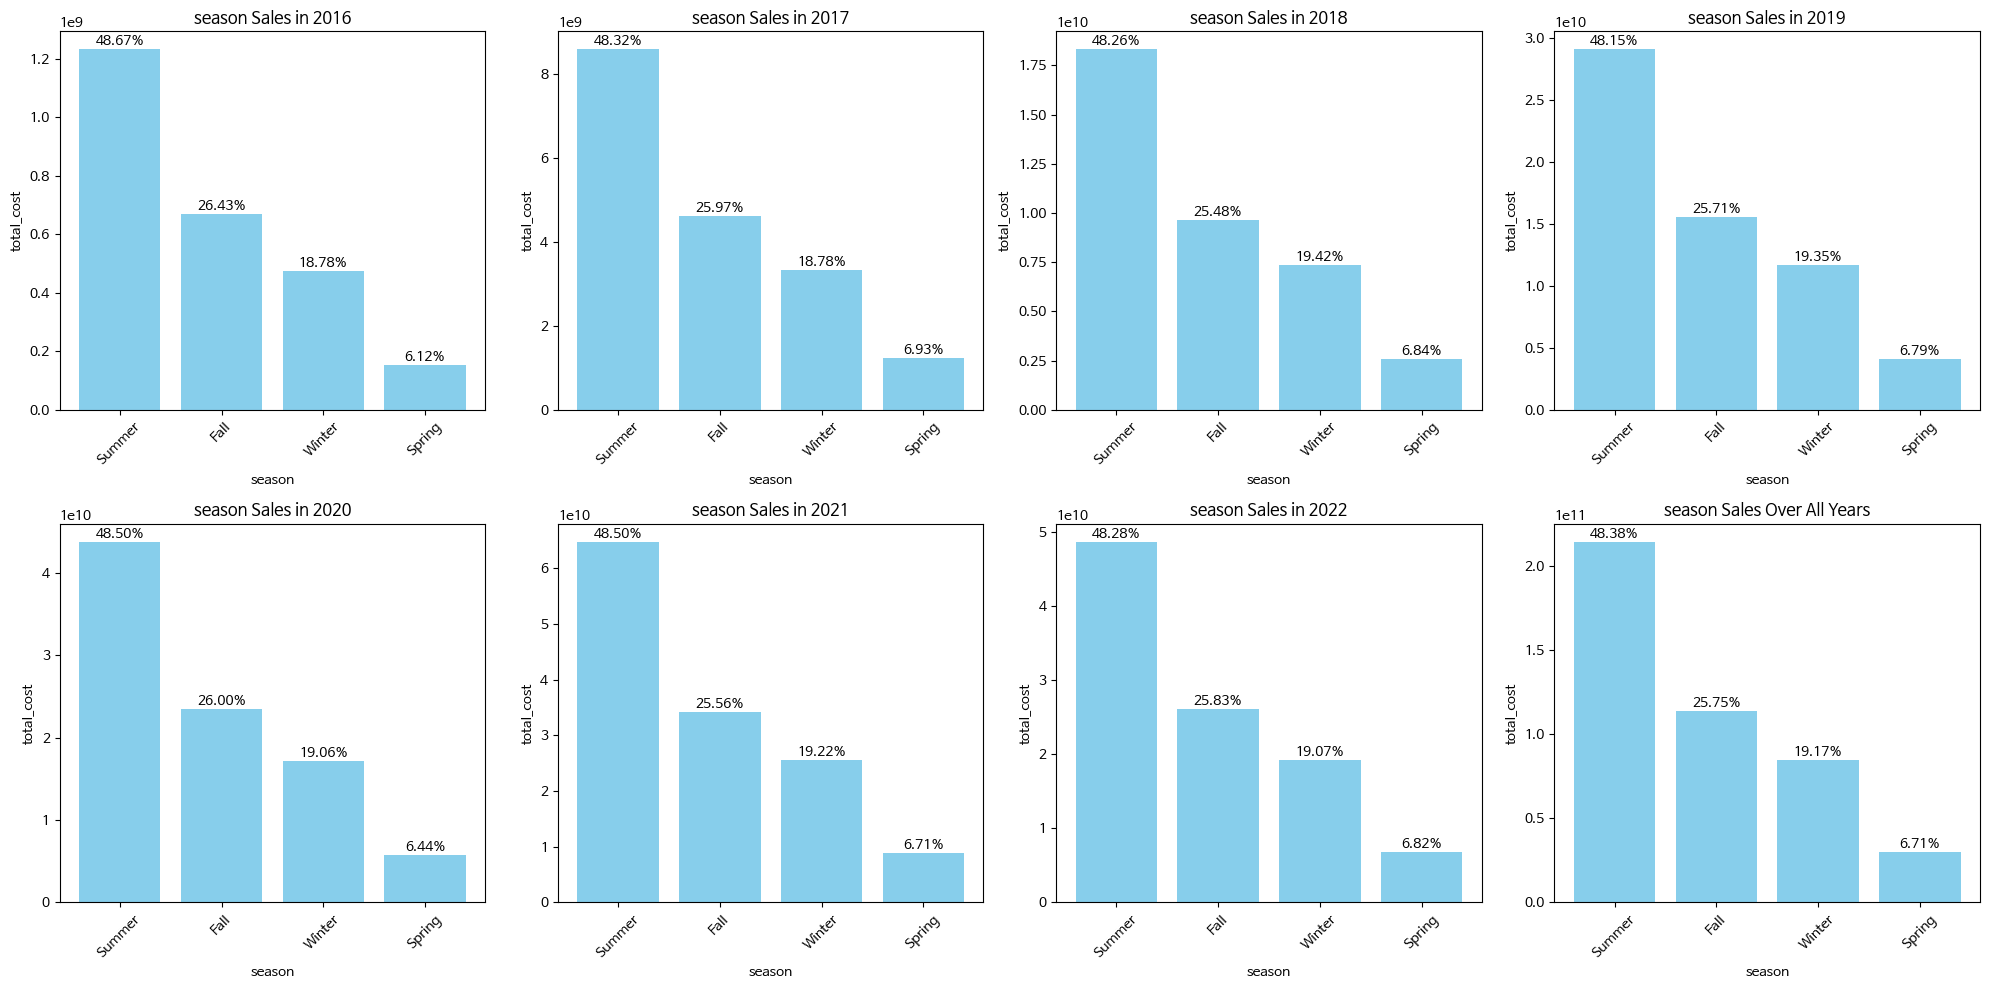

In [53]:
# 각 연도별로 그래프 생성
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subplot 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    # 해당 연도 데이터만 필터링
    mpt_year = mpt_n[mpt_n['created_at'].dt.year == year].copy()  # 데이터프레임 복사
    mpt_year['season'] = mpt_year['season'].astype(str)  # 문자열로 변환
    
    # 해당 연도 그래프 생성
    yearly_category_sales = mpt_year[mpt_year['payment_status'] == 'Success'].groupby(['season'])['total_cost'].sum().reset_index()
    yearly_category_sales = yearly_category_sales.sort_values(by='total_cost', ascending=False)
    
    bars = axes[i].bar(yearly_category_sales['season'], yearly_category_sales['total_cost'], color='skyblue')
    axes[i].set_title(f'season Sales in {year}')
    axes[i].set_xlabel('season')
    axes[i].set_ylabel('total_cost')
    axes[i].tick_params(axis='x', rotation=45)
    
    # 각 막대 위에 데이터에 퍼센트 표기
    total_sum = yearly_category_sales['total_cost'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_sum) * 100
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# 전체 년도에 대한 그래프 생성
mpt_all_years = mpt_n[mpt_n['payment_status'] == 'Success'].copy()
mpt_all_years['season'] = mpt_all_years['season'].astype(str)
yearly_category_sales_all = mpt_all_years.groupby(['season'])['total_cost'].sum().reset_index()
yearly_category_sales_all = yearly_category_sales_all.sort_values(by='total_cost', ascending=False)

ax = axes[-1]
bars = ax.bar(yearly_category_sales_all['season'], yearly_category_sales_all['total_cost'], color='skyblue')
ax.set_title('season Sales Over All Years')
ax.set_xlabel('season')
ax.set_ylabel('total_cost')
ax.tick_params(axis='x', rotation=45)

# 각 막대 위에 데이터에 퍼센트 표기
total_sum_all = yearly_category_sales_all['total_cost'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sum_all) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

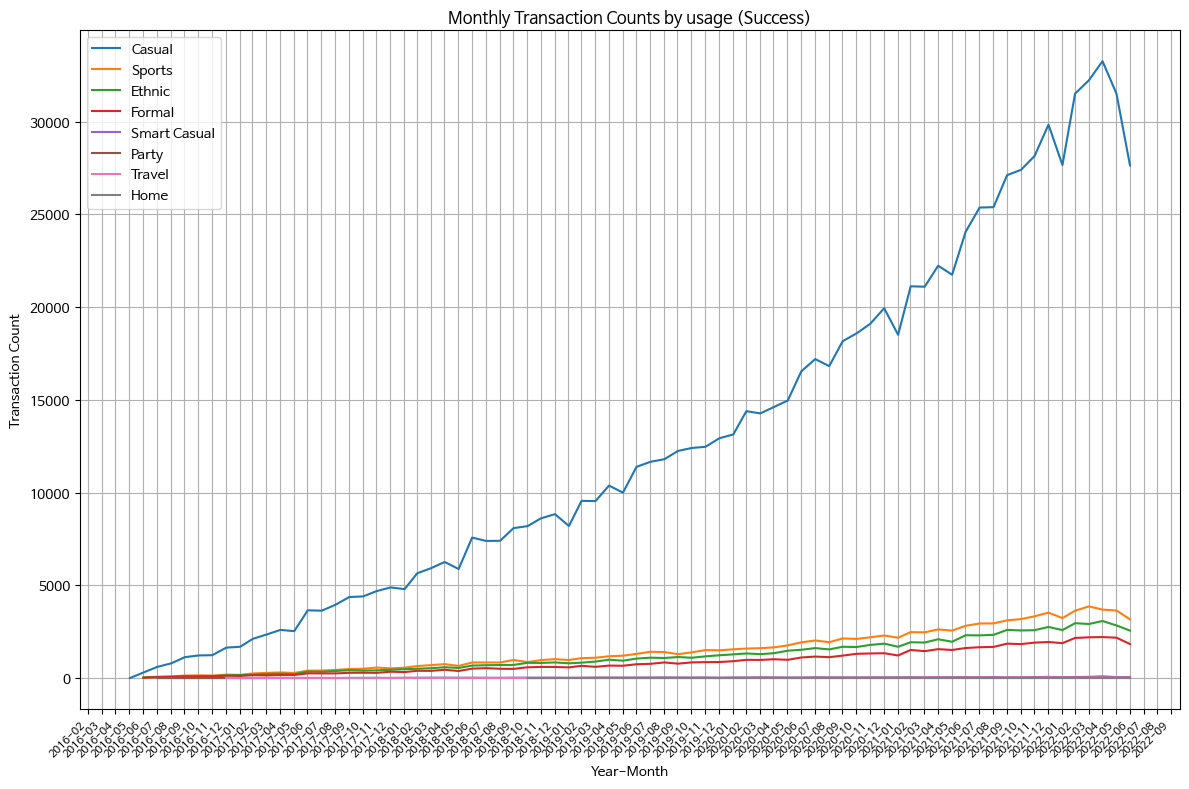

In [54]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_n[mpt_n['payment_status'] == 'Success'].groupby(['year', 'month', 'usage']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# subCategory별로 거래 수 상위 10개만 선택
top_categories = monthly_transactions_success.groupby('usage')['success_count'].sum().sort_values(ascending=False).head(10).index
top_category_data = monthly_transactions_success[monthly_transactions_success['usage'].isin(top_categories)]

# 각 subCategory 데이터별로 그래프 생성
for category in top_categories:
    category_data = top_category_data[top_category_data['usage'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by usage (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

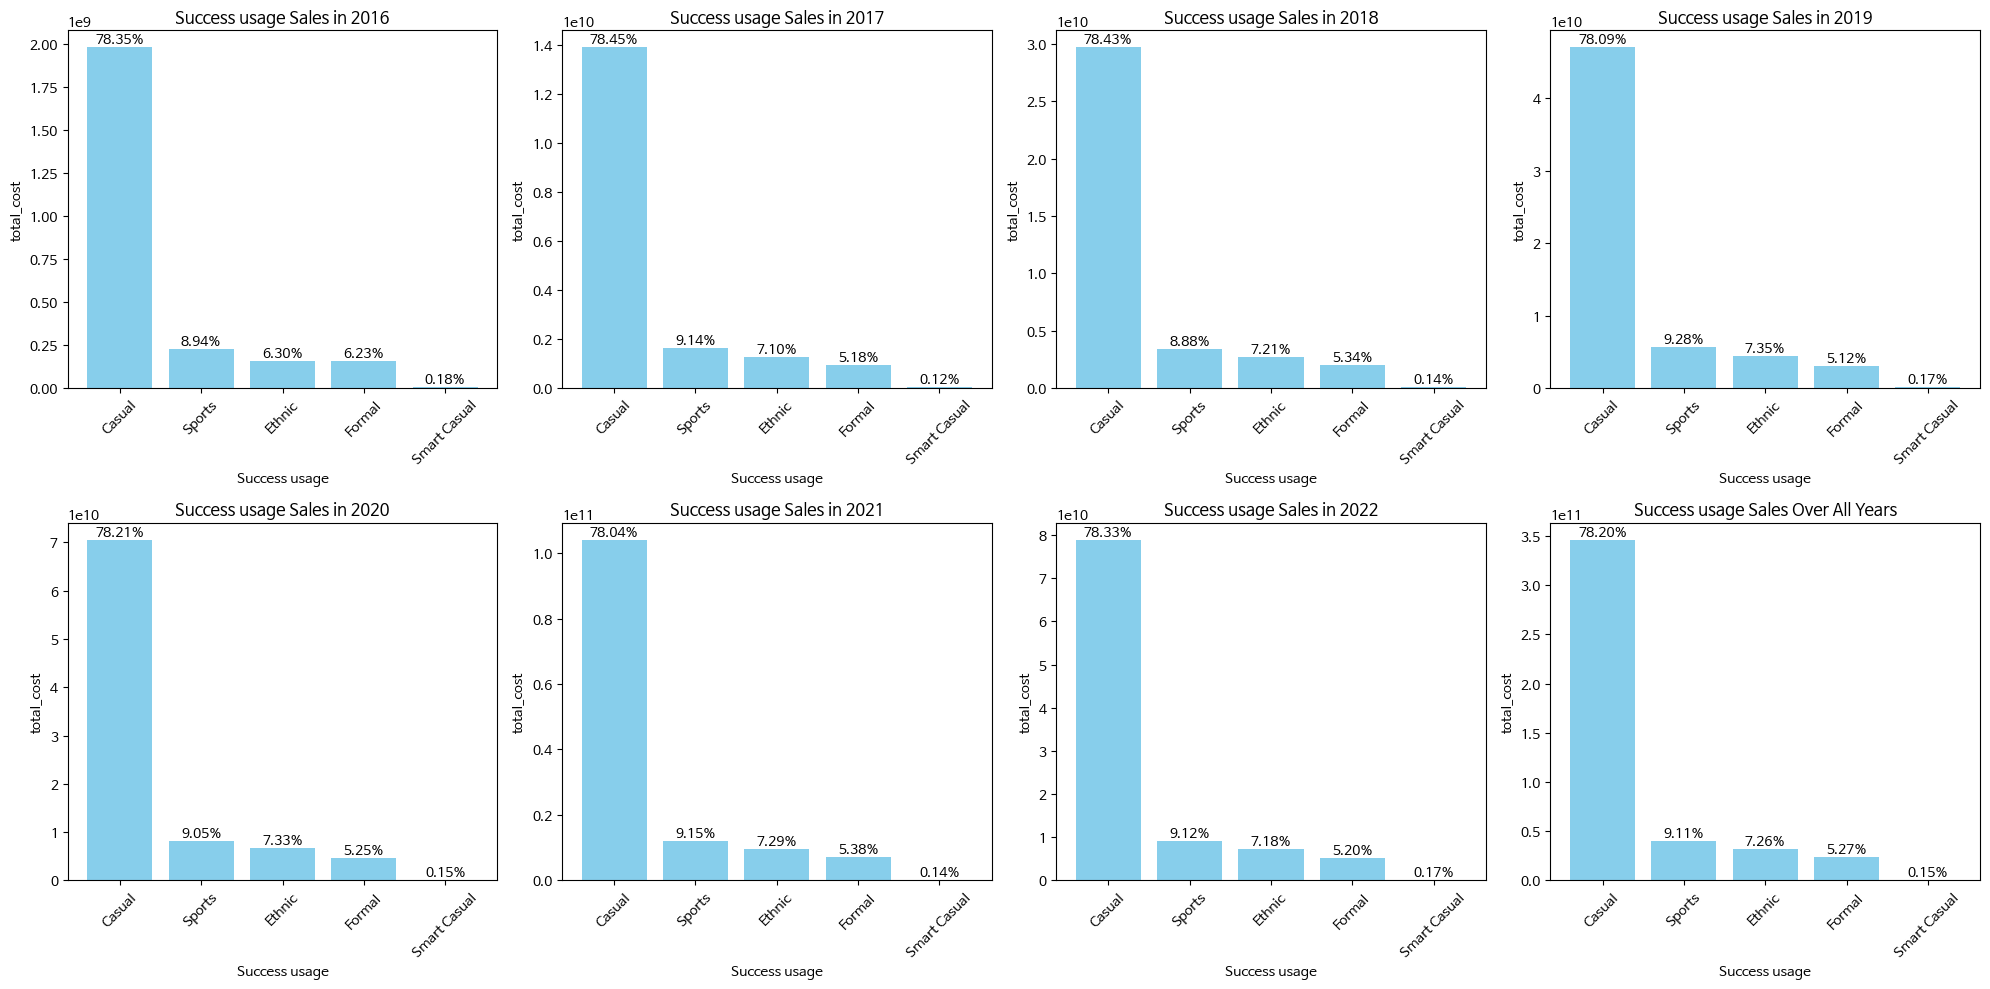

In [55]:
# 각 연도별로 그래프 생성
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subplot 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    # 해당 연도 데이터만 필터링
    mpt_year = mpt_n[mpt_n['created_at'].dt.year == year].copy()  # 데이터프레임 복사
    mpt_year['usage'] = mpt_year['usage'].astype(str)  # 문자열로 변환
    
    # 해당 연도 그래프 생성
    yearly_brand_sales = mpt_year[mpt_year['payment_status'] == 'Success'].groupby(['usage'])['total_cost'].sum().reset_index()
    yearly_brand_sales = yearly_brand_sales.sort_values(by='total_cost', ascending=False)
    
    # 상위 5개 brand 선택
    top_5_brand = yearly_brand_sales.head(5)
    
    bars = axes[i].bar(top_5_brand['usage'], top_5_brand['total_cost'], color='skyblue')
    axes[i].set_title(f'Success usage Sales in {year}')
    axes[i].set_xlabel('Success usage')
    axes[i].set_ylabel('total_cost')
    axes[i].tick_params(axis='x', rotation=45)
    
    # 각 막대 위에 데이터에 퍼센트 표기
    total_sum = top_5_brand['total_cost'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_sum) * 100
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# 전체 년도에 대한 그래프 생성
mpt_all_years = mpt_n[mpt_n['payment_status'] == 'Success'].copy()
mpt_all_years['usage'] = mpt_all_years['usage'].astype(str)
yearly_brand_sales_all = mpt_all_years.groupby(['usage'])['total_cost'].sum().reset_index()
yearly_brand_sales_all = yearly_brand_sales_all.sort_values(by='total_cost', ascending=False)
top_5_brand_all = yearly_brand_sales_all.head(5)

ax = axes[-1]
bars = ax.bar(top_5_brand_all['usage'], top_5_brand_all['total_cost'], color='skyblue')
ax.set_title('Success usage Sales Over All Years')
ax.set_xlabel('Success usage')
ax.set_ylabel('total_cost')
ax.tick_params(axis='x', rotation=45)

# 각 막대 위에 데이터에 퍼센트 표기
total_sum_all = top_5_brand_all['total_cost'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sum_all) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

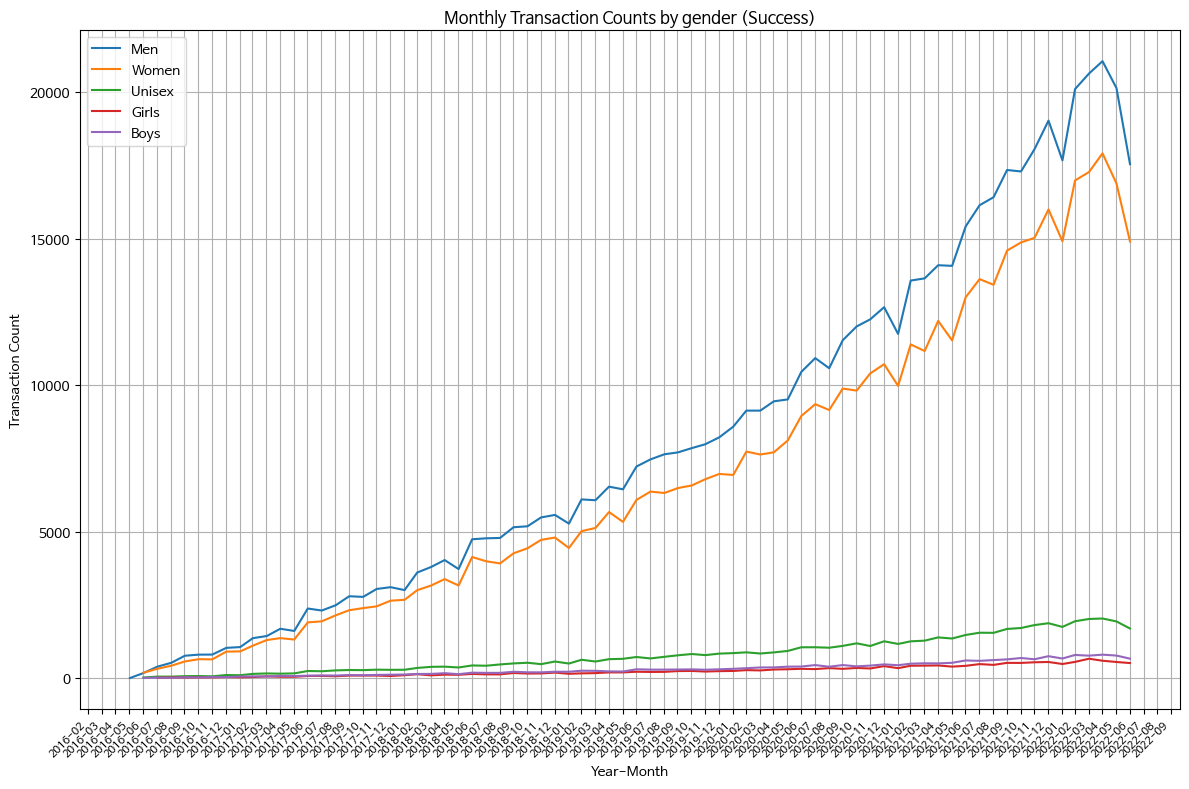

In [56]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_n[mpt_n['payment_status'] == 'Success'].groupby(['year', 'month', 'gender']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_n['gender'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['gender'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by gender (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

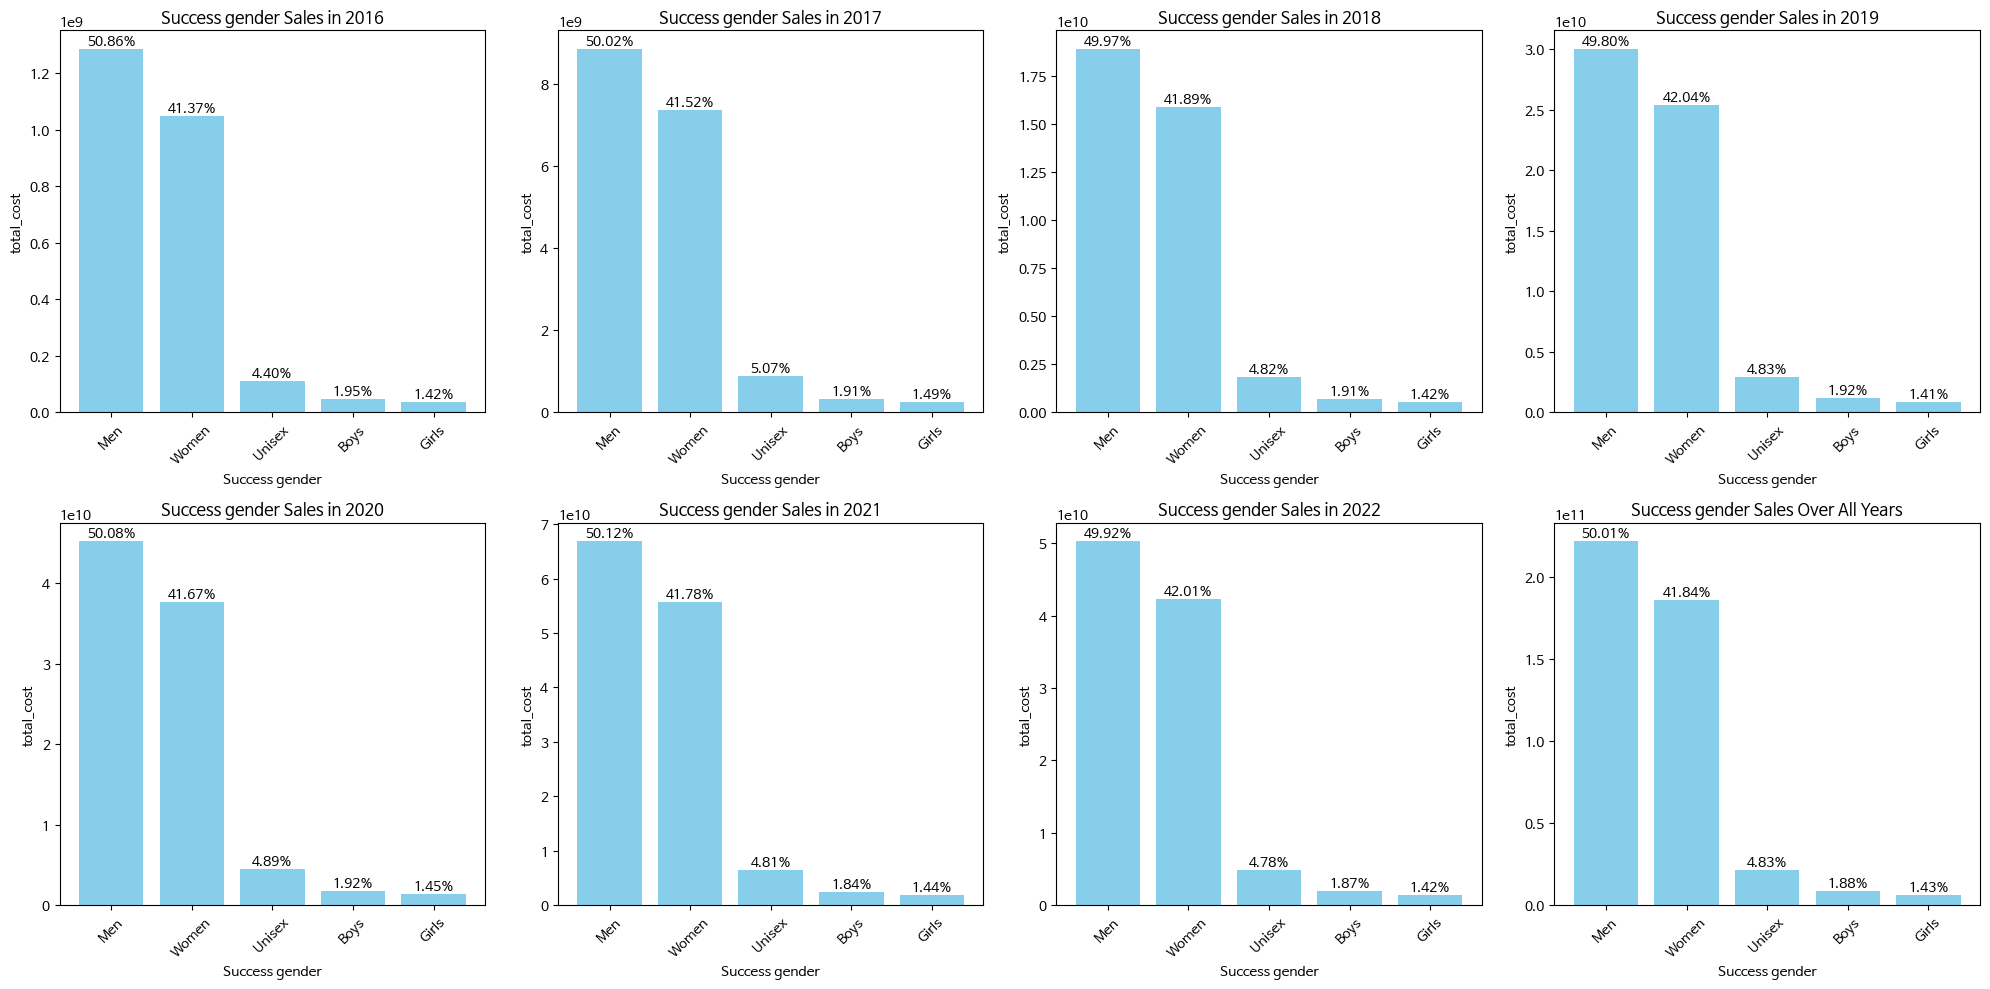

In [57]:
# 각 연도별로 그래프 생성
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subplot 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    # 해당 연도 데이터만 필터링
    mpt_year = mpt_n[mpt_n['created_at'].dt.year == year].copy()  # 데이터프레임 복사
    mpt_year['gender'] = mpt_year['gender'].astype(str)  # 문자열로 변환
    
    # 해당 연도 그래프 생성
    yearly_brand_sales = mpt_year[mpt_year['payment_status'] == 'Success'].groupby(['gender'])['total_cost'].sum().reset_index()
    yearly_brand_sales = yearly_brand_sales.sort_values(by='total_cost', ascending=False)
    
    # 상위 5개 brand 선택
    top_5_brand = yearly_brand_sales.head(5)
    
    bars = axes[i].bar(top_5_brand['gender'], top_5_brand['total_cost'], color='skyblue')
    axes[i].set_title(f'Success gender Sales in {year}')
    axes[i].set_xlabel('Success gender')
    axes[i].set_ylabel('total_cost')
    axes[i].tick_params(axis='x', rotation=45)
    
    # 각 막대 위에 데이터에 퍼센트 표기
    total_sum = top_5_brand['total_cost'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_sum) * 100
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# 전체 년도에 대한 그래프 생성
mpt_all_years = mpt_n[mpt_n['payment_status'] == 'Success'].copy()
mpt_all_years['gender'] = mpt_all_years['gender'].astype(str)
yearly_brand_sales_all = mpt_all_years.groupby(['gender'])['total_cost'].sum().reset_index()
yearly_brand_sales_all = yearly_brand_sales_all.sort_values(by='total_cost', ascending=False)
top_5_brand_all = yearly_brand_sales_all.head(5)

ax = axes[-1]
bars = ax.bar(top_5_brand_all['gender'], top_5_brand_all['total_cost'], color='skyblue')
ax.set_title('Success gender Sales Over All Years')
ax.set_xlabel('Success gender')
ax.set_ylabel('total_cost')
ax.tick_params(axis='x', rotation=45)

# 각 막대 위에 데이터에 퍼센트 표기
total_sum_all = top_5_brand_all['total_cost'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sum_all) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [58]:
mpt_n.head().T

0  \
created_at                       2018-07-29 00:00:00   
customer_id                                     5868   
booking_id      186e2bee-0637-4710-8981-50c2d737bc42   
session_id      3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                    1415   
promo_code                               WEEKENDSERU   
shipment_fee                                   10000   
product_id                                     54728   
quantity                                           1   
item_price                                    191247   
shipment_date                                      4   
total_cost                                    191247   
customer_type                                      0   
gender                                           Men   
masterCategory                              Footwear   
subCategory                                    Shoes   
articleType                             Casual Shoes   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                           Vans   
year                                            2018   
month                                              7   

                                                   1  \
created_at                       2018-07-30 00:00:00   
customer_id                                     4774   
booking_id      caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id      2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                           Credit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     16193   
quantity                                           1   
item_price                                    145526   
shipment_date                                      3   
total_cost                                    145526   
customer_type                                      1   
gender                                           Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                 Sweaters   
baseColour                                     Green   
season                                          Fall   
usage                                         Casual   
brand                                           Puma   
year                                            2018   
month                                              7   

                                                   2  \
created_at                       2018-09-15 00:00:00   
customer_id                                     4774   
booking_id      6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
session_id      93325fb6-eb00-4268-bb0e-6471795a0ad0   
payment_method                                   OVO   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     53686   
quantity                                           4   
item_price                                    135174   
shipment_date                                      2   
total_cost                                    540696   
customer_type                                      1   
gender                                         Women   
masterCategory                           Accessories   
subCategory                                     Bags   
articleType                                 Handbags   
baseColour       

In [59]:
# 'item_price' 컬럼의 최소값, 최대값, 평균 계산
min_price = mpt_n['item_price'].min()
max_price = mpt_n['item_price'].max()
avg_price = mpt_n['item_price'].mean()
q1 = mpt_n['item_price'].quantile(0.25)  # 1사분위 (25% 위치)
q2 = mpt_n['item_price'].quantile(0.50)  # 2사분위 (50% 위치, 중앙값)
q3 = mpt_n['item_price'].quantile(0.75)  # 3사분위 (75% 위치)

print("최소값:", min_price)
print("최대값:", max_price)
print("평균값:", avg_price)
print("1사분위:", q1)
print("2사분위 (중앙값):", q2)
print("3사분위:", q3)

최소값: 5600
최대값: 1200357
평균값: 249974.4395581009
1사분위: 168373.0
2사분위 (중앙값): 233540.0
3사분위: 313647.0


인도네시아 환율 1루피아 = 0.086원
최소 루피아 = 484원
최대 루피아 = 103,731원
평균 루피아 = 21,602원
인도네시아 1인당 GNI(국내총소득) = 70014231루피아 = 6,048,987원 1달 수입은 504,082원
대한민국 1인당 GNI = 4,3116,602원 = 1달 수입 3,593,050원

In [60]:
mpt_ng = mpt_n.copy()

In [61]:
mpt_ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   created_at      1254585 non-null  datetime64[ns]
 1   customer_id     1254585 non-null  int64         
 2   booking_id      1254585 non-null  object        
 3   session_id      1254585 non-null  object        
 4   payment_method  1254585 non-null  object        
 5   payment_status  1254585 non-null  object        
 6   promo_amount    1254585 non-null  int64         
 7   promo_code      1254585 non-null  object        
 8   shipment_fee    1254585 non-null  int64         
 9   product_id      1254585 non-null  int64         
 10  quantity        1254585 non-null  int64         
 11  item_price      1254585 non-null  int64         
 12  shipment_date   1254585 non-null  int64         
 13  total_cost      1254585 non-null  int64         
 14  customer_type   12

In [62]:
# 저가 중가 고가 구분
def categorize_price(item_price):
    q1 = np.percentile(mpt_ng['item_price'], 25)
    q3 = np.percentile(mpt_ng['item_price'], 75)
    
    categories = np.select([item_price <= q1, item_price <= q3], ['저가', '중가'], default='고가')
    return categories

# 'price_category' 컬럼 추가하여 벡터화된 연산으로 그룹화
mpt_ng['price_category'] = categorize_price(mpt_ng['item_price'])
mpt_ng['price_category'].value_counts()

price_category
중가    627296
저가    313647
고가    313642
Name: count, dtype: int64

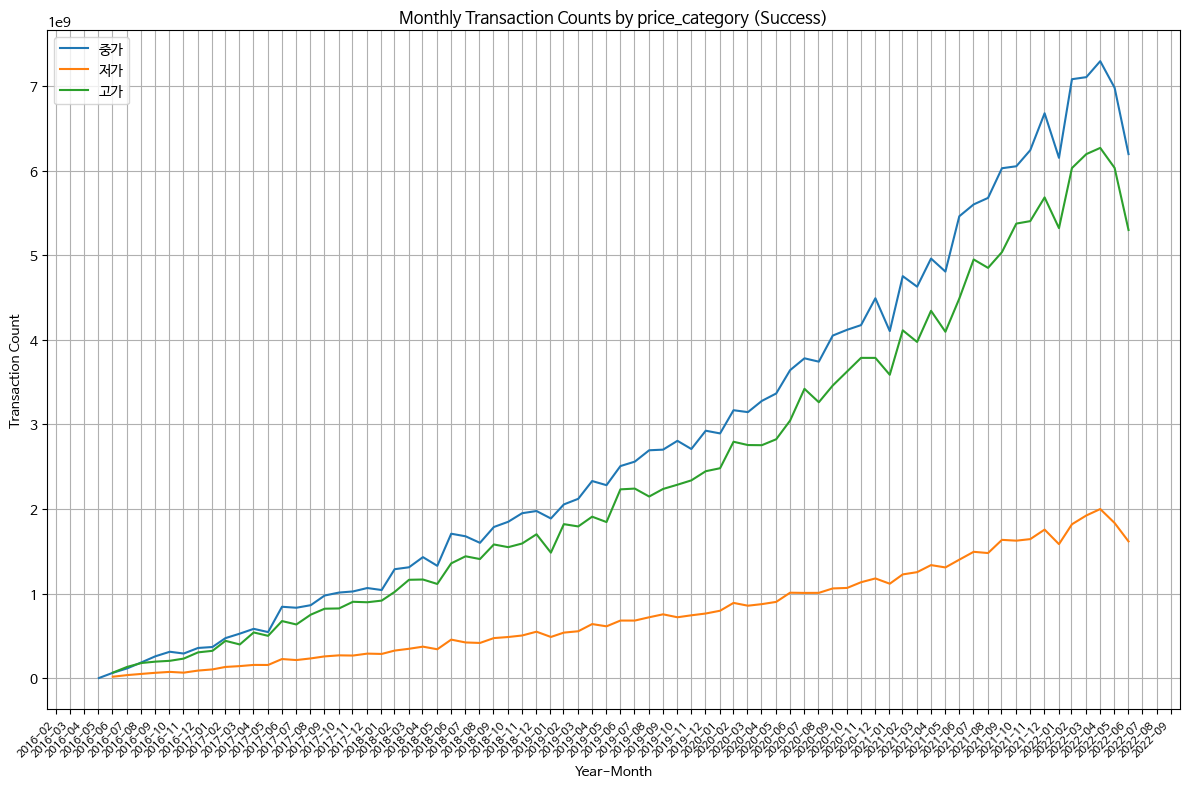

In [63]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_ng[mpt_ng['payment_status'] == 'Success'].groupby(['year', 'month', 'price_category'])['total_cost'].sum().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_ng['price_category'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['price_category'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by price_category (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

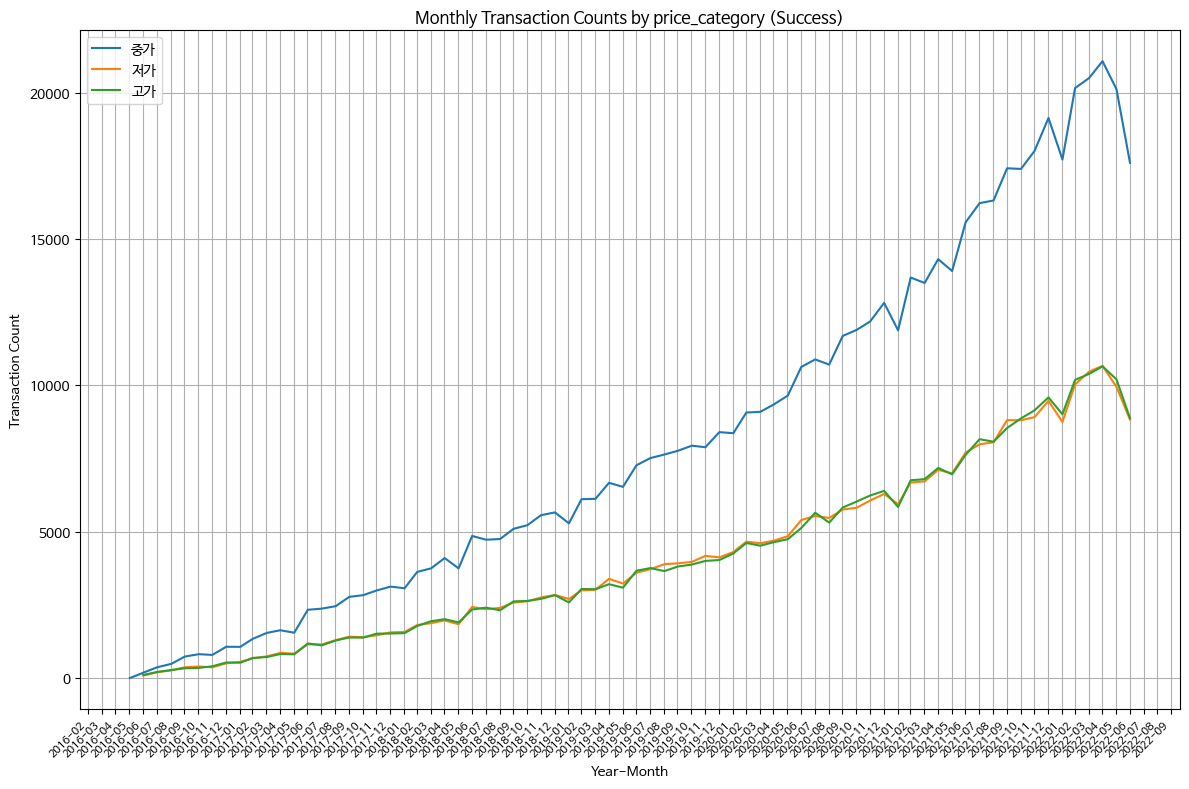

In [64]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_ng[mpt_ng['payment_status'] == 'Success'].groupby(['year', 'month', 'price_category']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_ng['price_category'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['price_category'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by price_category (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

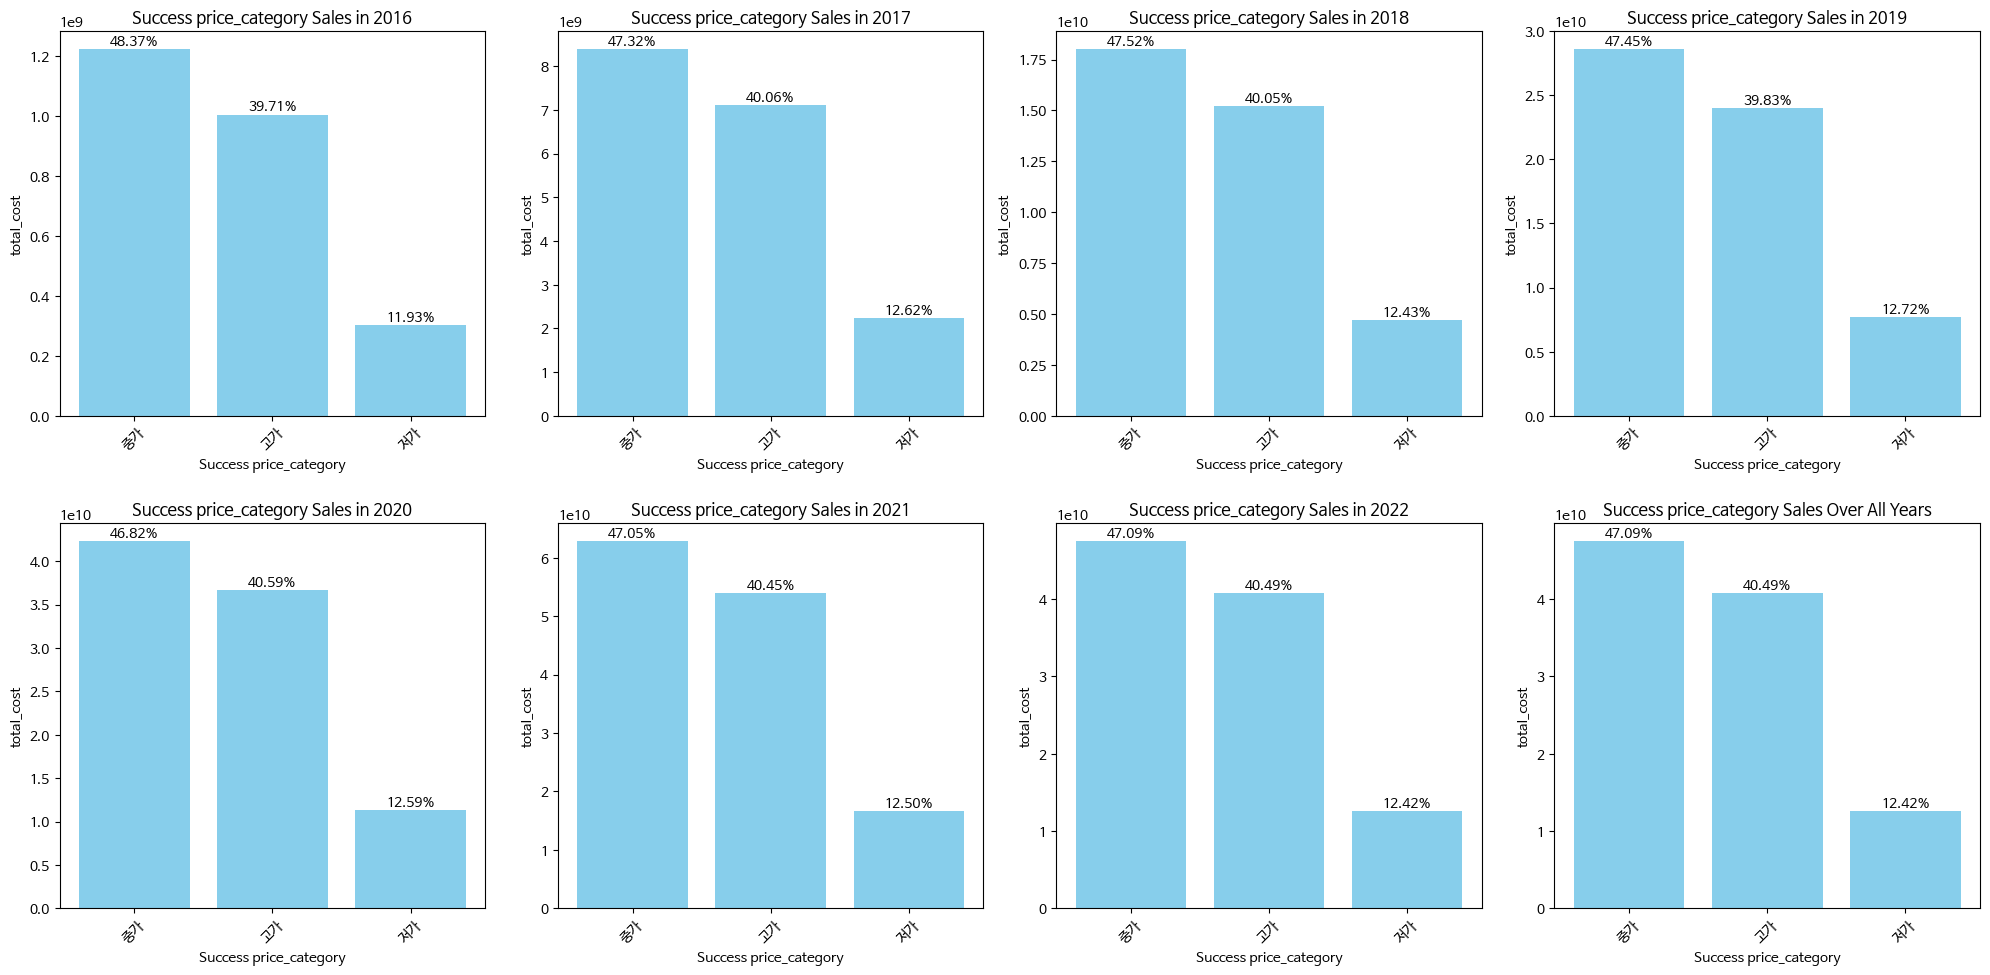

In [65]:
# 각 연도별로 그래프 생성
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subplot 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    # 해당 연도 데이터만 필터링
    mpt_year = mpt_ng[mpt_ng['created_at'].dt.year == year].copy()  # 데이터프레임 복사
    mpt_year['price_category'] = mpt_year['price_category'].astype(str)  # 문자열로 변환
    
    # 해당 연도 그래프 생성
    yearly_price_category_sales = mpt_year[mpt_year['payment_status'] == 'Success'].groupby(['price_category'])['total_cost'].sum().reset_index()
    yearly_price_category_sales = yearly_price_category_sales.sort_values(by='total_cost', ascending=False)
    
    
    bars = axes[i].bar(yearly_price_category_sales['price_category'], yearly_price_category_sales['total_cost'], color='skyblue')
    axes[i].set_title(f'Success price_category Sales in {year}')
    axes[i].set_xlabel('Success price_category')
    axes[i].set_ylabel('total_cost')
    axes[i].tick_params(axis='x', rotation=45)
    
    # 각 막대 위에 데이터에 퍼센트 표기
    total_sum = yearly_price_category_sales['total_cost'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_sum) * 100
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# 전체 년도에 대한 그래프 생성
mpt_all_years = mpt_ng[mpt_ng['payment_status'] == 'Success'].copy()
mpt_all_years['price_category'] = mpt_all_years['price_category'].astype(str)
yearly_price_category_sales_all = mpt_all_years.groupby(['price_category'])['total_cost'].sum().reset_index()
yearly_price_category_sales_all = yearly_price_category_sales_all.sort_values(by='total_cost', ascending=False)

ax = axes[-1]
bars = ax.bar(yearly_price_category_sales['price_category'], yearly_price_category_sales['total_cost'], color='skyblue')
ax.set_title('Success price_category Sales Over All Years')
ax.set_xlabel('Success price_category')
ax.set_ylabel('total_cost')
ax.tick_params(axis='x', rotation=45)

# 각 막대 위에 데이터에 퍼센트 표기
total_sum_all = yearly_price_category_sales['total_cost'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sum_all) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

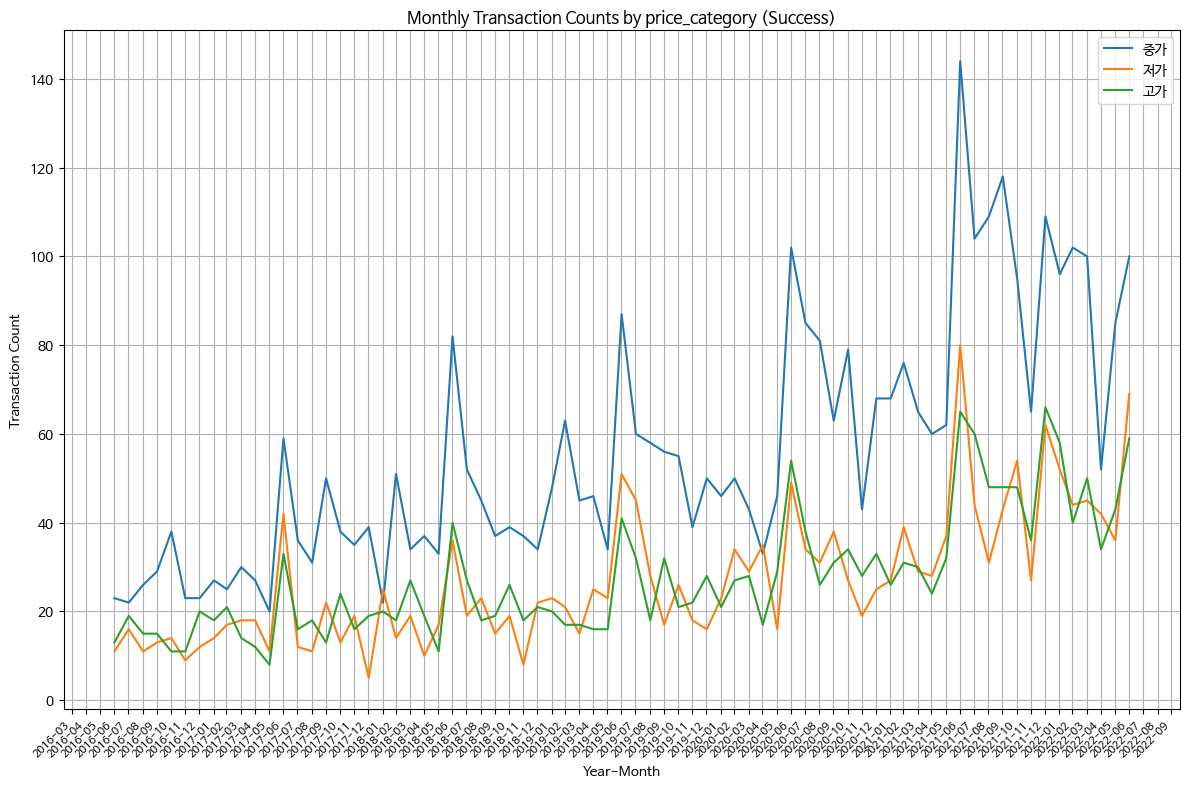

In [66]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_ng[mpt_ng['payment_status'] == 'Success'][mpt_ng['customer_type'] == 0].groupby(['year', 'month', 'price_category']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_ng['price_category'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['price_category'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by price_category (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

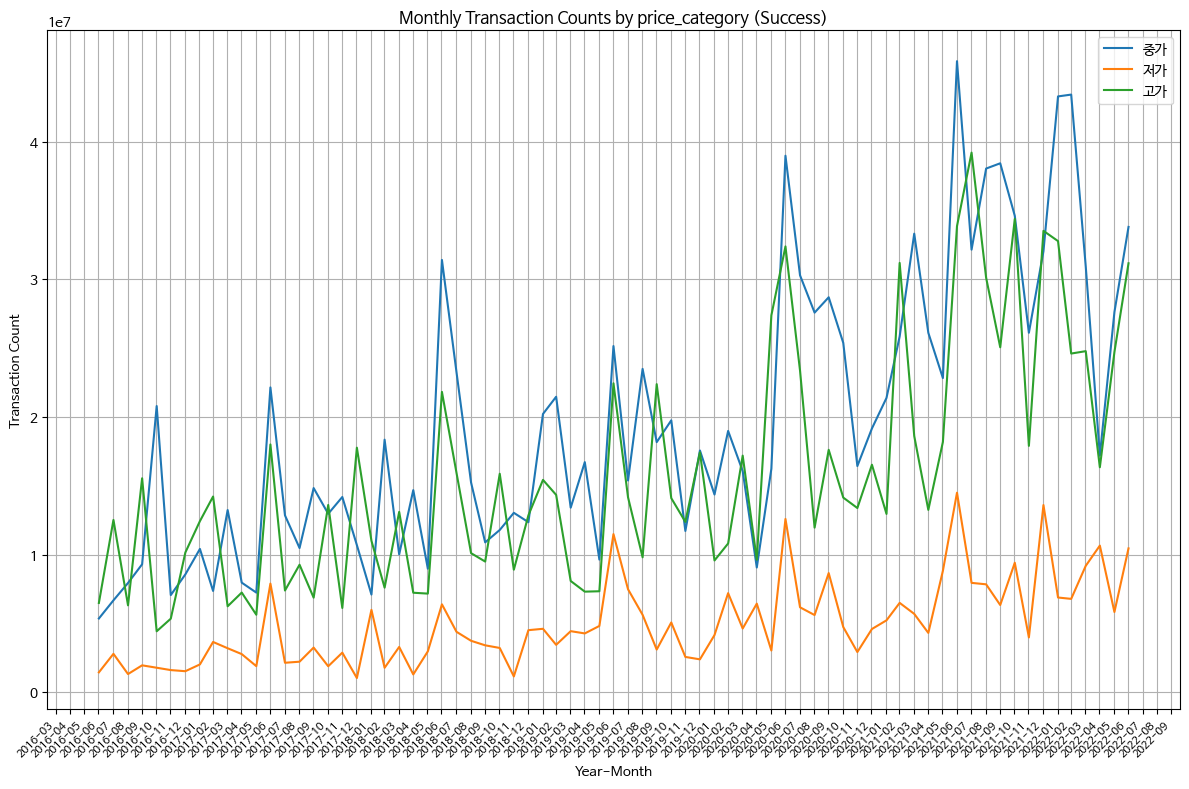

In [67]:
# 월별 거래 수 계산
monthly_transactions_success = mpt_ng[mpt_ng['payment_status'] == 'Success'][mpt_ng['customer_type'] == 0].groupby(['year', 'month', 'price_category'])['total_cost'].sum().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_ng['price_category'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['price_category'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by price_category (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

#가격 대 구성

In [68]:
mpt_ng.head().T

0  \
created_at                       2018-07-29 00:00:00   
customer_id                                     5868   
booking_id      186e2bee-0637-4710-8981-50c2d737bc42   
session_id      3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                    1415   
promo_code                               WEEKENDSERU   
shipment_fee                                   10000   
product_id                                     54728   
quantity                                           1   
item_price                                    191247   
shipment_date                                      4   
total_cost                                    191247   
customer_type                                      0   
gender                                           Men   
masterCategory                              Footwear   
subCategory                                    Shoes   
articleType                             Casual Shoes   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                           Vans   
year                                            2018   
month                                              7   
price_category                                    중가   

                                                   1  \
created_at                       2018-07-30 00:00:00   
customer_id                                     4774   
booking_id      caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id      2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                           Credit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     16193   
quantity                                           1   
item_price                                    145526   
shipment_date                                      3   
total_cost                                    145526   
customer_type                                      1   
gender                                           Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                 Sweaters   
baseColour                                     Green   
season                                          Fall   
usage                                         Casual   
brand                                           Puma   
year                                            2018   
month                                              7   
price_category                                    저가   

                                                   2  \
created_at                       2018-09-15 00:00:00   
customer_id                                     4774   
booking_id      6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
session_id      93325fb6-eb00-4268-bb0e-6471795a0ad0   
payment_method                                   OVO   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     53686   
quantity                                           4   
item_price                                    135174   
shipment_date                                      2   
total_cost                                    540696   
customer_type                                      1   
gender                                         Women   
masterCategory                           Accessories   
subCategory      

In [69]:
gender_price = mpt_ng.groupby('gender')['item_price'].agg(['min', 'max', 'mean'])
gender_count = mpt_ng.groupby('gender')['price_category'].value_counts()
print(gender_price)
print(gender_count)

          min      max      mean
gender                          
Boys    22431   918772 249720.74
Girls   15262  1003754 248726.83
Men      5600  1200357 250120.25
Unisex  18834  1089753 249218.07
Women    8166  1144107 249943.05
gender  price_category
Boys    중가                 11780
        저가                  5904
        고가                  5859
Girls   중가                  9050
        저가                  4698
        고가                  4536
Men     중가                312533
        고가                156599
        저가                156092
Unisex  중가                 30300
        저가                 15311
        고가                 14999
Women   중가                263633
        고가                131649
        저가                131642
Name: count, dtype: int64


In [70]:
customer_type_price = mpt_ng.groupby('customer_type')['item_price'].agg(['min', 'max', 'mean'])
customer_type_count = mpt_ng.groupby('customer_type')['price_category'].value_counts()
print(customer_type_price)
print(customer_type_count)

                 min      max      mean
customer_type                          
0              24546   816079 249666.38
1               5600  1200357 249976.53
customer_type  price_category
0              중가                  4293
               고가                  2100
               저가                  2081
1              중가                623003
               저가                311566
               고가                311542
Name: count, dtype: int64


In [71]:
masterCategory_price = mpt_ng.groupby('masterCategory')['item_price'].agg(['min', 'max', 'mean'])
masterCategory_count = mpt_ng.groupby('masterCategory')['price_category'].value_counts()
print(masterCategory_price)
print(masterCategory_count)

                  min      max      mean
masterCategory                          
Accessories     10898  1200357 250120.45
Apparel          8166  1196775 249913.68
Footwear         5600  1014937 250181.97
Free Items      25625   716938 247593.06
Home            97860   554720 268410.63
Personal Care   15232  1007926 249188.04
Sporting Goods  33221   918772 244737.37
masterCategory  price_category
Accessories     중가                158814
                고가                 79834
                저가                 79457
Apparel         중가                302082
                저가                151204
                고가                151013
Footwear        중가                130396
                고가                 65120
                저가                 64969
Free Items      중가                  1475
                저가                   764
                고가                   748
Home            중가                     8
                고가                     7
                저가        

In [72]:
subcategory_counts = mpt_ng['subCategory'].value_counts()
top_5_subcategories = subcategory_counts.head(5).index
filtered_df = mpt_ng[mpt_ng['subCategory'].isin(top_5_subcategories)]

subCategory_price = filtered_df.groupby('subCategory')['item_price'].agg(['min', 'max', 'mean'])
subCategory_count = filtered_df.groupby('subCategory')['price_category'].value_counts()
print(subCategory_price)
print(subCategory_count)

               min      max      mean
subCategory                          
Bags         10898  1089753 250002.26
Bottomwear   12402  1144107 249922.54
Shoes         5600  1014937 250125.91
Topwear       8166  1196775 249938.06
Watches      15568  1200357 250375.88
subCategory  price_category
Bags         중가                 43100
             고가                 21573
             저가                 21514
Bottomwear   중가                 38465
             저가                 18967
             고가                 18932
Shoes        중가                103904
             고가                 51912
             저가                 51838
Topwear      중가                216762
             고가                108811
             저가                108703
Watches      중가                 35539
             고가                 18035
             저가                 17817
Name: count, dtype: int64


In [73]:
articleType_price = mpt_ng.groupby('articleType')['item_price'].agg(['min', 'max', 'mean'])
articleType_count = mpt_ng.groupby('articleType')['price_category'].value_counts()
print(articleType_price)
print(articleType_count)

                      min      max      mean
articleType                                 
Accessory Gift Set  25896   820332 251600.05
Baby Dolls          24759   694824 249500.93
Backpacks           17045   909248 249253.15
Bangle              21621   866274 248692.08
Basketballs         57771   918772 241307.95
...                   ...      ...       ...
Waistcoat           29993   670160 251563.95
Wallets             23935   915889 250450.42
Watches             15568  1200357 250375.88
Water Bottle        22435   614744 252057.09
Wristbands          33221   799288 249129.77

[143 rows x 3 columns]
articleType         price_category
Accessory Gift Set  중가                1578
                    고가                 778
                    저가                 761
Baby Dolls          중가                 226
                    고가                 116
                                      ... 
Water Bottle        고가                  73
                    저가                  67
Wristbands  

In [74]:
season_price = mpt_ng.groupby('season')['item_price'].agg(['min', 'max', 'mean'])
season_count = mpt_ng.groupby('season')['price_category'].value_counts()
print(season_price)
print(season_count)

          min      max      mean
season                          
Fall    11185  1196775 249677.01
Spring  15232  1007926 249420.77
Summer   5600  1160219 250075.67
Winter  10898  1200357 250311.31
season  price_category
Fall    중가                161225
        저가                 80894
        고가                 80286
Spring  중가                 42299
        저가                 21156
        고가                 20913
Summer  중가                303628
        고가                151796
        저가                151443
Winter  중가                120144
        고가                 60647
        저가                 60154
Name: count, dtype: int64


In [75]:
usage_price = mpt_ng.groupby('usage')['item_price'].agg(['min', 'max', 'mean'])
usage_count = mpt_ng.groupby('usage')['price_category'].value_counts()
print(usage_price)
print(usage_count)

                min      max      mean
usage                                 
Casual        10898  1200357 249918.36
Ethnic         8166  1091258 250403.93
Formal        15029  1100239 249948.32
Home          97860   554720 268410.63
Party         18712   654975 248508.59
Smart Casual  36214   968818 253002.90
Sports         5600   986693 250123.06
Travel        42272   718778 244784.75
usage         price_category
Casual        중가                490177
              저가                245373
              고가                245046
Ethnic        중가                 45536
              고가                 22766
              저가                 22413
Formal        중가                 33100
              저가                 16684
              고가                 16598
Home          중가                     8
              고가                     7
              저가                     4
Party         중가                   409
              저가                   224
              고가                   

In [76]:
brand_price = mpt_ng.groupby('brand')['item_price'].agg(['min', 'max', 'mean'])
brand_count = mpt_ng.groupby('brand')['price_category'].value_counts()
print(brand_price)
print(brand_count)

                        min     max      mean
brand                                        
109F                  28512  779716 248284.82
18+                   65743  565169 240247.29
24                    40037  541790 248321.04
2go_Active_Gear_USA   28110  617671 248626.89
4711                  47971  911210 243702.29
...                     ...     ...       ...
York                  38794  690288 250393.55
Yves_Saint_Laurent    94027  522842 231271.56
iPanema               31779  932896 253296.64
s.Oliver              30339  944591 248888.62
test                 100994  504473 235448.14

[419 rows x 3 columns]
brand     price_category
109F      중가                417
          저가                192
          고가                182
18+       중가                 51
          저가                 25
                           ... 
s.Oliver  저가                891
          고가                878
test      중가                 16
          저가                  7
          고가                  5
N

# 제품과 전환데이터 고객 데이터 합친 분석 진행

In [77]:
# 제품과 전환데이터 데이터와 고객 데이터 합치기
mptc = mpt_ng.merge(customer, left_on='customer_id', right_on='customer_id', how='left')
mptt = mpt_t.merge(customer, left_on='customer_id', right_on='customer_id', how='left')

In [78]:
mptc.head().T

0  \
created_at                                        2018-07-29 00:00:00   
customer_id                                                      5868   
booking_id                       186e2bee-0637-4710-8981-50c2d737bc42   
session_id                       3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                                             Debit Card   
payment_status                                                Success   
promo_amount                                                     1415   
promo_code                                                WEEKENDSERU   
shipment_fee                                                    10000   
product_id                                                      54728   
quantity                                                            1   
item_price                                                     191247   
shipment_date                                                       4   
total_cost                                                     191247   
customer_type                                                       0   
gender_x                                                          Men   
masterCategory                                               Footwear   
subCategory                                                     Shoes   
articleType                                              Casual Shoes   
baseColour                                                      Black   
season                                                         Summer   
usage                                                          Casual   
brand                                                            Vans   
year                                                             2018   
month                                                               7   
price_category                                                     중가   
first_name                                                      Titin   
last_name                                                     Pratiwi   
username                         498c2a5e-bafe-42cc-94f9-2832ac5e1f6b   
email               498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...   
gender_y                                                            F   
birthdate                                                  2000-08-20   
device_type                                                   Android   
device_id                        d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836   
device_version                                          Android 8.0.0   
home_location_lat                                               -6.12   
home_location_long                                             106.88   
home_location                                            Jakarta Raya   
home_country                                                Indonesia   
first_join_date                                            2018-07-28   
age                                                                21   
device                                                        Android   
version                                                         8.0.0   
age_group                                                         20대   

                                                                    1  \
created_at                                        2018-07-30 00:00:00   
customer_id                                                      4774   
booking_id                       caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id                       2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                                            Credit Card   
payment_status                                                Success   
promo_amount                                                        0   
promo_code                                                    nopromo   
shipment_fee                                                    10000   
product_id                                          

In [79]:
# customer 분석을 위해 불필요한 컬럼 삭제
mptc.drop(columns=['first_name','last_name', 'username','email', 'device_id',
'home_location_lat', 'home_location_long', 'first_join_date', 'device_version', 'version', 'birthdate'], inplace=True)

In [80]:
# customer 분석을 위해 불필요한 컬럼 삭제
mptt.drop(columns=['first_name','last_name', 'username','email', 'device_id',
'home_location_lat', 'home_location_long', 'first_join_date', 'device_version', 'version', 'birthdate'], inplace=True)

In [81]:
mptc.head().T

0  \
created_at                       2018-07-29 00:00:00   
customer_id                                     5868   
booking_id      186e2bee-0637-4710-8981-50c2d737bc42   
session_id      3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                    1415   
promo_code                               WEEKENDSERU   
shipment_fee                                   10000   
product_id                                     54728   
quantity                                           1   
item_price                                    191247   
shipment_date                                      4   
total_cost                                    191247   
customer_type                                      0   
gender_x                                         Men   
masterCategory                              Footwear   
subCategory                                    Shoes   
articleType                             Casual Shoes   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                           Vans   
year                                            2018   
month                                              7   
price_category                                    중가   
gender_y                                           F   
device_type                                  Android   
home_location                           Jakarta Raya   
home_country                               Indonesia   
age                                               21   
device                                       Android   
age_group                                        20대   

                                                   1  \
created_at                       2018-07-30 00:00:00   
customer_id                                     4774   
booking_id      caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id      2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                           Credit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     16193   
quantity                                           1   
item_price                                    145526   
shipment_date                                      3   
total_cost                                    145526   
customer_type                                      1   
gender_x                                         Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                 Sweaters   
baseColour                                     Green   
season                                          Fall   
usage                                         Casual   
brand                                           Puma   
year                                            2018   
month                                              7   
price_category                                    저가   
gender_y                                           F   
device_type                                  Android   
home_location                       Sulawesi Selatan   
home_country                               Indonesia   
age                                               26   
device                                       Android   
age_group                                        20대   

                                                   2  \
created_at                       2018-09-15 00:00:00   
customer_id                                     4774   
booking_id      6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
session_id      9

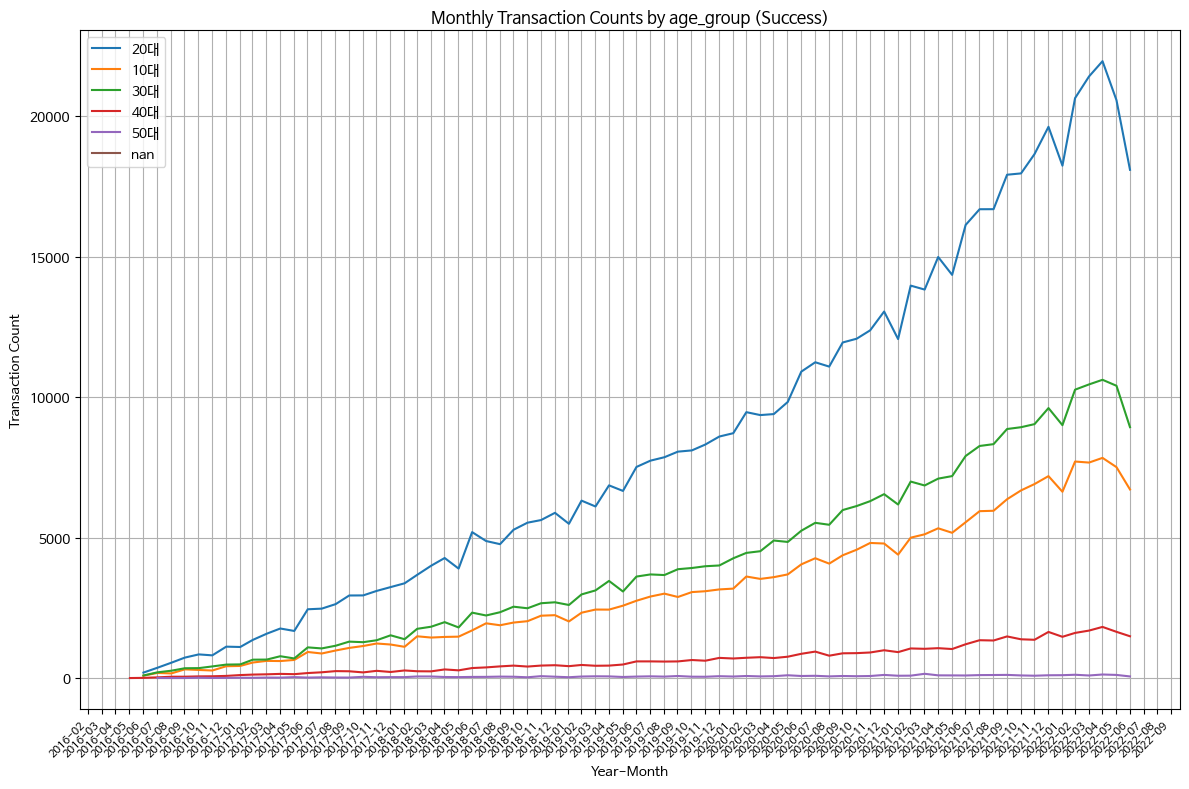

In [82]:
monthly_transactions_success = mptc[mptc['payment_status'] == 'Success'].groupby(['year', 'month', 'age_group']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mptc['age_group'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['age_group'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by age_group (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

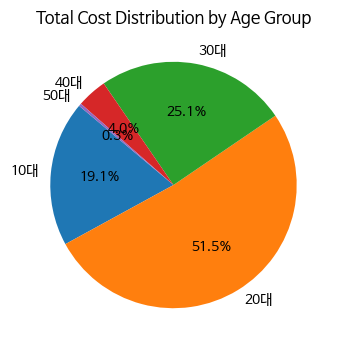

In [83]:
# age_group 별 total_cost 합계 계산
age_group_total_cost = mptc.groupby('age_group')['total_cost'].sum()

# 파이 차트 그리기
plt.figure(figsize=(4, 4))
plt.pie(age_group_total_cost, labels=age_group_total_cost.index, autopct='%.1f%%', startangle=140)
plt.title('Total Cost Distribution by Age Group')
plt.show()

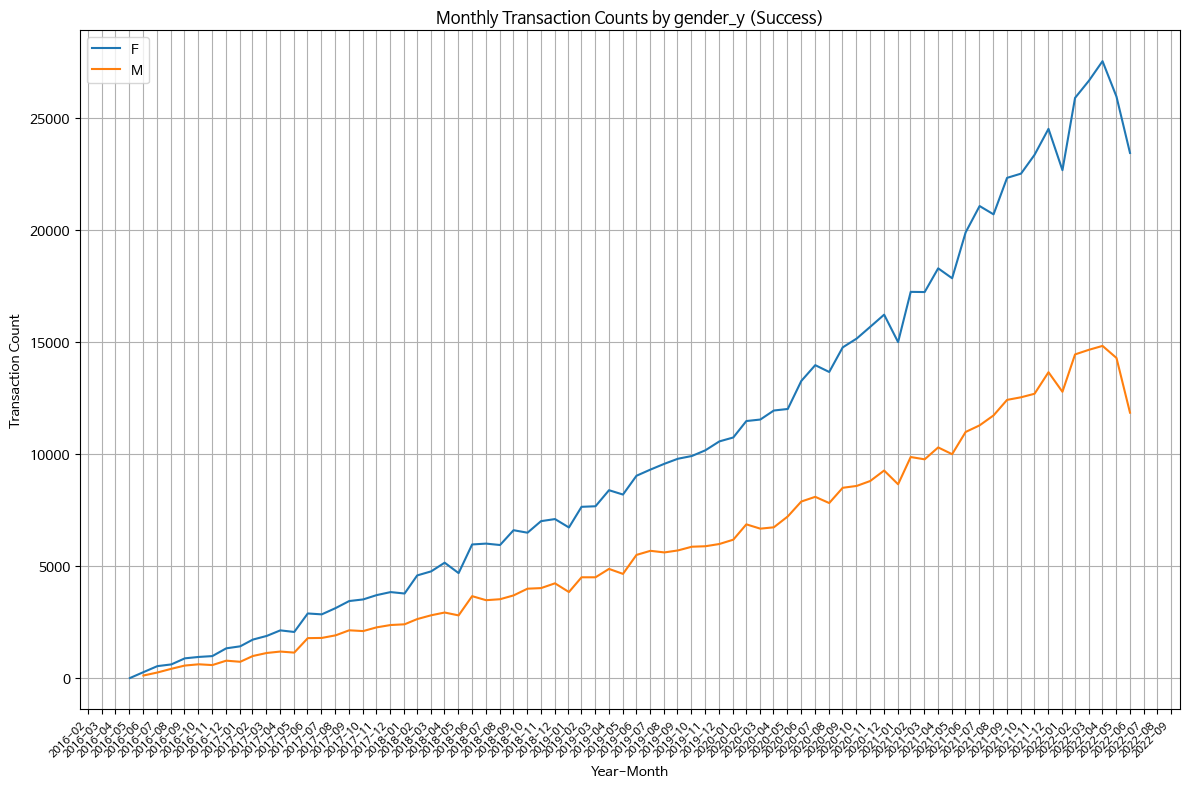

In [84]:
monthly_transactions_success = mptc[mptc['payment_status'] == 'Success'].groupby(['year', 'month', 'gender_y']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mptc['gender_y'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['gender_y'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by gender_y (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

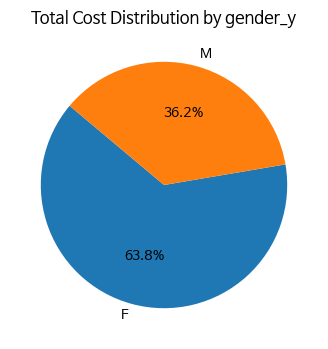

In [85]:
# age_group 별 total_cost 합계 계산
age_group_total_cost = mptc.groupby('gender_y')['total_cost'].sum()

# 파이 차트 그리기
plt.figure(figsize=(4, 4))
plt.pie(age_group_total_cost, labels=age_group_total_cost.index, autopct='%.1f%%', startangle=140)
plt.title('Total Cost Distribution by gender_y')
plt.show()

In [86]:
mptt.head().T

0  \
created_at          2018-07-29 15:22:01.458193+00:00   
customer_id                                     5868   
booking_id      186e2bee-0637-4710-8981-50c2d737bc42   
session_id      3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                    1415   
promo_code                               WEEKENDSERU   
shipment_fee                                   10000   
total_amount                                  199832   
product_id                                     54728   
quantity                                           1   
item_price                                    191247   
shipment_date                                      4   
customer_type                                      0   
gender_x                                         Men   
masterCategory                              Footwear   
subCategory                                    Shoes   
articleType                             Casual Shoes   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                           Vans   
year                                            2018   
month                                              7   
gender_y                                           F   
device_type                                  Android   
home_location                           Jakarta Raya   
home_country                               Indonesia   
age                                               21   
device                                       Android   
age_group                                        20대   

                                                   1  \
created_at          2018-07-30 12:40:22.365620+00:00   
customer_id                                     4774   
booking_id      caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id      2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                           Credit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
total_amount                                  155526   
product_id                                     16193   
quantity                                           1   
item_price                                    145526   
shipment_date                                      3   
customer_type                                      1   
gender_x                                         Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                 Sweaters   
baseColour                                     Green   
season                                          Fall   
usage                                         Casual   
brand                                           Puma   
year                                            2018   
month                                              7   
gender_y                                           F   
device_type                                  Android   
home_location                       Sulawesi Selatan   
home_country                               Indonesia   
age                                               26   
device                                       Android   
age_group                                        20대   

                                                   2  \
created_at          2018-09-15 11:51:17.365620+00:00   
customer_id                                     4774   
booking_id      6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
session_id      93325fb6-eb00-4268-bb0e-6471795a0ad0   
payment_method                                   OVO   
payment_status   

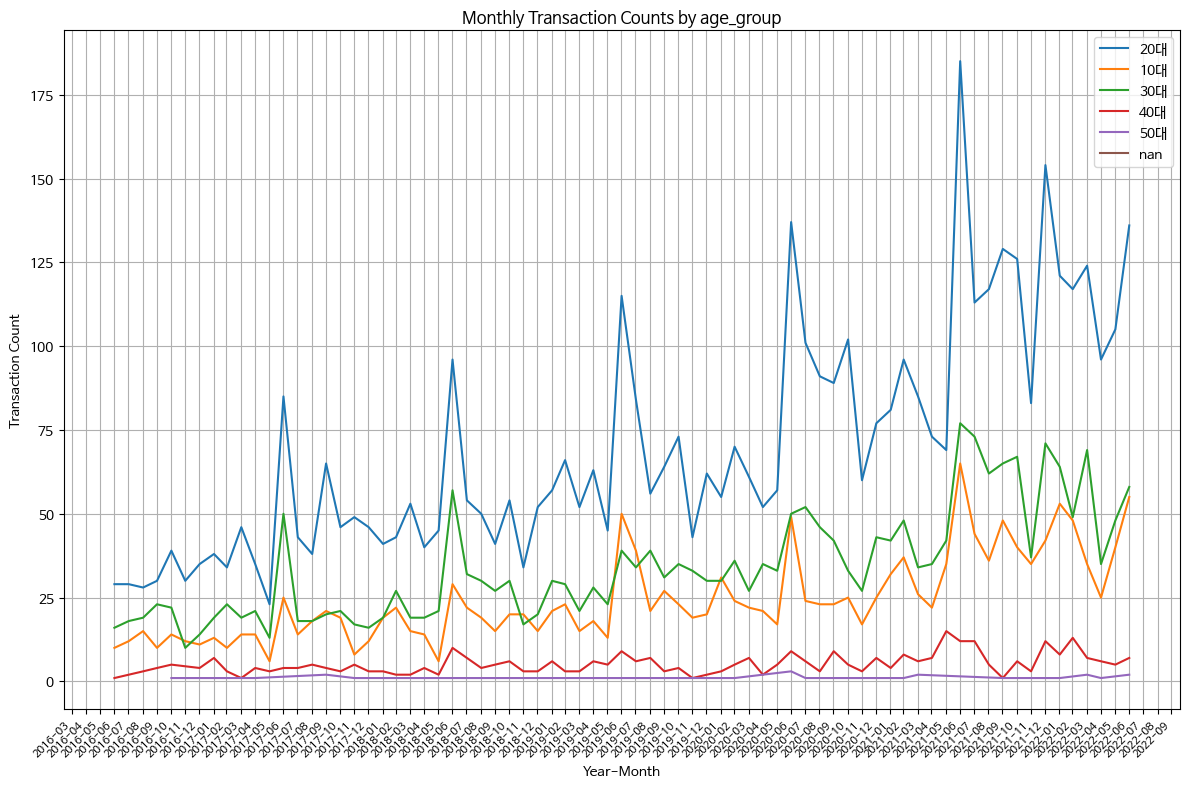

In [87]:
monthly_transactions_success = mptt[mptt['customer_type'] == '0'][mptt['payment_status'] == 'Success'].groupby(['year', 'month', 'age_group']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mptt['age_group'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['age_group'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by age_group')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

In [88]:
mptc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 33 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   created_at      1254585 non-null  datetime64[ns]
 1   customer_id     1254585 non-null  int64         
 2   booking_id      1254585 non-null  object        
 3   session_id      1254585 non-null  object        
 4   payment_method  1254585 non-null  object        
 5   payment_status  1254585 non-null  object        
 6   promo_amount    1254585 non-null  int64         
 7   promo_code      1254585 non-null  object        
 8   shipment_fee    1254585 non-null  int64         
 9   product_id      1254585 non-null  int64         
 10  quantity        1254585 non-null  int64         
 11  item_price      1254585 non-null  int64         
 12  shipment_date   1254585 non-null  int64         
 13  total_cost      1254585 non-null  int64         
 14  customer_type   12

# 중고제품 추가 

In [89]:
click_tt.head()

event_time                              event_id  \
0  2022-07-24 13:16:37.038087+00:00  e599d7c6-cc51-407b-b8c5-20545cce6cbd   
1  2021-02-08 06:31:46.386424+00:00  bf979aa8-67f2-4639-adfb-6cddbf25dccb   
2  2018-05-25 22:40:31.211903+00:00  7acacdd8-9d65-4d51-9ac0-3d828fd86b6d   
3  2020-02-13 03:41:13.777605+00:00  46290a42-6762-4eaa-8eef-c69bdb3bd413   
4  2020-02-13 14:30:48.777605+00:00  ce57b770-5552-44f1-bff8-1d6e37e24118   

                             session_id  used  
0  00007415-e0e7-4a33-95e8-5bc749016876     1  
1  0000b1a6-8dca-4fb3-b1db-ccde1791a330     1  
2  00011e77-643b-49ba-b09d-c5a64f7683b4     1  
3  00013ac1-f66e-492c-ac04-4e0f1ecf2ff8     1  
4  00013ac1-f66e-492c-ac04-4e0f1ecf2ff8     1

In [90]:
mpt_n.head().T

0  \
created_at                       2018-07-29 00:00:00   
customer_id                                     5868   
booking_id      186e2bee-0637-4710-8981-50c2d737bc42   
session_id      3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                    1415   
promo_code                               WEEKENDSERU   
shipment_fee                                   10000   
product_id                                     54728   
quantity                                           1   
item_price                                    191247   
shipment_date                                      4   
total_cost                                    191247   
customer_type                                      0   
gender                                           Men   
masterCategory                              Footwear   
subCategory                                    Shoes   
articleType                             Casual Shoes   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                           Vans   
year                                            2018   
month                                              7   

                                                   1  \
created_at                       2018-07-30 00:00:00   
customer_id                                     4774   
booking_id      caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id      2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                           Credit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     16193   
quantity                                           1   
item_price                                    145526   
shipment_date                                      3   
total_cost                                    145526   
customer_type                                      1   
gender                                           Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                 Sweaters   
baseColour                                     Green   
season                                          Fall   
usage                                         Casual   
brand                                           Puma   
year                                            2018   
month                                              7   

                                                   2  \
created_at                       2018-09-15 00:00:00   
customer_id                                     4774   
booking_id      6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
session_id      93325fb6-eb00-4268-bb0e-6471795a0ad0   
payment_method                                   OVO   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     53686   
quantity                                           4   
item_price                                    135174   
shipment_date                                      2   
total_cost                                    540696   
customer_type                                      1   
gender                                         Women   
masterCategory                           Accessories   
subCategory                                     Bags   
articleType                                 Handbags   
baseColour       

In [91]:
mpt_ncln = mptc.merge(click_tt, left_on='session_id', right_on='session_id', how='left')
mpt_nclt= mptt.merge(click_tt, left_on='session_id', right_on='session_id', how='left')

In [92]:
mpt_ncln['used'].fillna('0', inplace=True)

In [93]:
mpt_nclt['used'].fillna('0', inplace=True)

In [94]:
mpt_ncln.head().T

0  \
created_at                       2018-07-29 00:00:00   
customer_id                                     5868   
booking_id      186e2bee-0637-4710-8981-50c2d737bc42   
session_id      3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                    1415   
promo_code                               WEEKENDSERU   
shipment_fee                                   10000   
product_id                                     54728   
quantity                                           1   
item_price                                    191247   
shipment_date                                      4   
total_cost                                    191247   
customer_type                                      0   
gender_x                                         Men   
masterCategory                              Footwear   
subCategory                                    Shoes   
articleType                             Casual Shoes   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                           Vans   
year                                            2018   
month                                              7   
price_category                                    중가   
gender_y                                           F   
device_type                                  Android   
home_location                           Jakarta Raya   
home_country                               Indonesia   
age                                               21   
device                                       Android   
age_group                                        20대   
event_time          2018-07-29 15:02:58.913621+00:00   
event_id        109c23ef-847d-416e-ac4f-0c1a412a8e71   
used                                            1.00   

                                                   1  \
created_at                       2018-07-30 00:00:00   
customer_id                                     4774   
booking_id      caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id      2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                           Credit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     16193   
quantity                                           1   
item_price                                    145526   
shipment_date                                      3   
total_cost                                    145526   
customer_type                                      1   
gender_x                                         Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                 Sweaters   
baseColour                                     Green   
season                                          Fall   
usage                                         Casual   
brand                                           Puma   
year                                            2018   
month                                              7   
price_category                                    저가   
gender_y                                           F   
device_type                                  Android   
home_location                       Sulawesi Selatan   
home_country                               Indonesia   
age                                               26   
device                                       Android   
age_group                                        20대   
event_time                                       NaN   
event_id          

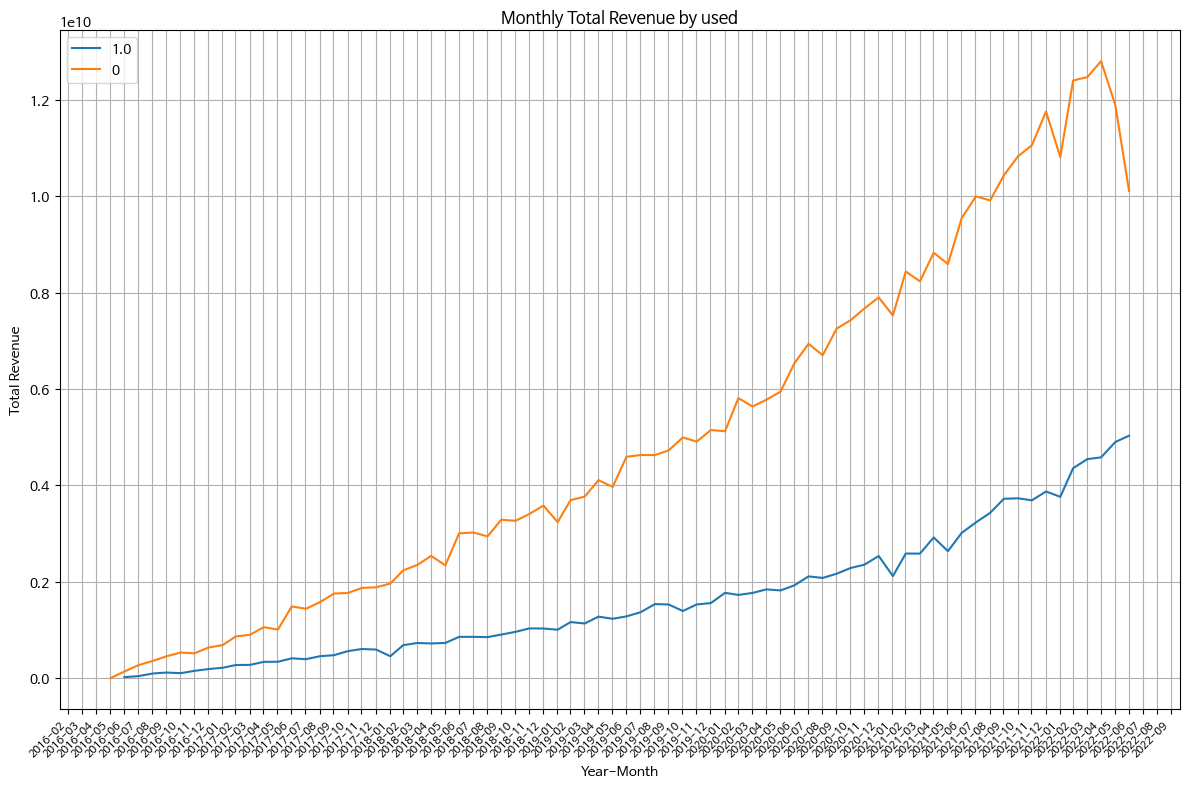

In [95]:
monthly_revenue = mpt_ncln.groupby(['year', 'month', 'used'])['total_cost'].sum().reset_index(name='total_revenue')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 used 데이터별로 그래프 생성
categories = mpt_ncln['used'].unique()
for category in categories:
    category_data = monthly_revenue[monthly_revenue['used'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['total_revenue'], label=category)

plt.title('Monthly Total Revenue by used')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

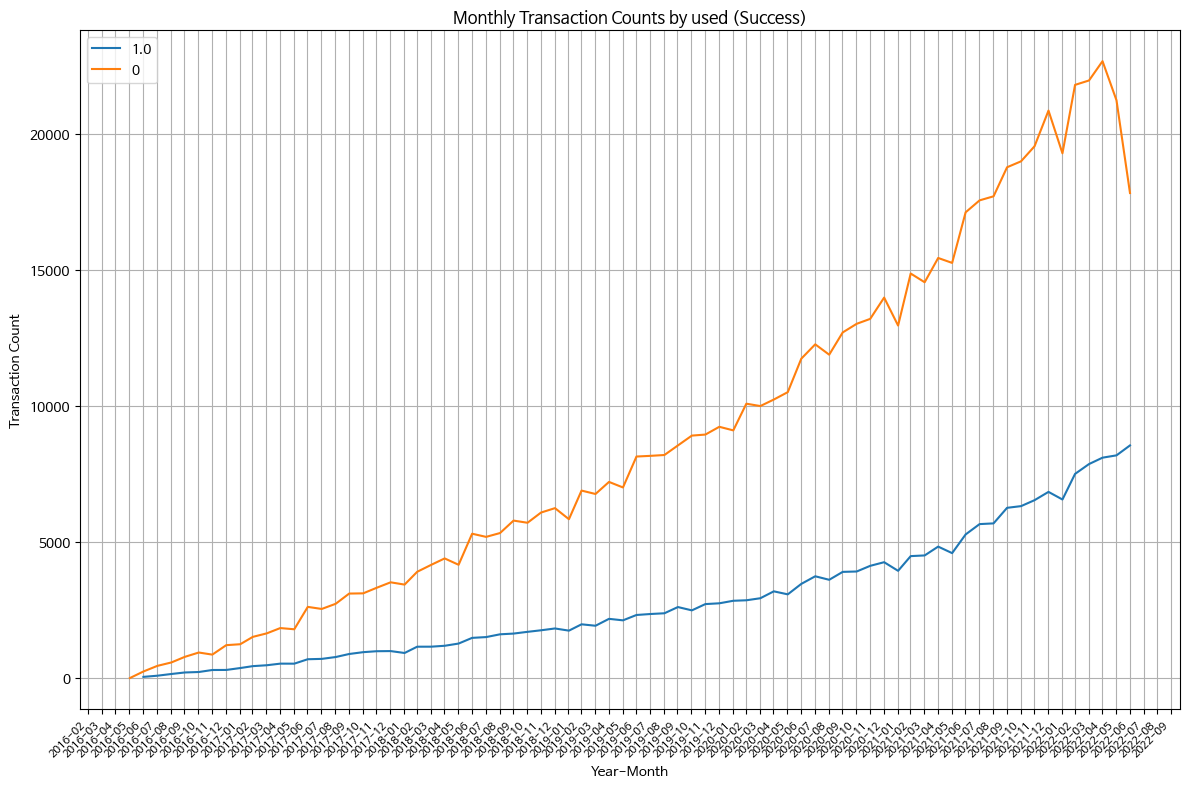

In [96]:
#( 'created_at' 컬럼을 datetime 형식으로 변경
mpt_nclt['created_at'] = pd.to_datetime(mpt_nclt['created_at'])

# 'created_at' 컬럼을 년도와 월로 나누기
mpt_nclt['year'] = mpt_nclt['created_at'].dt.year
mpt_nclt['month'] = mpt_nclt['created_at'].dt.month

# 월별 거래 수 계산
monthly_transactions_success = mpt_nclt[mpt_nclt['payment_status'] == 'Success'].groupby(['year', 'month', 'used']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_nclt['used'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['used'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by used (Success)')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

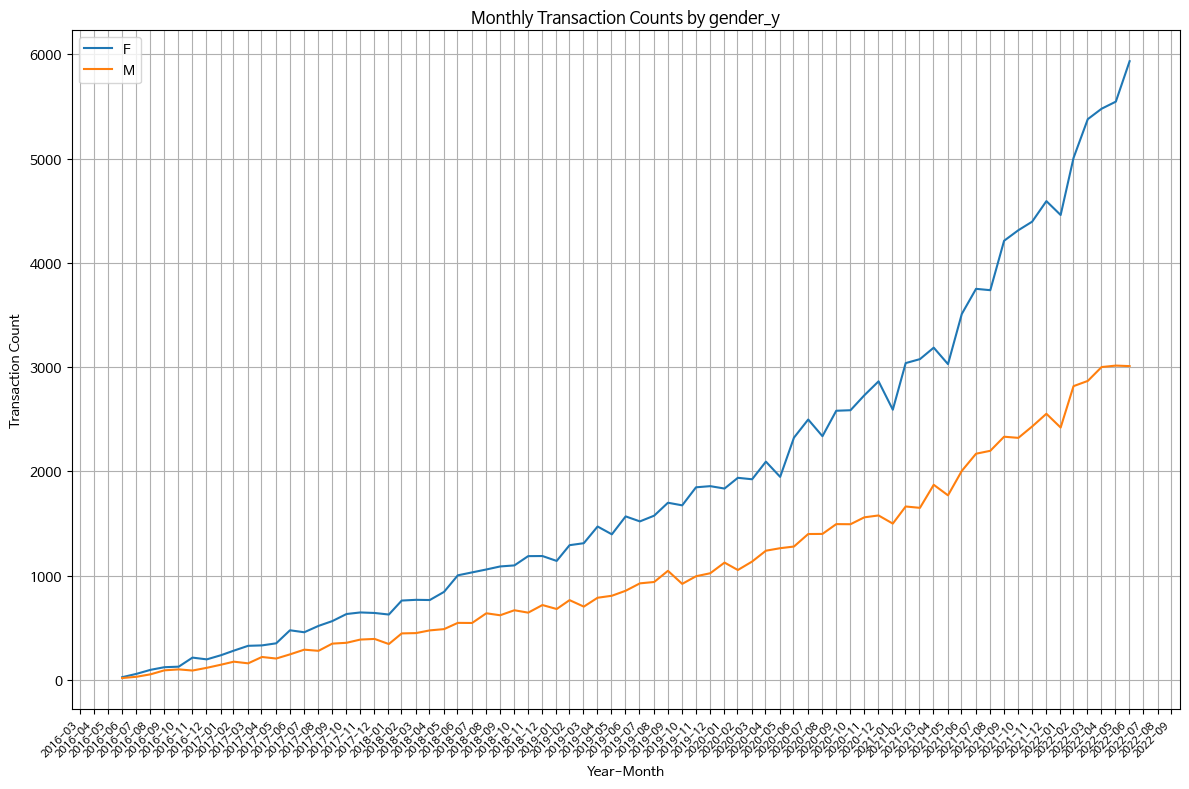

In [115]:
monthly_transactions_success = mpt_nclt[mpt_nclt['used'] == 1.0].groupby(['year', 'month', 'gender_y']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_nclt['gender_y'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['gender_y'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by gender_y')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

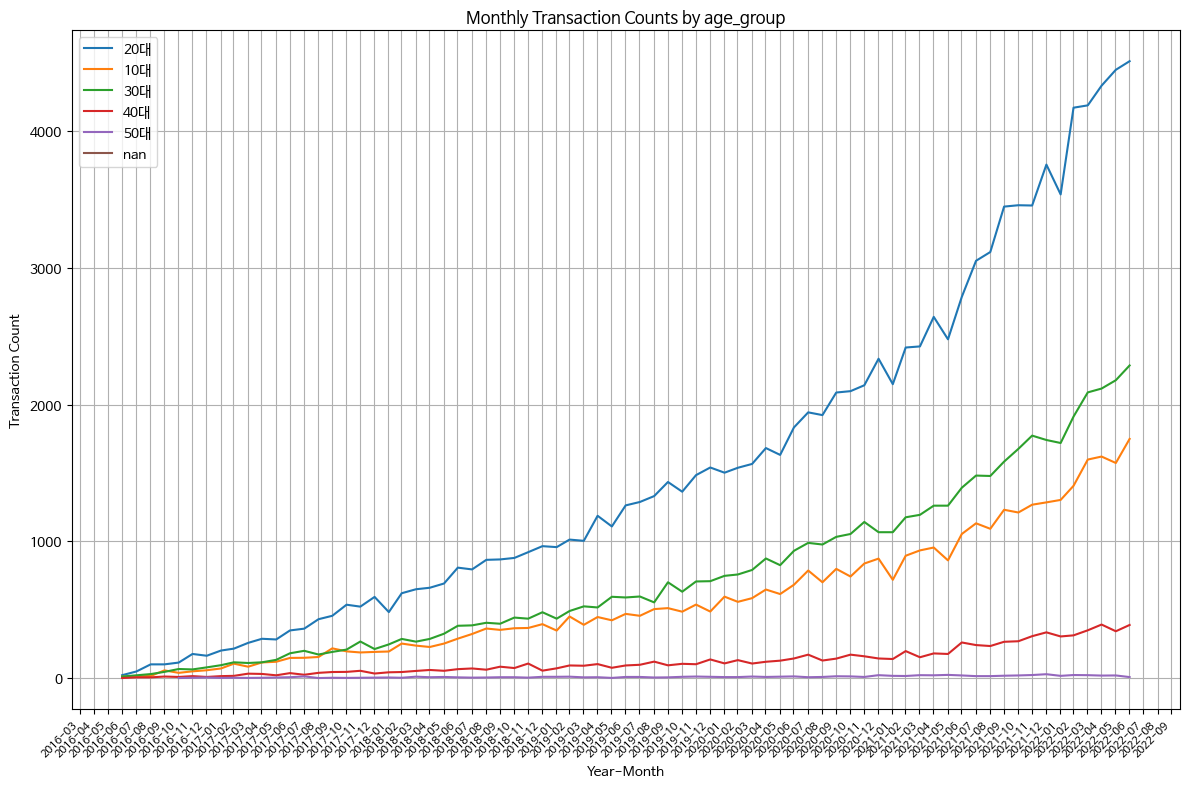

In [116]:
monthly_transactions_success = mpt_nclt[mpt_nclt['used'] == 1.0].groupby(['year', 'month', 'age_group']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_nclt['age_group'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['age_group'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by age_group')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

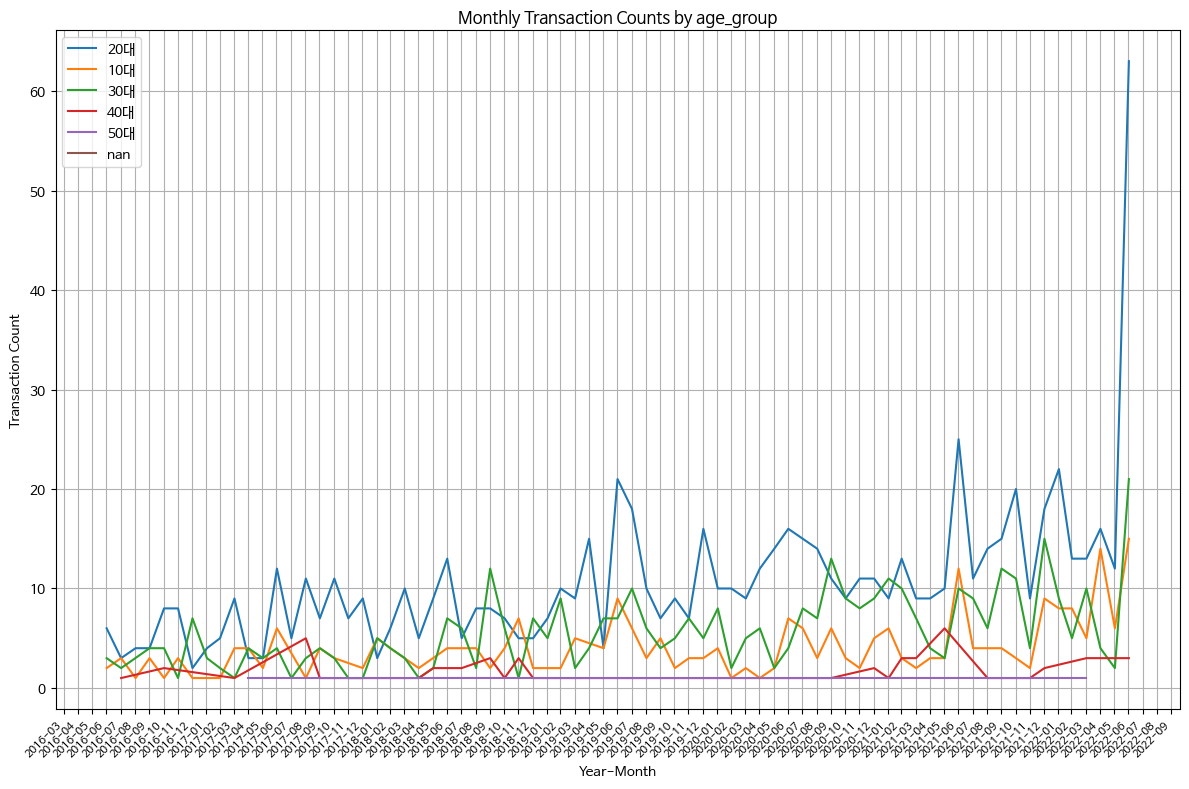

In [118]:
monthly_transactions_success = mpt_nclt[mpt_nclt['customer_type'] == '0'][mpt_nclt['used'] == 1.0].groupby(['year', 'month', 'age_group']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_nclt['age_group'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['age_group'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by age_group')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

In [100]:
mpt_ncln.head().T

0  \
created_at                       2018-07-29 00:00:00   
customer_id                                     5868   
booking_id      186e2bee-0637-4710-8981-50c2d737bc42   
session_id      3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                    1415   
promo_code                               WEEKENDSERU   
shipment_fee                                   10000   
product_id                                     54728   
quantity                                           1   
item_price                                    191247   
shipment_date                                      4   
total_cost                                    191247   
customer_type                                      0   
gender_x                                         Men   
masterCategory                              Footwear   
subCategory                                    Shoes   
articleType                             Casual Shoes   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                           Vans   
year                                            2018   
month                                              7   
price_category                                    중가   
gender_y                                           F   
device_type                                  Android   
home_location                           Jakarta Raya   
home_country                               Indonesia   
age                                               21   
device                                       Android   
age_group                                        20대   
event_time          2018-07-29 15:02:58.913621+00:00   
event_id        109c23ef-847d-416e-ac4f-0c1a412a8e71   
used                                            1.00   

                                                   1  \
created_at                       2018-07-30 00:00:00   
customer_id                                     4774   
booking_id      caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id      2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                           Credit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     16193   
quantity                                           1   
item_price                                    145526   
shipment_date                                      3   
total_cost                                    145526   
customer_type                                      1   
gender_x                                         Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                 Sweaters   
baseColour                                     Green   
season                                          Fall   
usage                                         Casual   
brand                                           Puma   
year                                            2018   
month                                              7   
price_category                                    저가   
gender_y                                           F   
device_type                                  Android   
home_location                       Sulawesi Selatan   
home_country                               Indonesia   
age                                               26   
device                                       Android   
age_group                                        20대   
event_time                                       NaN   
event_id          

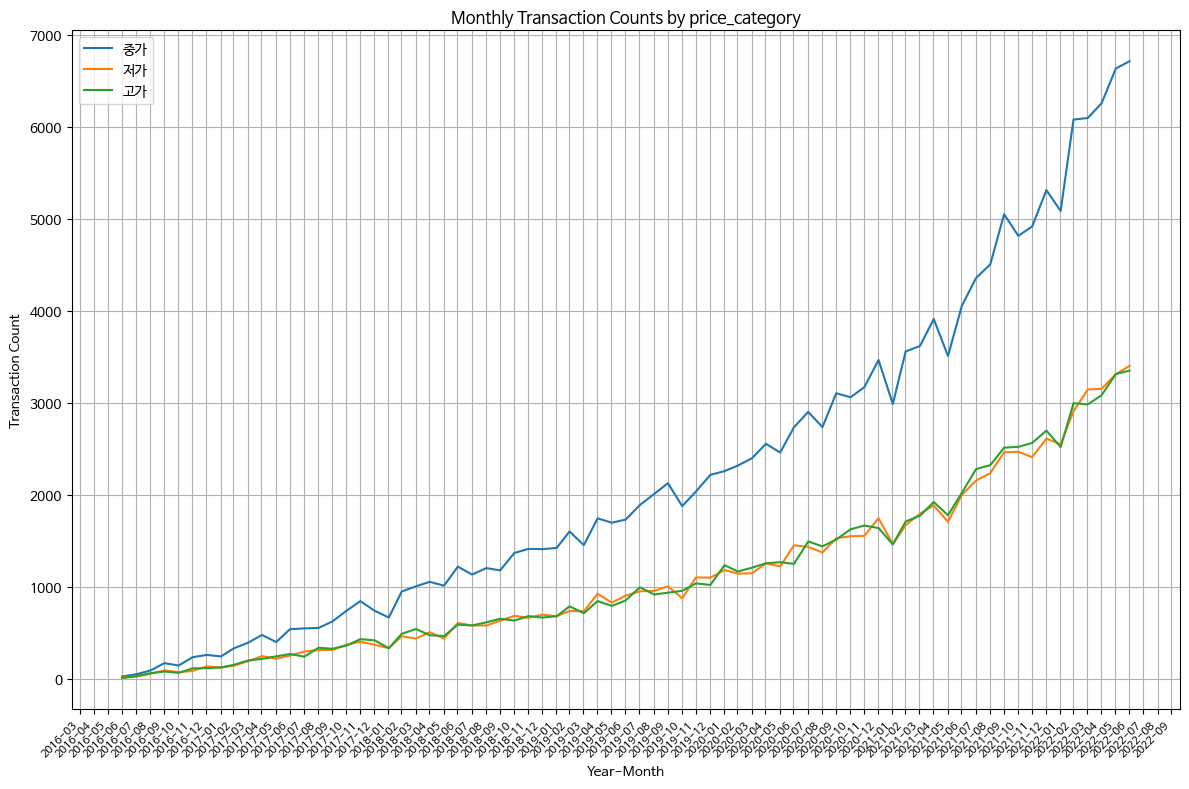

In [119]:
monthly_transactions_success = mpt_ncln[mpt_ncln['used'] == 1.0].groupby(['year', 'month', 'price_category']).size().reset_index(name='success_count')

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 masterCategory 데이터별로 그래프 생성
categories = mpt_ncln['price_category'].unique()
for category in categories:
    category_data = monthly_transactions_success[monthly_transactions_success['price_category'] == category]
    
    merged_year_month_category = category_data['year'].astype(str) + '-' + category_data['month'].astype(str)
    category_data['merged_year_month'] = pd.to_datetime(merged_year_month_category, format='%Y-%m')
    category_data = category_data.sort_values('merged_year_month')
    
    plt.plot(category_data['merged_year_month'], category_data['success_count'], label=category)

plt.title('Monthly Transaction Counts by price_category')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')

plt.grid(True)  # 그리드 표시
plt.legend()  # 범례 표시

# x축에 년과 월을 함께 표시하며, 눈금 간격과 회전 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # 월별 마지막 날을 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right', fontsize=8)  # 월까지 표시되는 방식과 x축 눈금(rotation) 설정
plt.tight_layout()

plt.show()

In [102]:
product.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  \
0 2011.00  Casual               Turtle Check Men Navy Blue Shirt   
1 2012.00  Casual             Peter_England Men Party Blue Jeans   
2 2016.00  Casual                       Titan Women Silver Watch   
3 2011.00  Casual  Manchester_United Men Solid Black Track Pants   
4 2012.00  Casual                          Puma Men Grey T-shirt   

               brand                productdetail  
0             Turtle    Check Men Navy Blue Shirt  
1      Peter_England         Men Party Blue Jeans  
2              Titan           Women Silver Watch  
3  Manchester_United  Men Solid Black Track Pants  
4               Puma             Men Grey T-shirt

In [103]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44446 non-null  object 
 6   season              44446 non-null  object 
 7   year                44446 non-null  float64
 8   usage               44446 non-null  object 
 9   productDisplayName  44446 non-null  object 
 10  brand               44446 non-null  object 
 11  productdetail       44446 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [104]:
mpt_ncl2 = mpt_ncln.copy()

In [105]:
mpt_ncl2.head().T

0  \
created_at                       2018-07-29 00:00:00   
customer_id                                     5868   
booking_id      186e2bee-0637-4710-8981-50c2d737bc42   
session_id      3abaa6ce-e320-4e51-9469-d9f3fa328e86   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                    1415   
promo_code                               WEEKENDSERU   
shipment_fee                                   10000   
product_id                                     54728   
quantity                                           1   
item_price                                    191247   
shipment_date                                      4   
total_cost                                    191247   
customer_type                                      0   
gender_x                                         Men   
masterCategory                              Footwear   
subCategory                                    Shoes   
articleType                             Casual Shoes   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                           Vans   
year                                            2018   
month                                              7   
price_category                                    중가   
gender_y                                           F   
device_type                                  Android   
home_location                           Jakarta Raya   
home_country                               Indonesia   
age                                               21   
device                                       Android   
age_group                                        20대   
event_time          2018-07-29 15:02:58.913621+00:00   
event_id        109c23ef-847d-416e-ac4f-0c1a412a8e71   
used                                            1.00   

                                                   1  \
created_at                       2018-07-30 00:00:00   
customer_id                                     4774   
booking_id      caadb57b-e808-4f94-9e96-8a7d4c9898db   
session_id      2ee5ead1-f13e-4759-92df-7ff48475e970   
payment_method                           Credit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     16193   
quantity                                           1   
item_price                                    145526   
shipment_date                                      3   
total_cost                                    145526   
customer_type                                      1   
gender_x                                         Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                 Sweaters   
baseColour                                     Green   
season                                          Fall   
usage                                         Casual   
brand                                           Puma   
year                                            2018   
month                                              7   
price_category                                    저가   
gender_y                                           F   
device_type                                  Android   
home_location                       Sulawesi Selatan   
home_country                               Indonesia   
age                                               26   
device                                       Android   
age_group                                        20대   
event_time                                       NaN   
event_id          

In [106]:
filtered_df = mpt_ncl2[mpt_ncl2['used'] == 1.00]

In [107]:
mpt_ncl3 = product.merge(mpt_ncl2, left_on='id', right_on='product_id', how='left')

In [108]:
mpt_ncl3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330164 entries, 0 to 1330163
Data columns (total 48 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1330164 non-null  int64         
 1   gender              1330164 non-null  object        
 2   masterCategory_x    1330164 non-null  object        
 3   subCategory_x       1330164 non-null  object        
 4   articleType_x       1330164 non-null  object        
 5   baseColour_x        1330164 non-null  object        
 6   season_x            1330164 non-null  object        
 7   year_x              1330164 non-null  float64       
 8   usage_x             1330164 non-null  object        
 9   productDisplayName  1330164 non-null  object        
 10  brand_x             1330164 non-null  object        
 11  productdetail       1330164 non-null  object        
 12  created_at          1330164 non-null  datetime64[ns]
 13  customer_id 

In [109]:
mpt_ncl3['product_id'].duplicated().sum()

1285718

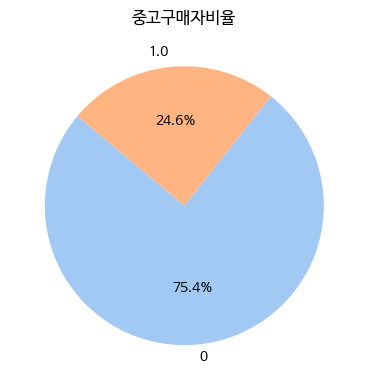

In [110]:
# 파이 차트 생성
plt.figure(figsize=(4, 4))
season_counts = mpt_ncl3['used'].value_counts()
plt.pie(season_counts, labels=season_counts.index, autopct='%.1f%%', colors=sns.color_palette('pastel'), startangle=140)

# 차트 설정
plt.title('중고구매자비율')

# 차트 출력
plt.tight_layout()
plt.show()

In [111]:
mpt_ncl2 = mpt_ncl2.sort_values(by='created_at')

In [112]:
mpt_ncl2.head().T

1330035  \
created_at                       2016-06-30 00:00:00   
customer_id                                    74089   
booking_id      2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba   
session_id      607d864b-76b5-45a1-a45d-7fb666a03ea1   
payment_method                               LinkAja   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   10000   
product_id                                     33314   
quantity                                           3   
item_price                                    210265   
shipment_date                                      3   
total_cost                                    630795   
customer_type                                      1   
gender_x                                         Men   
masterCategory                               Apparel   
subCategory                                  Topwear   
articleType                                  Tshirts   
baseColour                                 Navy Blue   
season                                          Fall   
usage                                         Casual   
brand                                          Arrow   
year                                            2016   
month                                              6   
price_category                                    중가   
gender_y                                           F   
device_type                                      iOS   
home_location                           Jakarta Raya   
home_country                               Indonesia   
age                                               43   
device                                        iPhone   
age_group                                        40대   
event_time                                       NaN   
event_id                                         NaN   
used                                               0   

                                             1274632  \
created_at                       2016-07-01 00:00:00   
customer_id                                    16228   
booking_id      8035f5b3-2a7c-4e30-ab4a-9b3091edc37f   
session_id      bbff775e-4166-46aa-bbfd-4ba6465add17   
payment_method                            Debit Card   
payment_status                               Success   
promo_amount                                       0   
promo_code                                   nopromo   
shipment_fee                                   15000   
product_id                                     47650   
quantity                                           1   
item_price                                    318792   
shipment_date                                      2   
total_cost                                    318792   
customer_type                                      1   
gender_x                                       Women   
masterCategory                               Apparel   
subCategory                                    Dress   
articleType                                  Dresses   
baseColour                                     Black   
season                                        Summer   
usage                                         Casual   
brand                                        Femella   
year                                            2016   
month                                              7   
price_category                                    고가   
gender_y                                           M   
device_type                                  Android   
home_location                             Jawa Barat   
home_country                               Indonesia   
age                                               26   
device                                       Android   
age_group                                        20대   
event_time                                       NaN   
event_id    

In [113]:
mpt_ncl2 = mpt_ncl2.drop_duplicates(subset='customer_id', keep='first')